In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle


In [2]:
train_data = pd.read_csv(r"train_genetic_disorders.csv")
test_data=pd.read_csv(r"test_genetic_disorders.csv")
df_train=train_data.copy()
df_test=test_data.copy()

In [3]:
df_train.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

In [4]:
df_train.tail()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
22078        NaN          NaN                    NaN                   NaN   
22079        NaN          NaN                    NaN                   NaN   
22080        NaN          NaN                    NaN                   NaN   
22081        NaN          NaN                    NaN                   NaN   
22082        NaN          NaN                    NaN                   NaN   

      Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
22078           NaN           NaN                     NaN                NaN   
22079           NaN           NaN                     NaN                NaN   
22080           NaN           NaN                     NaN                NaN   
22081           NaN           NaN                     NaN                NaN   
22082           NaN           NaN                     NaN                NaN   

      Family Name Father's name  ...  Birth defects  \
22078         NaN           NaN  ...            NaN   
22079         NaN           NaN  ...            NaN   
22080         NaN           NaN  ...            NaN   
22081         NaN           NaN  ...            NaN   
22082         NaN           NaN  ...            NaN   

       White Blood cell count (thousand per microliter) Blood test result  \
22078                                               NaN               NaN   
22079                                               NaN               NaN   
22080                                               NaN               NaN   
22081                                               NaN               NaN   
22082                                               NaN               NaN   

      Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  Genetic Disorder  \
22078       NaN       NaN       NaN       NaN        NaN               NaN   
22079       NaN       NaN       NaN       NaN        NaN               NaN   
22080       NaN       NaN       NaN       NaN        NaN               NaN   
22081       NaN       NaN       NaN       NaN        NaN               NaN   
22082       NaN       NaN       NaN       NaN        NaN               NaN   

       Disorder Subclass  
22078                NaN  
22079                NaN  
22080                NaN  
22081                NaN  
22082                NaN  

[5 rows x 45 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [6]:
df_train.describe()

Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  19643.000000            21011.000000  15293.000000  15322.000000   
mean       6.974851                4.899004     34.522527     41.942436   
std        4.322584                0.199829      9.847256     13.027701   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763230     26.000000     31.000000   
50%        7.000000                4.899548     35.000000     42.000000   
75%       11.000000                5.033977     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  18992.0  18958.0  18970.0  18962.0  18939.0              18957.000000   
mean       0.0      0.0      0.0      1.0      0.0                  2.000106   
std        0.0      0.0      0.0      0.0      0.0                  1.411488   
min        0.0      0.0      0.0      1.0      0.0                  0.000000   
25%        0.0      0.0      0.0      1.0      0.0                  1.000000   
50%        0.0      0.0      0.0      1.0      0.0                  2.000000   
75%        0.0      0.0      0.0      1.0      0.0                  3.000000   
max        0.0      0.0      0.0      1.0      0.0                  4.000000   

       White Blood cell count (thousand per microliter)     Symptom 1  \
count                                      18965.000000  18955.000000   
mean                                           7.484680      0.592034   
std                                            2.653633      0.491470   
min                                            3.000000      0.000000   
25%                                            5.419026      0.000000   
50%                                            7.473071      1.000000   
75%                                            9.528684      1.000000   
max                                           12.000000      1.000000   

          Symptom 2     Symptom 3     Symptom 4     Symptom 5  
count  18899.000000  19008.000000  18987.000000  18956.000000  
mean       0.552886      0.537405      0.497393      0.460804  
std        0.497208      0.498612      0.500006      0.498474  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        1.000000      1.000000      0.000000      0.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [7]:
df_train.describe(include="object")

Patient Id Genes in mother's side Inherited from father Maternal gene  \
count       21011                  21011                 20724         18317   
unique      21011                      2                     2             2   
top     PID0x6418                    Yes                    No           Yes   
freq            1                  12509                 12508         10125   

       Paternal gene Patient First Name Family Name Father's name  \
count          21011              21011       11771         21011   
unique             2               2480        6051         15777   
top               No              James       Smith         Sager   
freq           11887                394         151             6   

        Institute Name Location of Institute  ...  \
count            16151                 21011  ...   
unique              27                    26  ...   
top     Not applicable                     -  ...   
freq              8011                 10386  ...   

       Folic acid details (peri-conceptional) H/O serious maternal illness  \
count                                   18998                        18959   
unique                                      2                            2   
top                                       Yes                           No   
freq                                     9625                         9500   

       H/O radiation exposure (x-ray) H/O substance abuse  \
count                           18964               18921   
unique                              4                   4   
top                    Not applicable                   -   
freq                             4807                4797   

       Assisted conception IVF/ART  \
count                        19007   
unique                           2   
top                            Yes   
freq                          9555   

       History of anomalies in previous pregnancies Birth defects  \
count                                         18945         18959   
unique                                            2             2   
top                                             Yes      Singular   
freq                                           9605          9509   

        Blood test result                             Genetic Disorder  \
count               18977                                        18962   
unique                  4                                            3   
top     slightly abnormal  Mitochondrial genetic inheritance disorders   
freq                 4855                                         9686   

       Disorder Subclass  
count              18943  
unique                 9  
top       Leigh syndrome  
freq                4893  

[4 rows x 29 columns]

In [8]:
df_train.duplicated().count()

22083

In [10]:
df_train.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [11]:
# Calculate the percentage of missing values
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
print(missing_percentage)


Patient Id                                           4.854413
Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Patient First Name                                   4.854413
Family Name                                         46.696554
Father's name                                        4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Institute Name                                      26.862292
Location of Institute                                4.854413
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Ra

In [12]:
df_train[df_train.isnull().all(1)].shape

(1072, 45)

In [13]:
df_test[df_test.isnull().all(1)].shape

(173, 43)

In [14]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

Family Name            10312
Mother's age            6790
Father's age            6761
Institute Name          5932
Maternal gene           3766
Symptom 2               3184
H/O substance abuse     3162
Test 5                  3144
Follow-up               3142
Disorder Subclass       3140
dtype: int64

In [15]:
df_train['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [16]:
df_train['Disorder Subclass'].value_counts()

Leigh syndrome                         4893
Mitochondrial myopathy                 4202
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1743
Hemochromatosis                        1291
Leber's hereditary optic neuropathy     607
Alzheimer's                             148
Cancer                                   92
Name: Disorder Subclass, dtype: int64

In [17]:
for col in df_train.select_dtypes(include=["object"]):
    print(f"{df_train[col].value_counts()}\n")

PID0x6418    1
PID0x889a    1
PID0x54c0    1
PID0x821f    1
PID0x3d6f    1
            ..
PID0x2c25    1
PID0x9056    1
PID0x14c5    1
PID0x5632    1
PID0x883d    1
Name: Patient Id, Length: 21011, dtype: int64

Yes    12509
No      8502
Name: Genes in mother's side, dtype: int64

No     12508
Yes     8216
Name: Inherited from father, dtype: int64

Yes    10125
No      8192
Name: Maternal gene, dtype: int64

No     11887
Yes     9124
Name: Paternal gene, dtype: int64

James         394
John          356
Robert        339
Mary          309
Michael       308
             ... 
Reinaldo        1
Roxann          1
Trudi           1
Katherin        1
Earnestine      1
Name: Patient First Name, Length: 2480, dtype: int64

Smith          151
Williams       104
Johnson         96
Brown           83
Jones           77
              ... 
Hopson           1
Barraclough      1
Bouffard         1
Attaway          1
Frascone         1
Name: Family Name, Length: 6051, dtype: int64

Sager      6
Clardi

In [18]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns


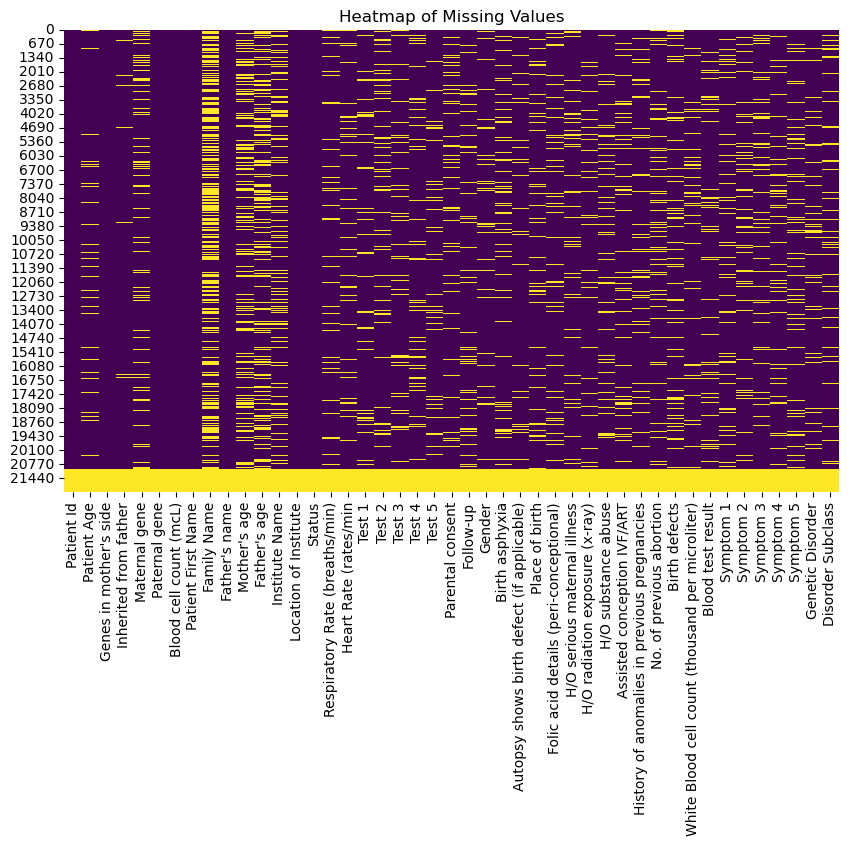

In [19]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

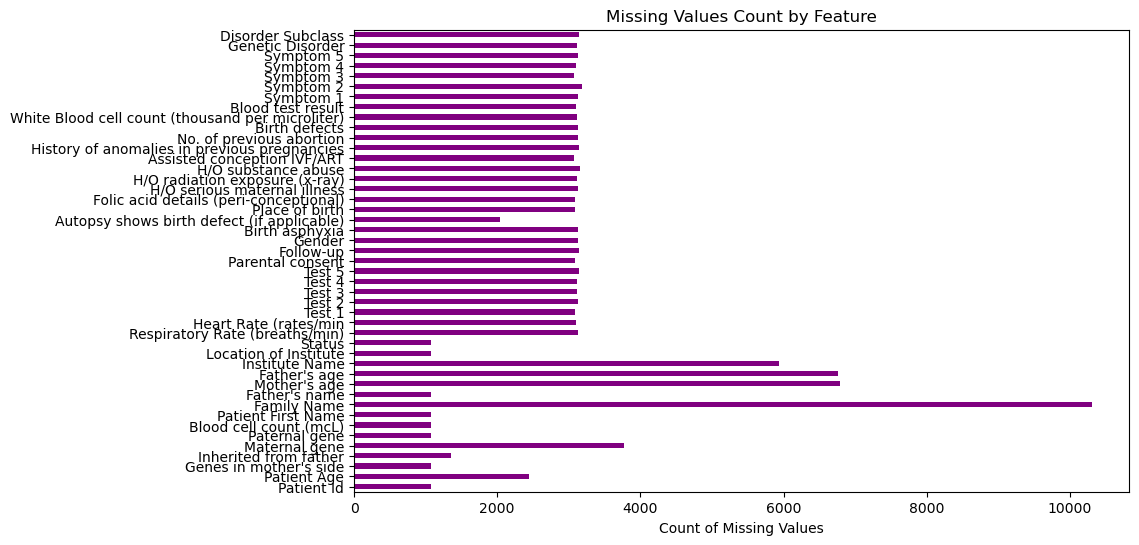

In [21]:
# Bar plot to show the count of missing values per column
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10,6))
missing_values.plot(kind='barh', color='purple')
plt.title('Missing Values Count by Feature')
plt.xlabel('Count of Missing Values')
plt.show()


## Pre processing

In [22]:
def preprocess_data(df):
    # Drop rows where all values are NaN
    df = df.dropna(how='all')
    
    columns_to_drop = [
        "Patient Id",
        "Family Name",
        "Institute Name",
        "Patient First Name",
        "Father's name",
        "Location of Institute",
        "Parental consent",
        "Test 1",
        "Test 2",
        "Test 3",
        "Test 4",
        "Test 5",
        "Mother's age",
        "Father's age"
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    cat_columns = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']
    # Convert the spe   cified columns to categorical
    for col in cat_columns:
        df[col] = df[col].astype('object')
    # Disorder mapping
    disorder_mapping = {
        "Leber's hereditary optic neuropathy": "Mitochondrial genetic inheritance disorders",
        "Leigh syndrome": "Mitochondrial genetic inheritance disorders",
        "Mitochondrial myopathy": "Mitochondrial genetic inheritance disorders",
        "Alzheimer's": "Multifactorial genetic inheritance disorders",
        "Cancer": "Multifactorial genetic inheritance disorders",
        "Diabetes": "Multifactorial genetic inheritance disorders",
        "Cystic fibrosis": "Single-gene inheritance diseases",
        "Hemochromatosis": "Single-gene inheritance diseases",
        "Tay-Sachs": "Single-gene inheritance diseases",
    }

    # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
    def fill_genetic_disorder(row):
        if pd.isnull(row["Genetic Disorder"]) and row["Disorder Subclass"] in disorder_mapping:
            return disorder_mapping[row["Disorder Subclass"]]
        else:
            return row["Genetic Disorder"]

    df["Genetic Disorder"] = df.apply(fill_genetic_disorder, axis=1)

    # Fill missing values in 'Genetic Disorder' and 'Disorder Subclass'
    def fill_missing_values(df):
        # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
        for subclass in df['Disorder Subclass'].dropna().unique():
            mode_genetic_disorder = df[df['Disorder Subclass'] == subclass]['Genetic Disorder'].mode()
            if not mode_genetic_disorder.empty:
                df.loc[
                    (df['Disorder Subclass'] == subclass) & (df['Genetic Disorder'].isnull()),
                    'Genetic Disorder'
                ] = mode_genetic_disorder[0]

        # Fill missing 'Disorder Subclass' based on 'Genetic Disorder'
        for disorder in df['Genetic Disorder'].dropna().unique():
            mode_disorder_subclass = df[df['Genetic Disorder'] == disorder]['Disorder Subclass'].mode()
            if not mode_disorder_subclass.empty:
                df.loc[
                    (df['Genetic Disorder'] == disorder) & (df['Disorder Subclass'].isnull()),
                    'Disorder Subclass'
                ] = mode_disorder_subclass[0]

        return df

    df = fill_missing_values(df)

    # Drop rows where either 'Genetic Disorder' or 'Disorder Subclass' is NaN
    df = df.dropna(subset=["Genetic Disorder", "Disorder Subclass"])

    # Fill null values in each group
    grouped = df.groupby(["Genetic Disorder", "Disorder Subclass"])

    def fill_nulls(group):
        for column in group.columns:
            if group[column].isnull().any():
                if group[column].dtype == 'object':
                    mode_value = group[column].mode()
                    if not mode_value.empty:
                        group[column] = group[column].fillna(mode_value[0])
                else:
                    median_value = group[column].median()
                    group[column] = group[column].fillna(median_value)
        return group

    df_filled = grouped.apply(fill_nulls).reset_index(drop=True)

    # Define values to replace with 'Missing'
    missing_values = ["No record", "Not available", "Not applicable", "-", "Ambiguous"]

    # Replace specified values with 'Missing' in categorical columns
    categorical_cols = df_filled.select_dtypes(include='object').columns
    for col in categorical_cols:
        df_filled[col] = df_filled[col].replace(missing_values, 'Missing')
    df_filled['Symptom Count'] = df_filled[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].sum(axis=1)
    df_filled.drop(columns=['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True)
    df_filled['Total Blood Cell Count'] = df_filled['Blood cell count (mcL)'] + df_filled['White Blood cell count (thousand per microliter)']
    df_filled.drop(columns=['Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)'], inplace=True)
    df_filled['Combined_disorder'] = df_filled.apply(lambda row: f"{row['Genetic Disorder'].replace(' ', '_')}_"f"{row['Disorder Subclass'].replace(' ', '_')}",
    axis=1)
    return df_filled

# Example usage:
df_train = preprocess_data(df_train)


C:\Users\admin\AppData\Local\Temp\ipykernel_9044\2451789351.py:91: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_filled = grouped.apply(fill_nulls).reset_index(drop=True)


In [23]:
df_train.isnull().sum().head()  # now we donot have any nulls in our data

Patient Age               0
Genes in mother's side    0
Inherited from father     0
Maternal gene             0
Paternal gene             0
dtype: int64

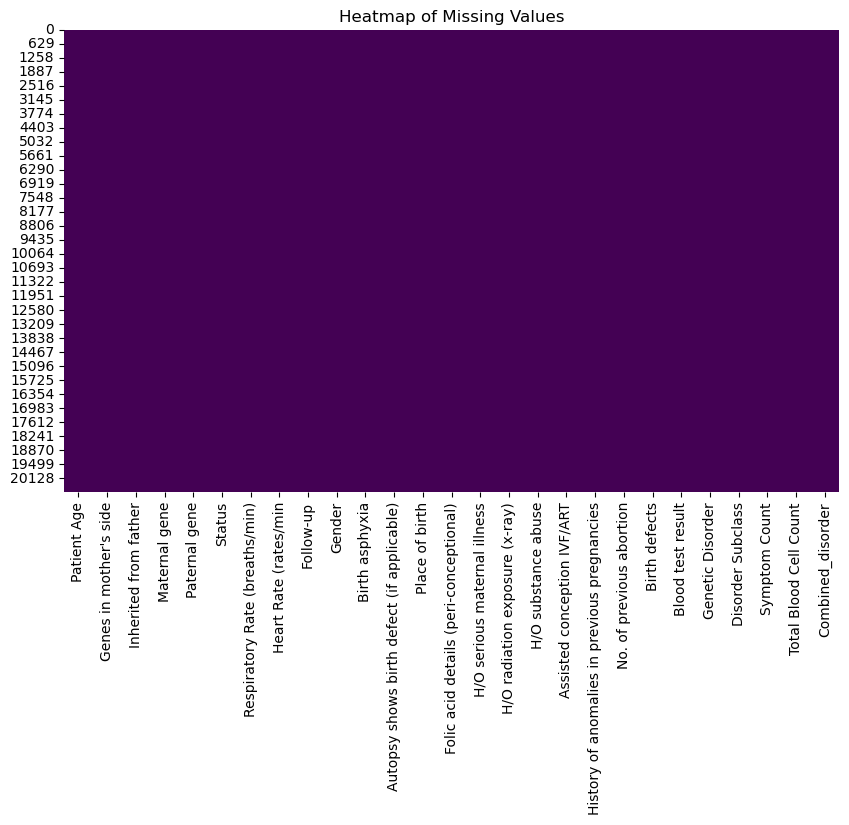

In [24]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [25]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns


### Distribution of categorical columns

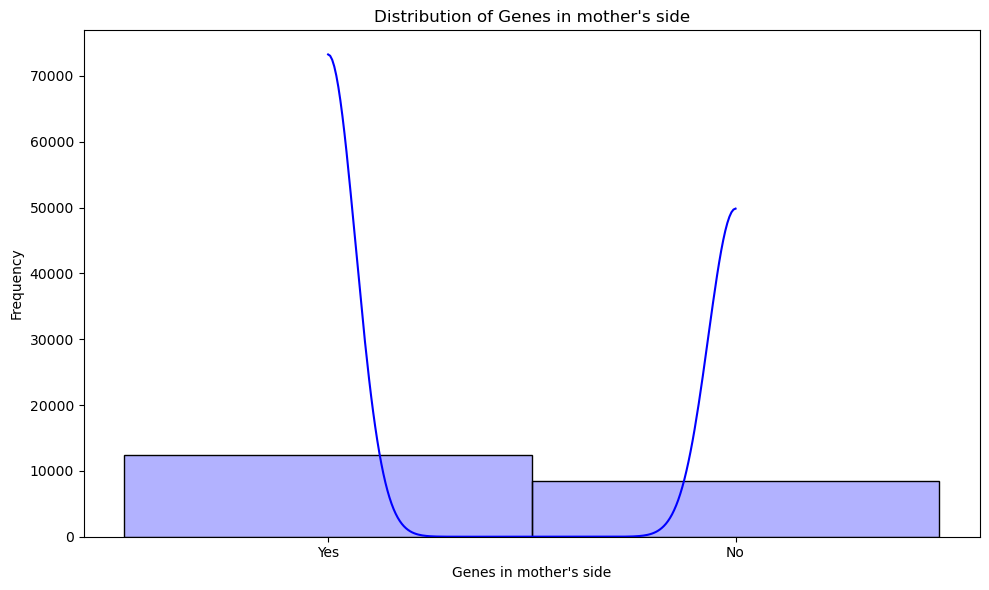

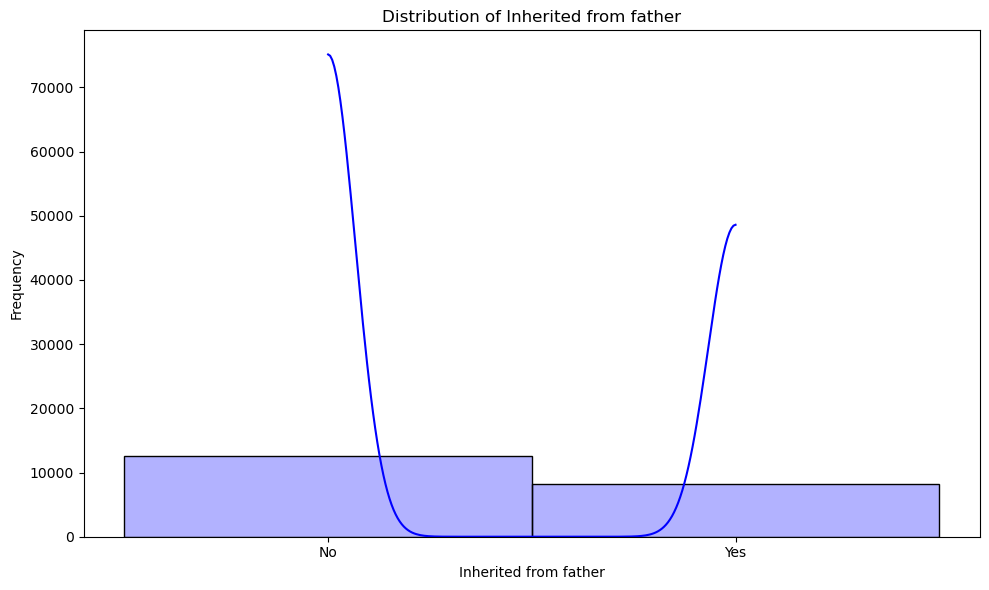

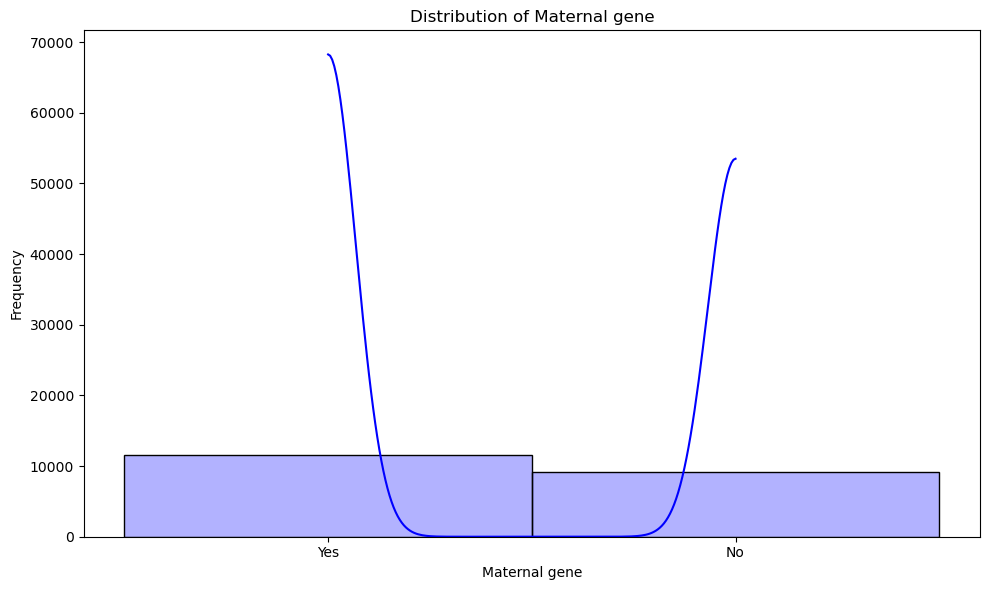

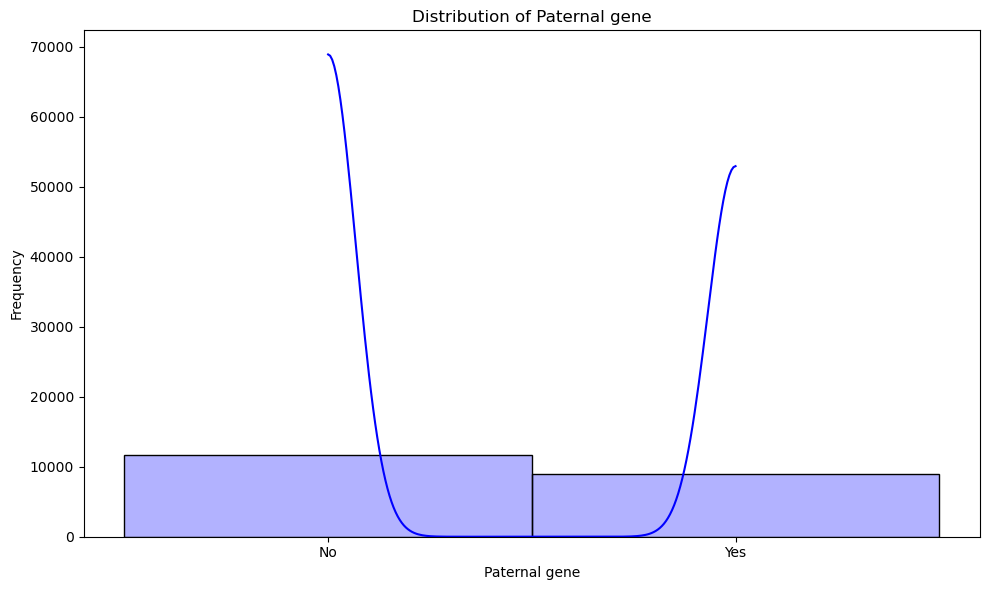

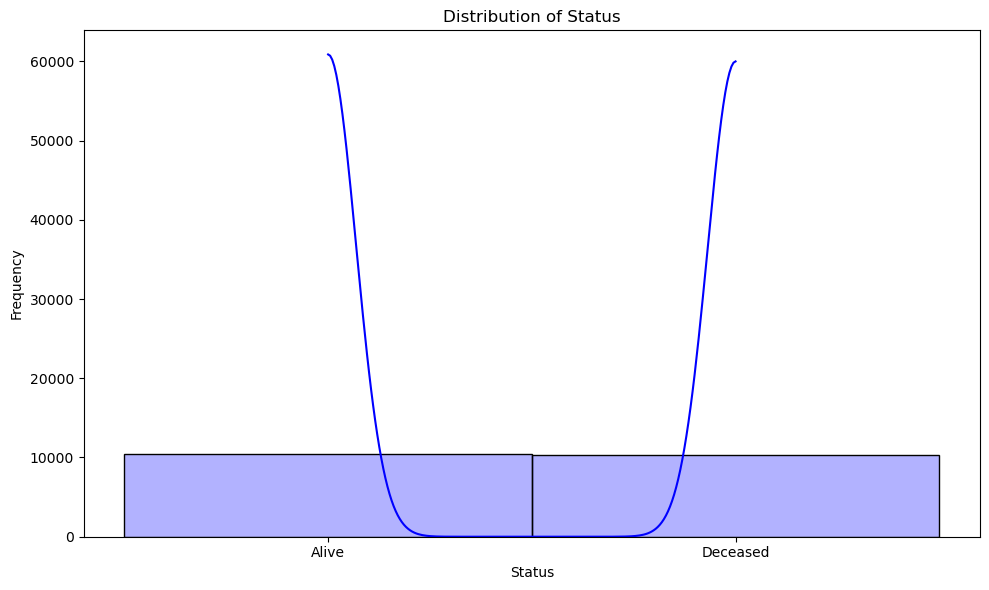

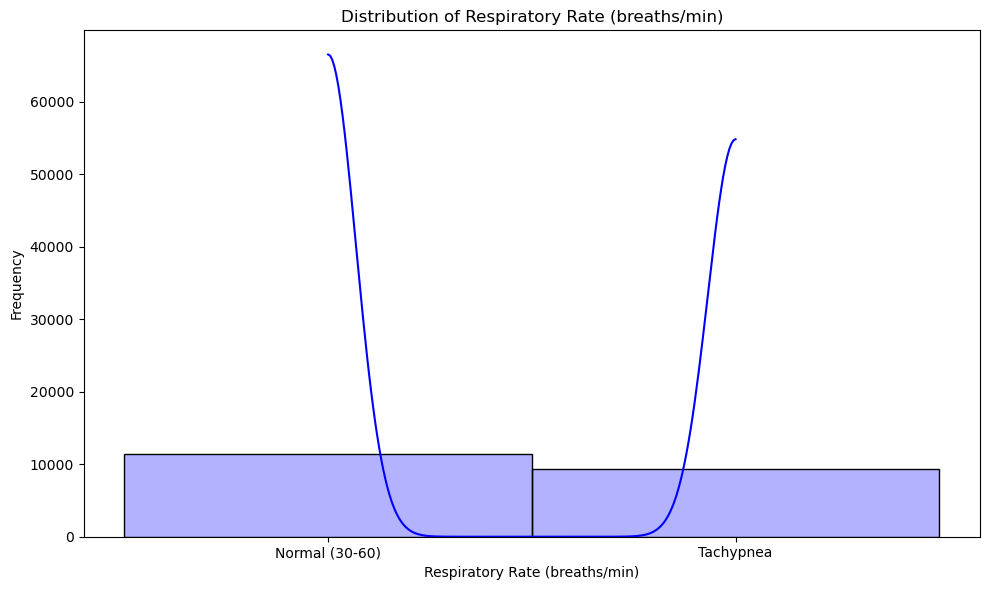

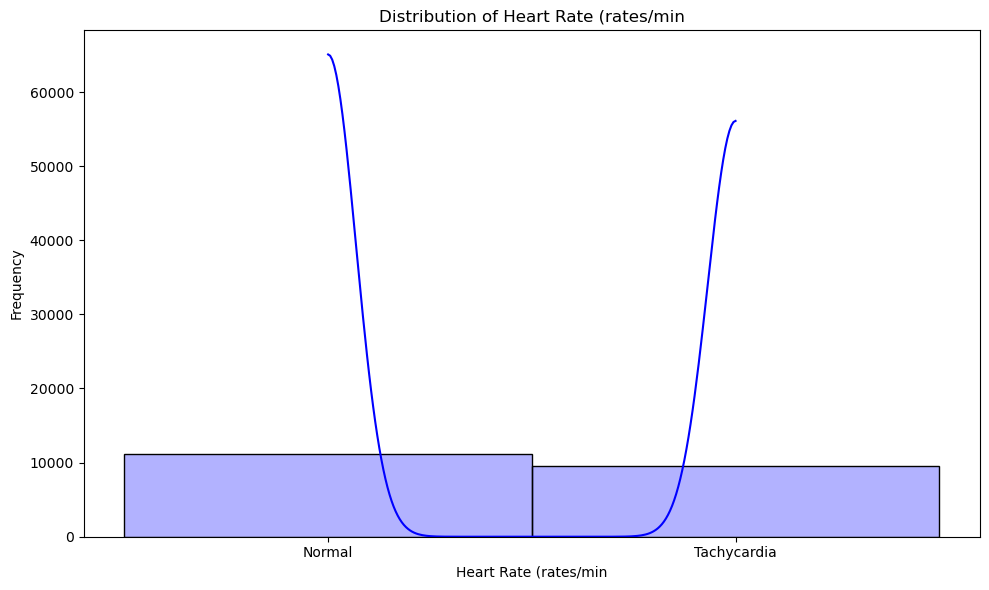

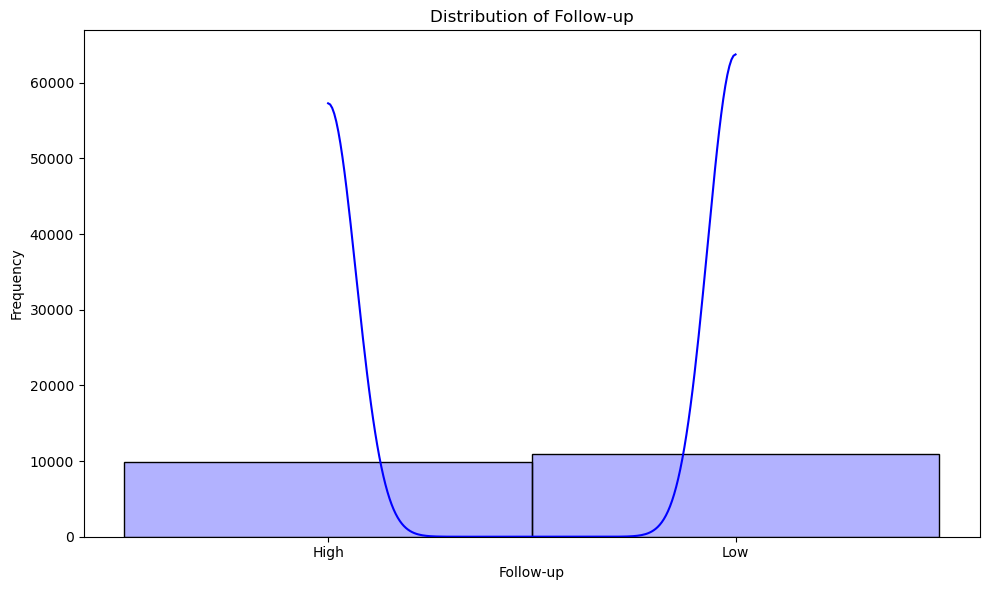

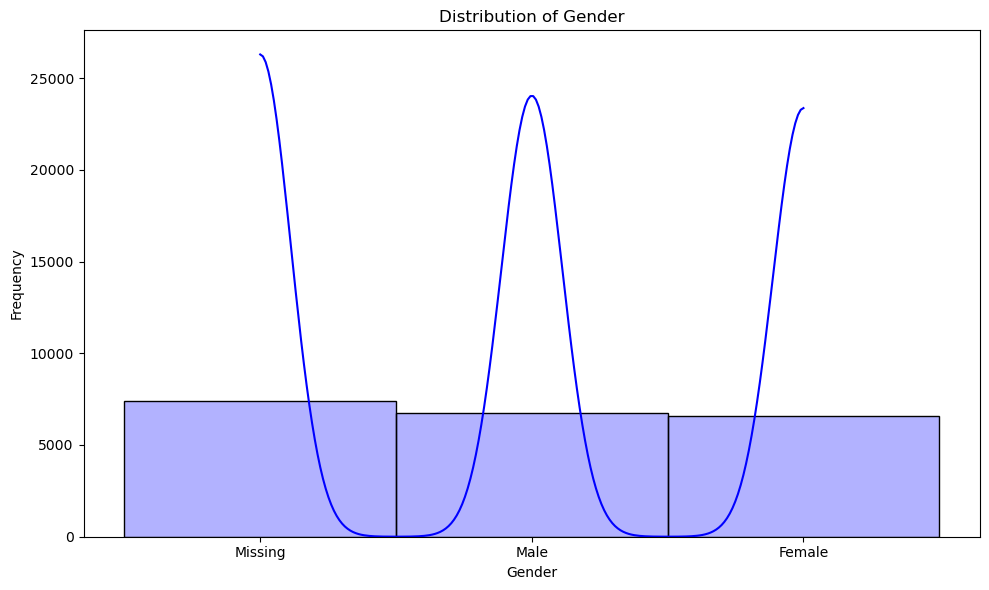

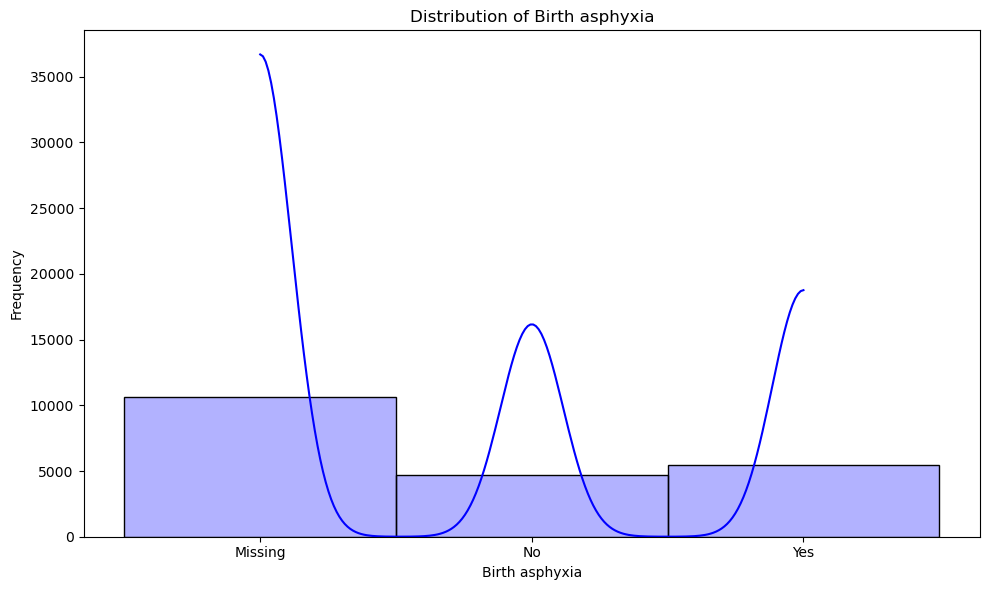

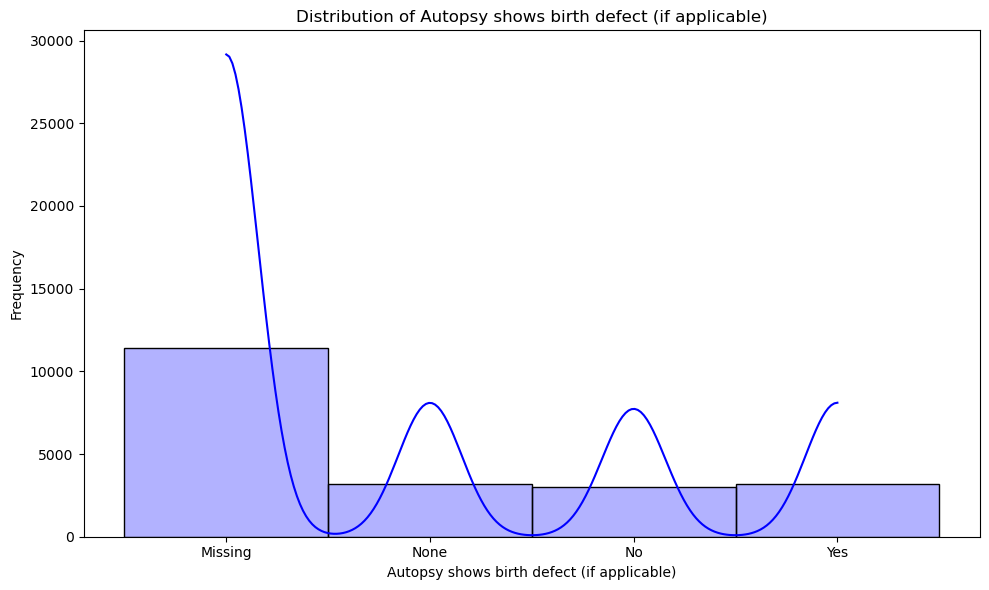

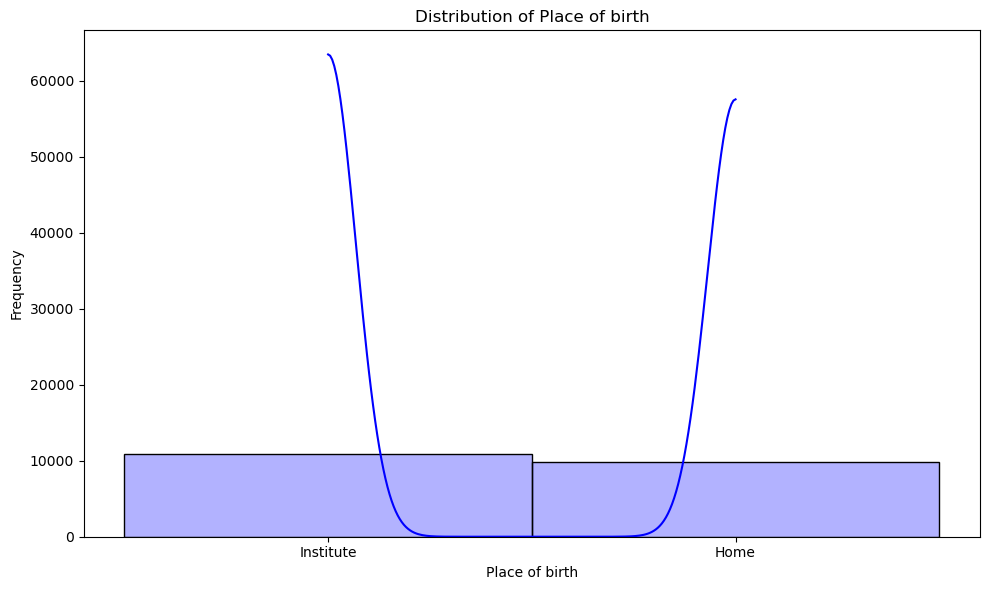

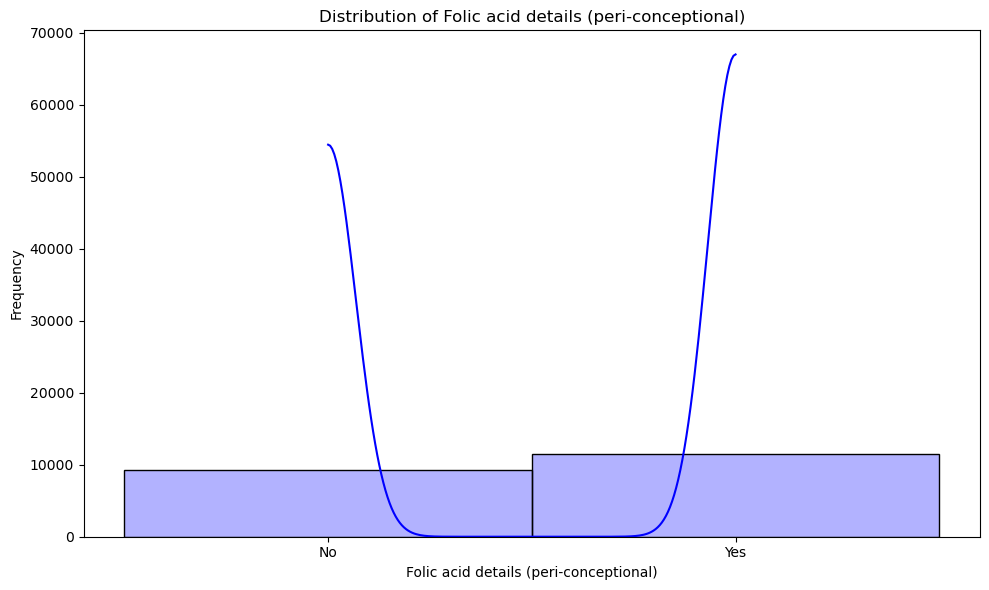

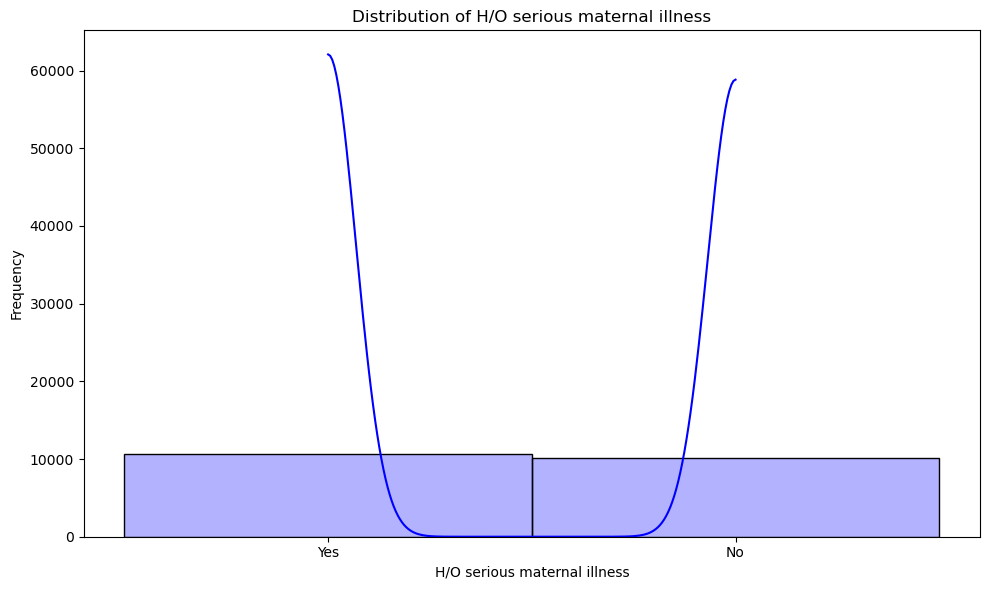

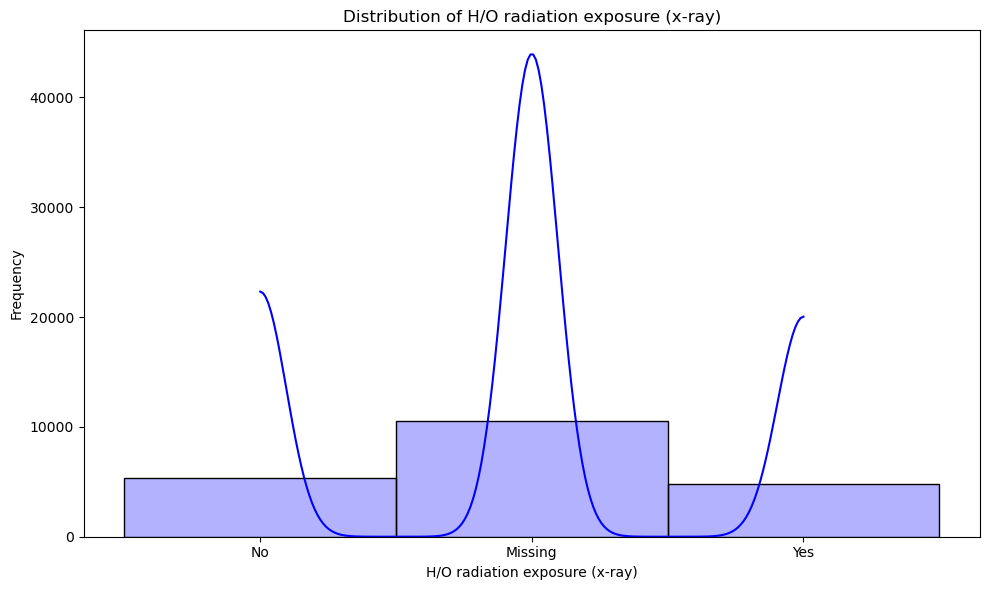

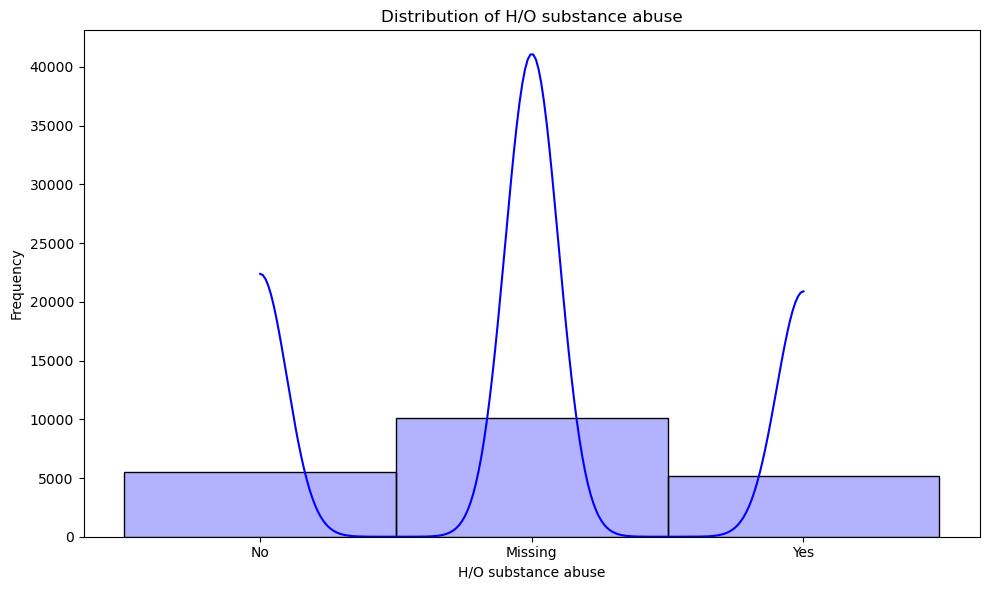

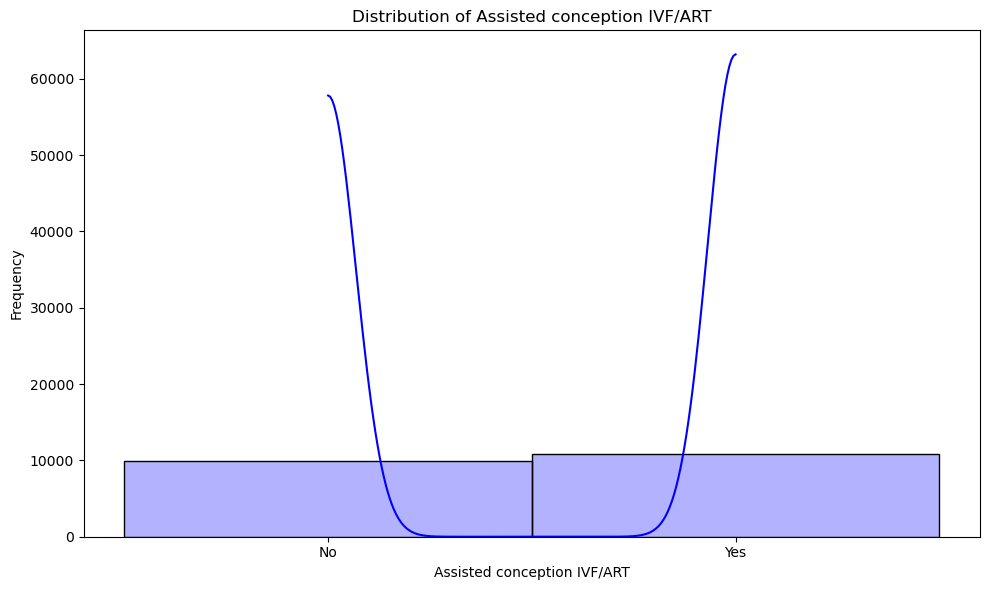

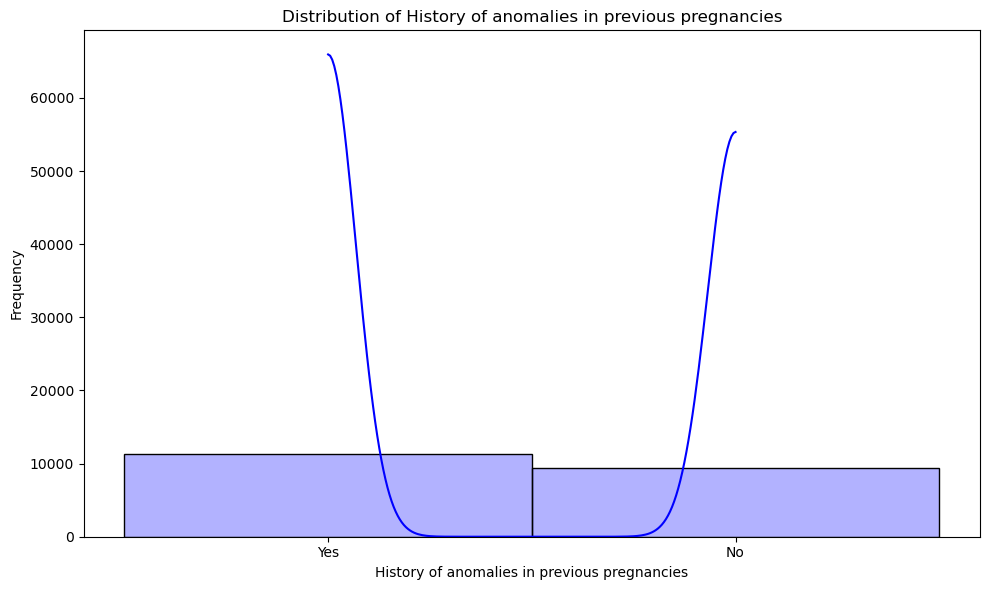

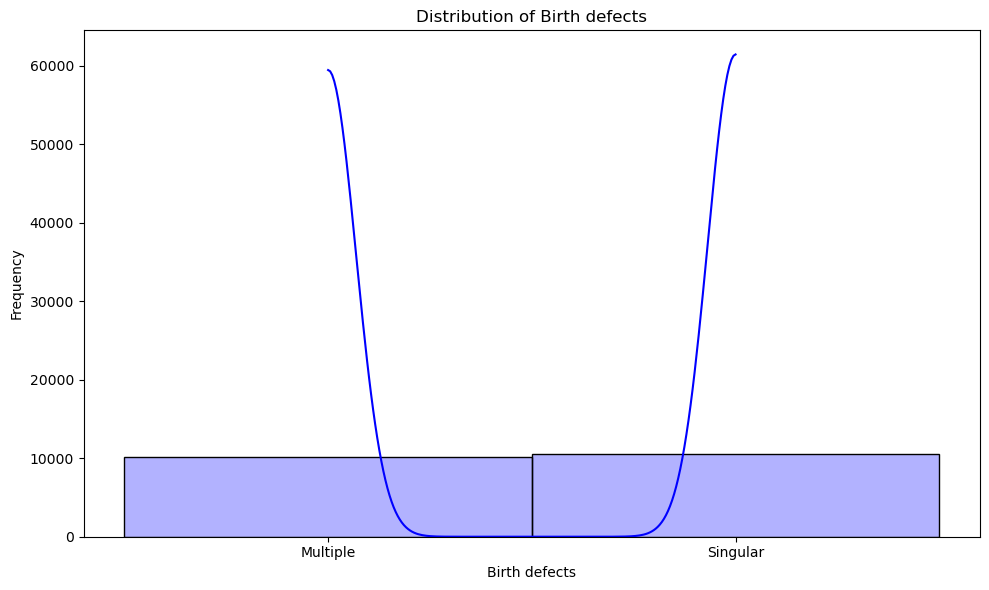

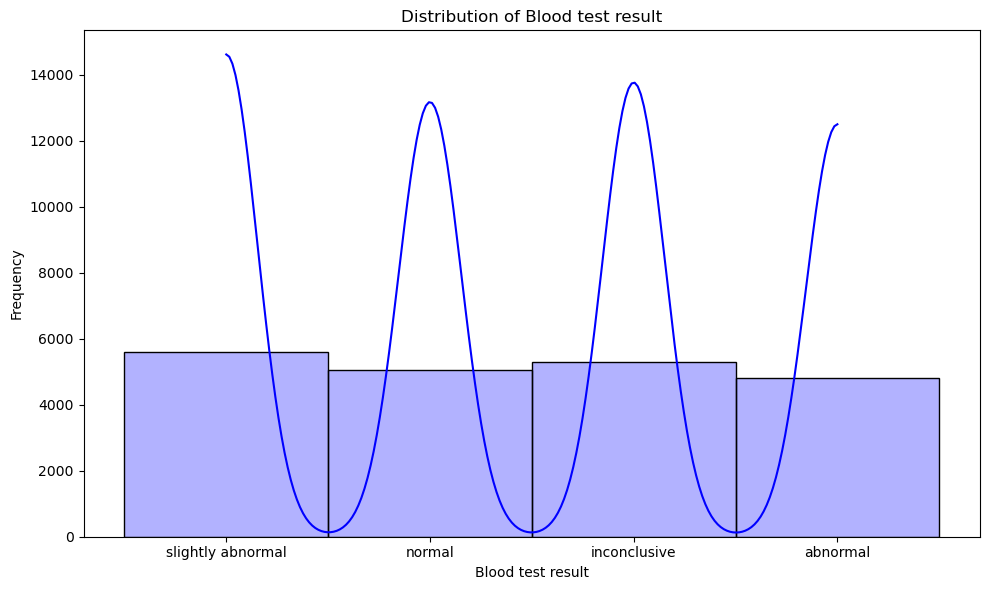

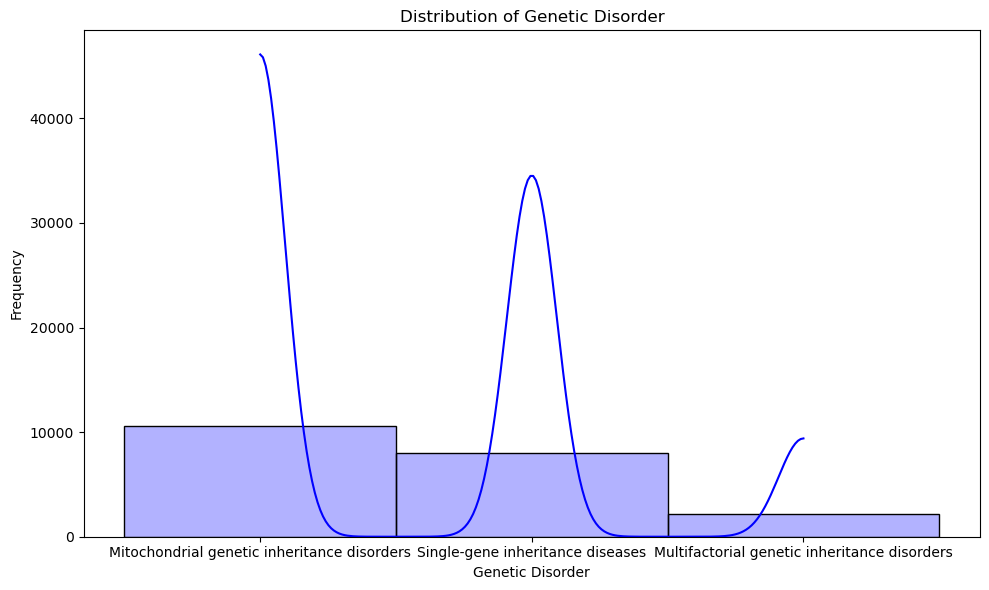

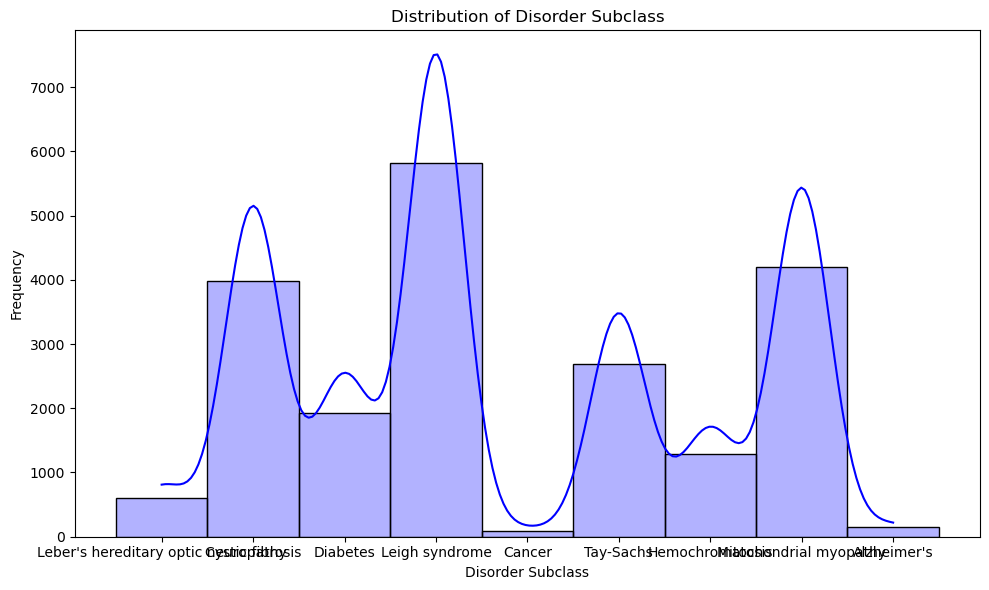

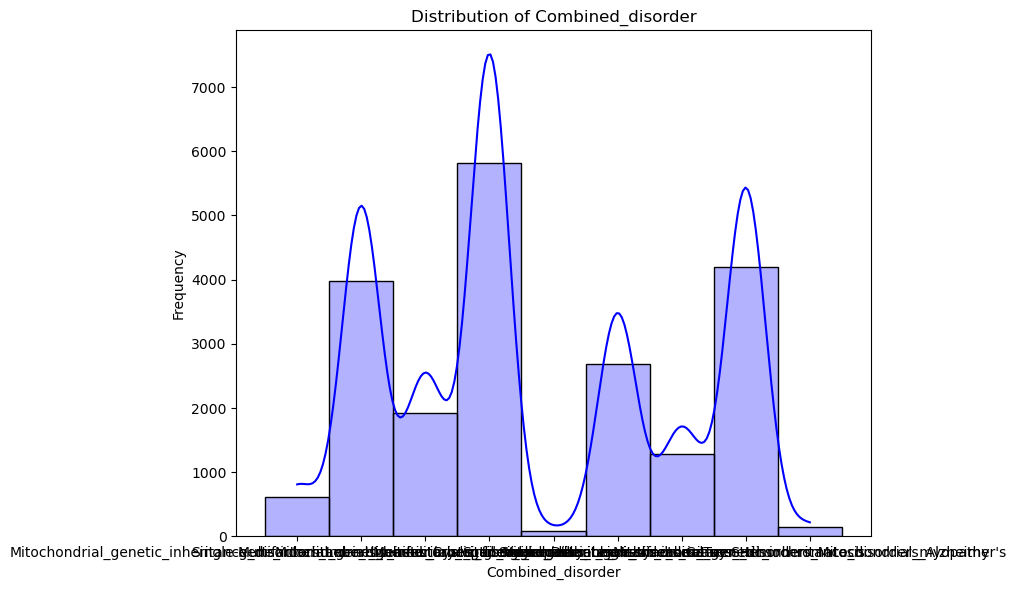

In [26]:
for col in df_train[categorical_cols]:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    #   plt.figure(figsize=(12, 6)) 

    # Plot histogram with KDE
    sns.histplot(df_train[col], color='b', bins=50, kde=True, alpha=0.3)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Show plot for the current column
    plt.show()

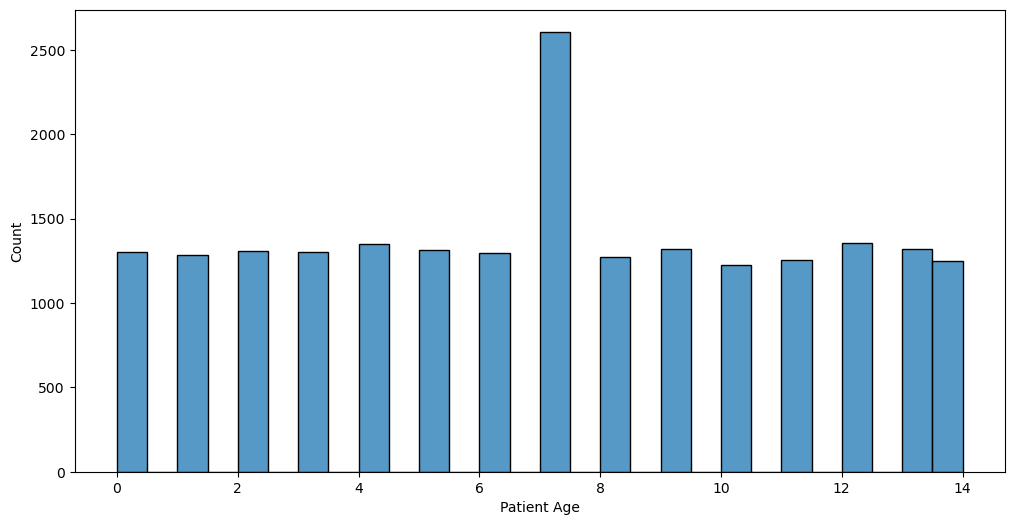

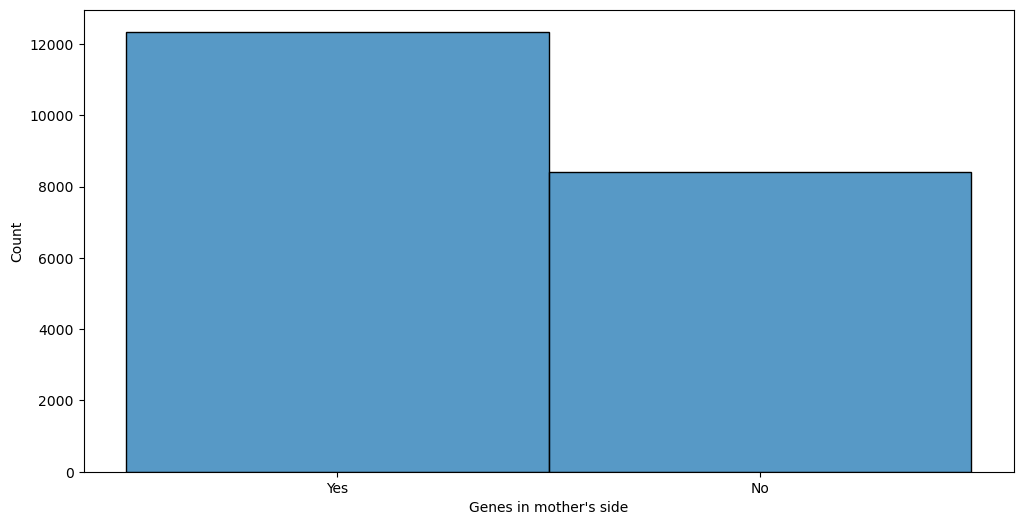

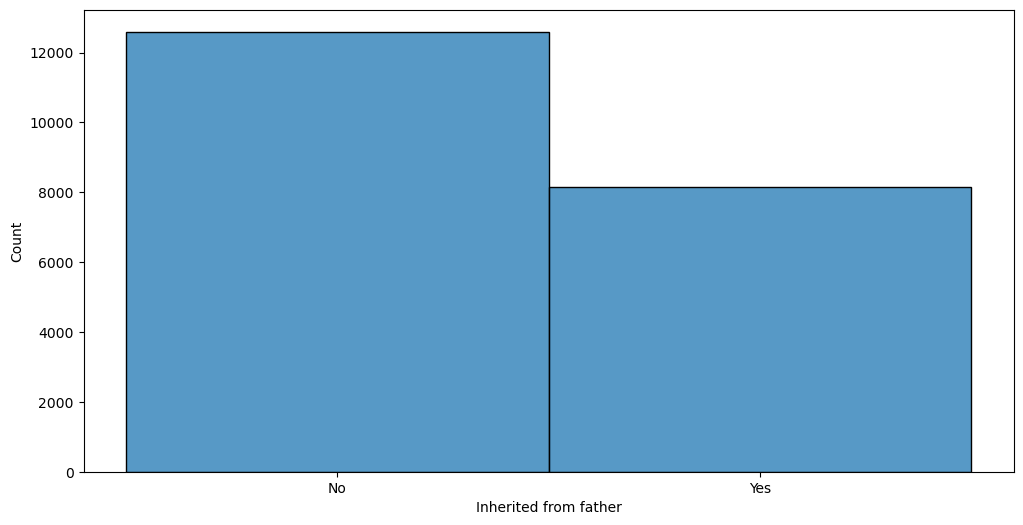

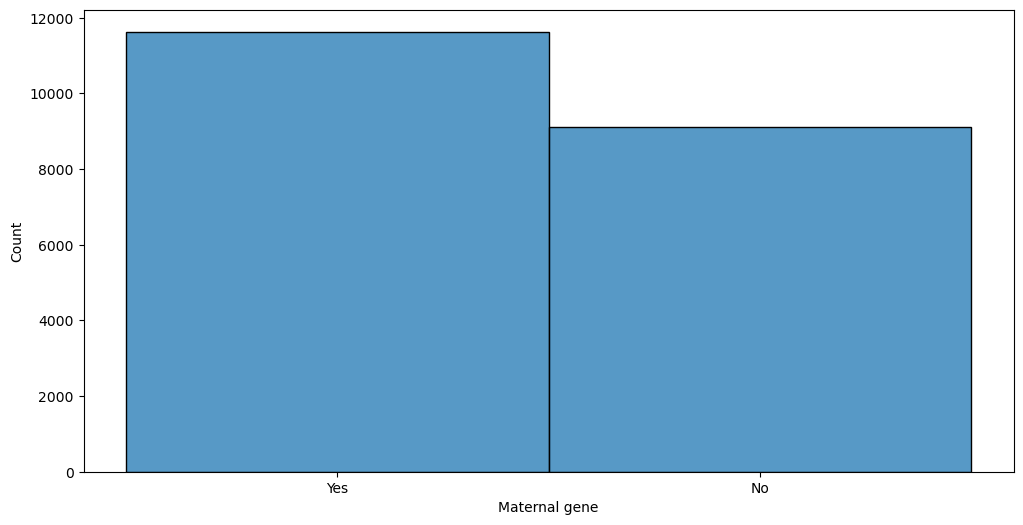

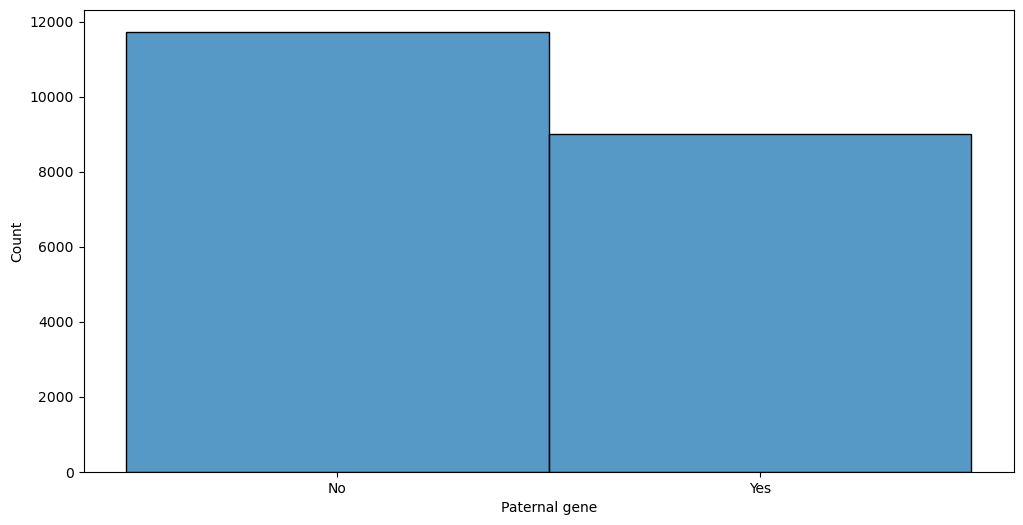

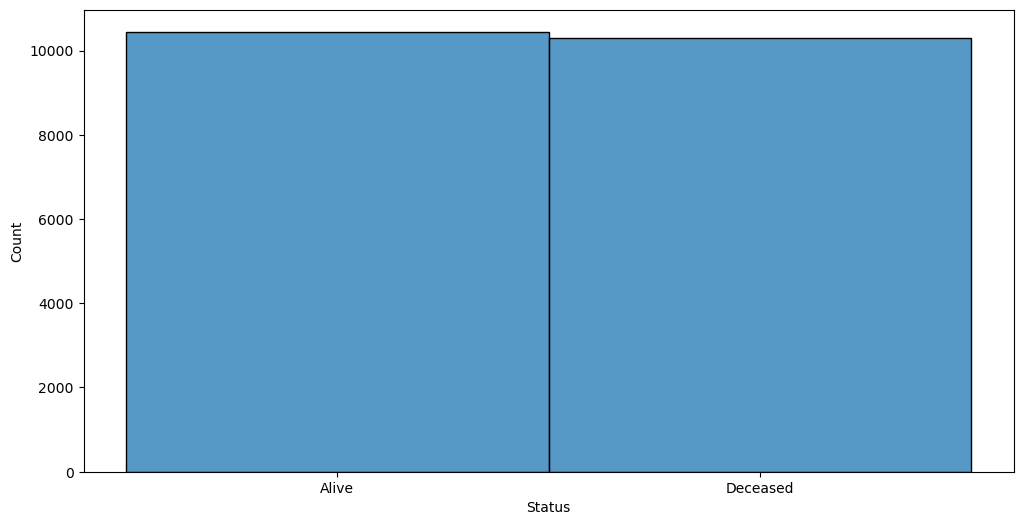

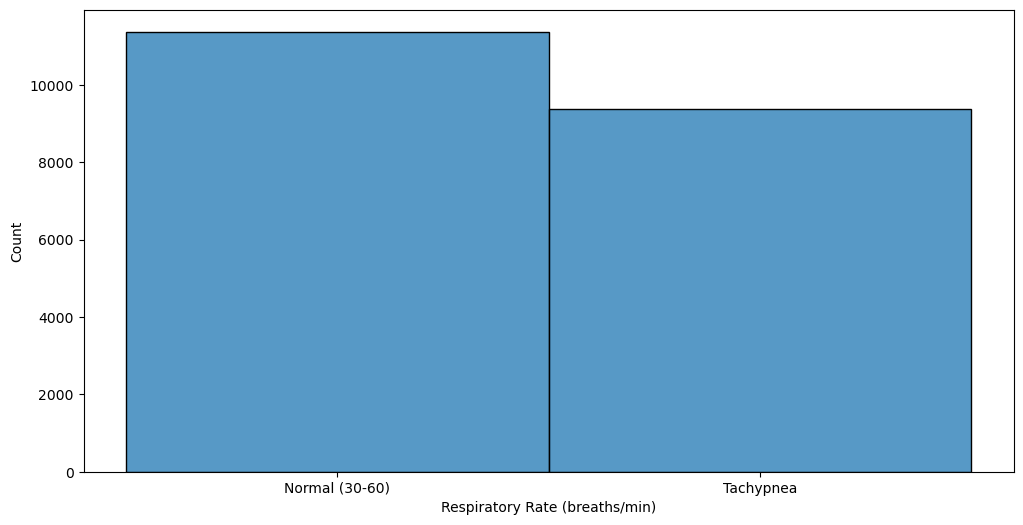

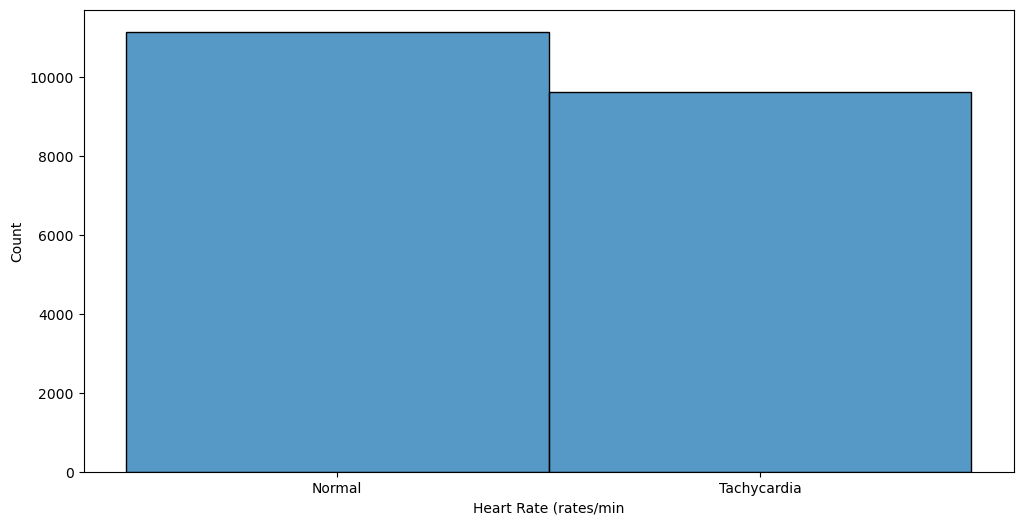

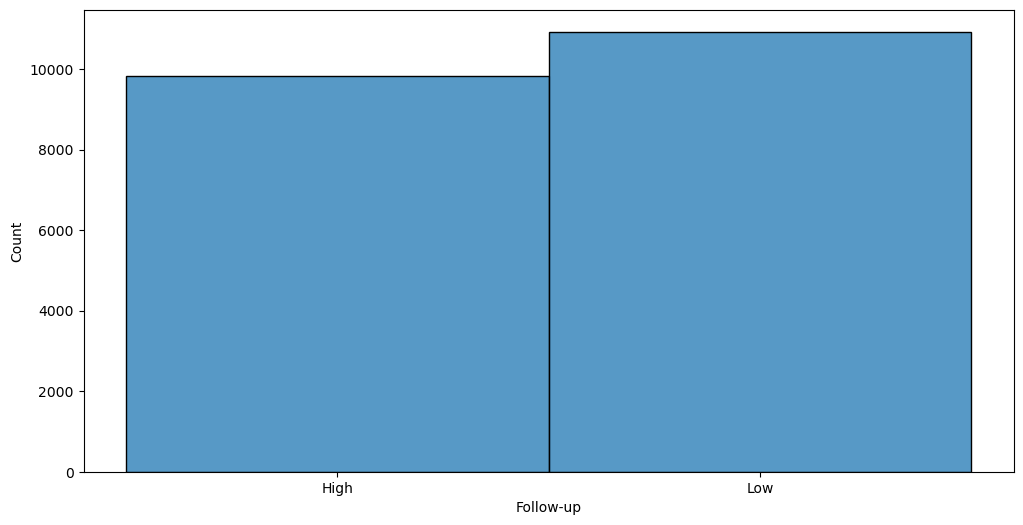

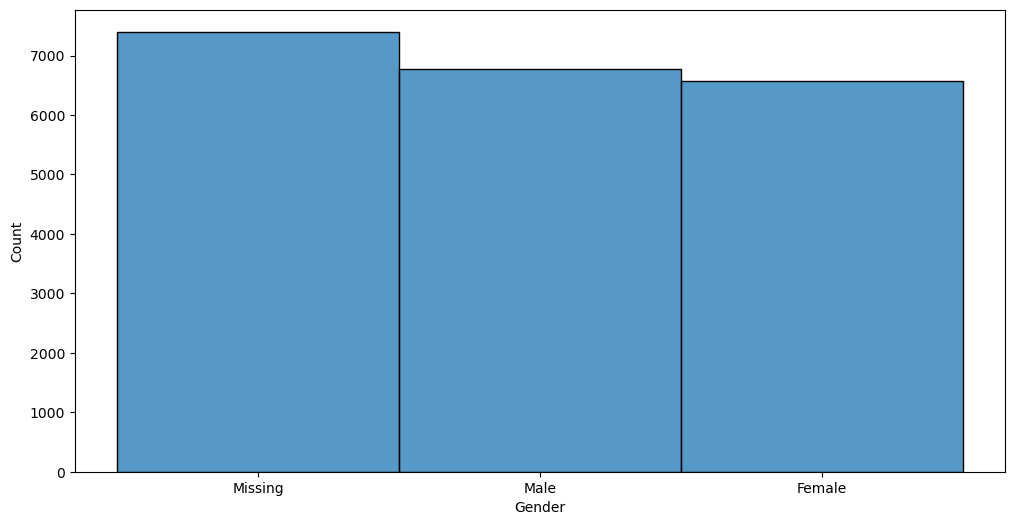

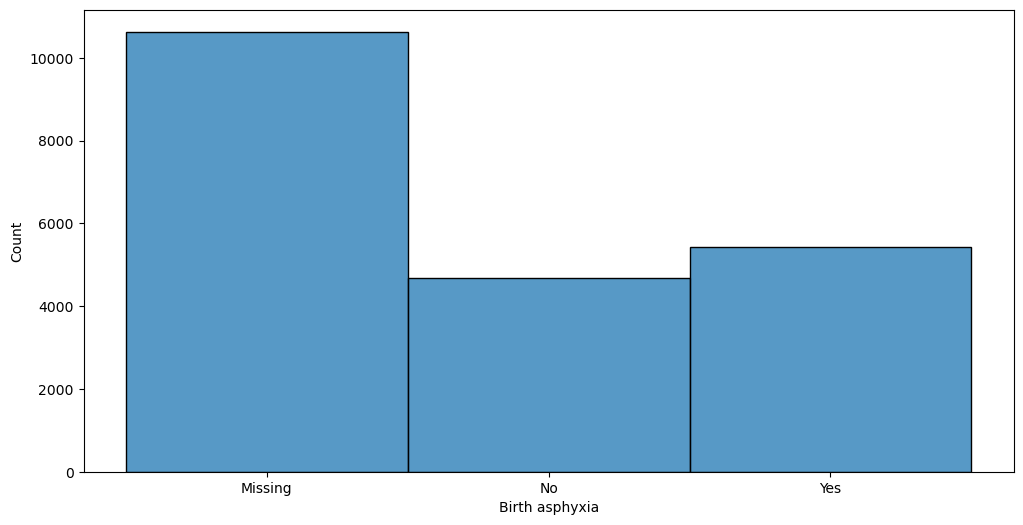

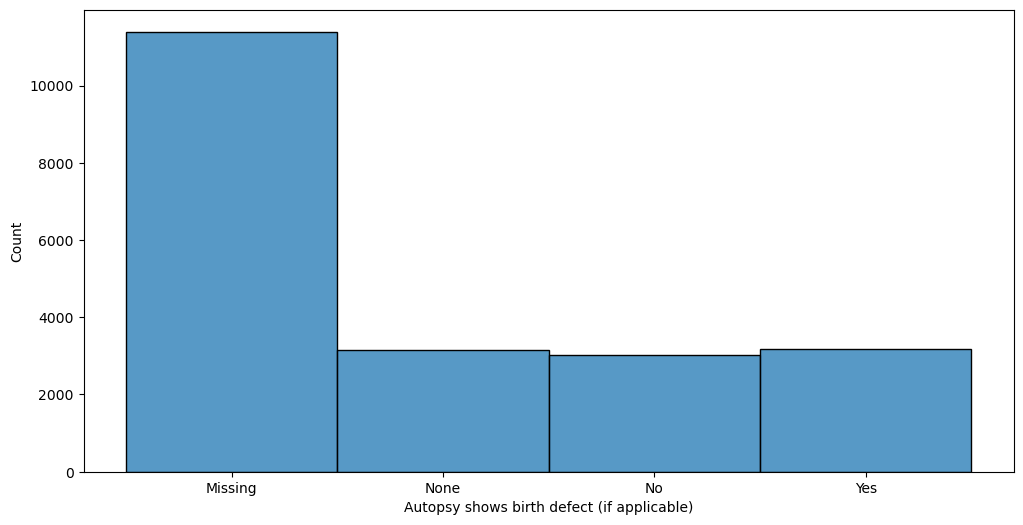

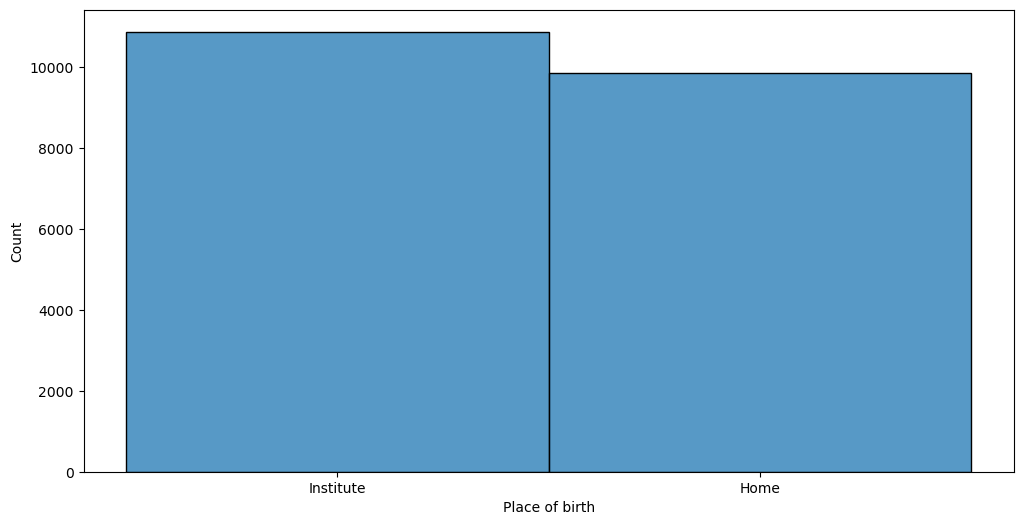

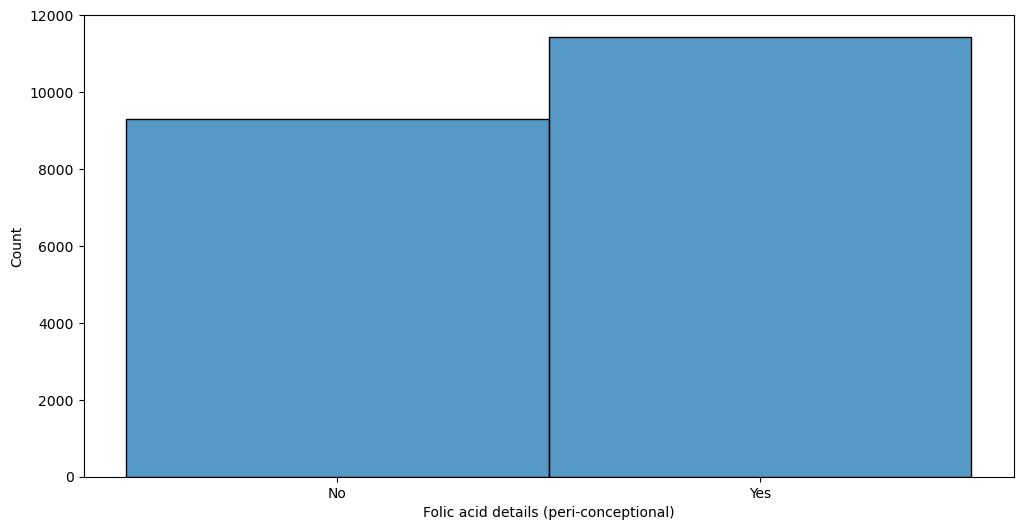

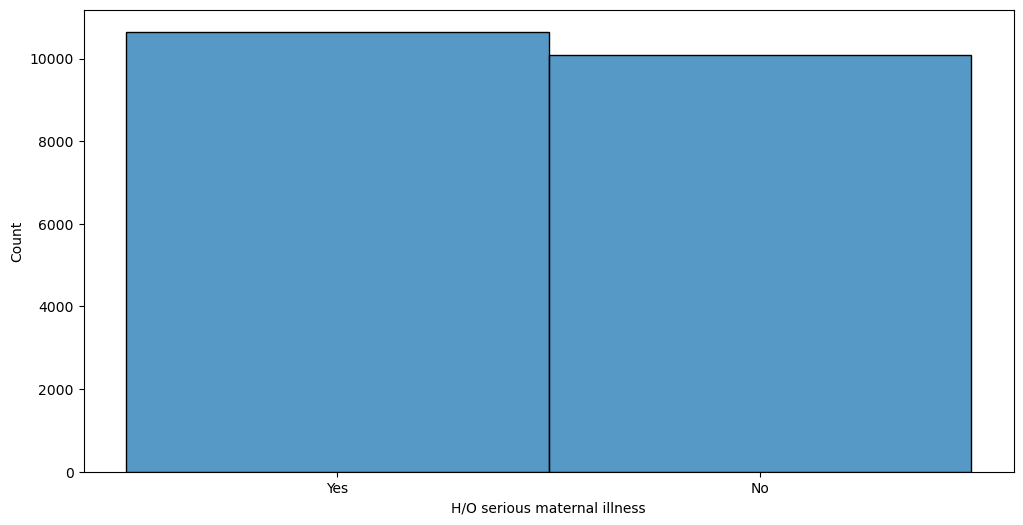

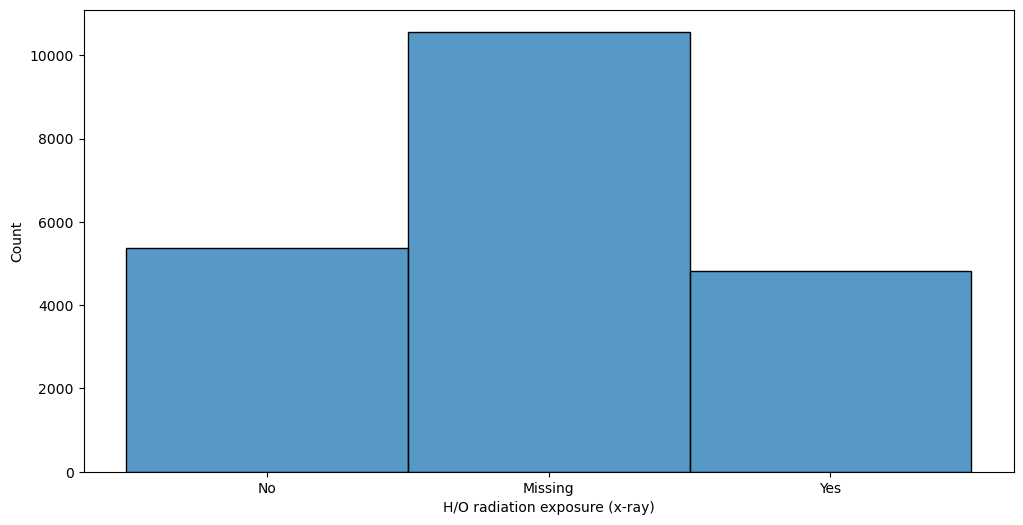

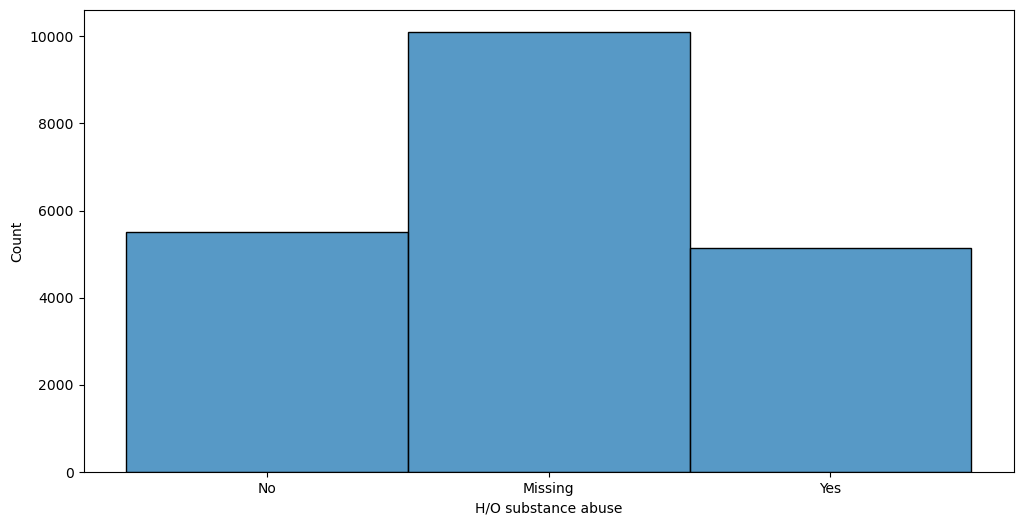

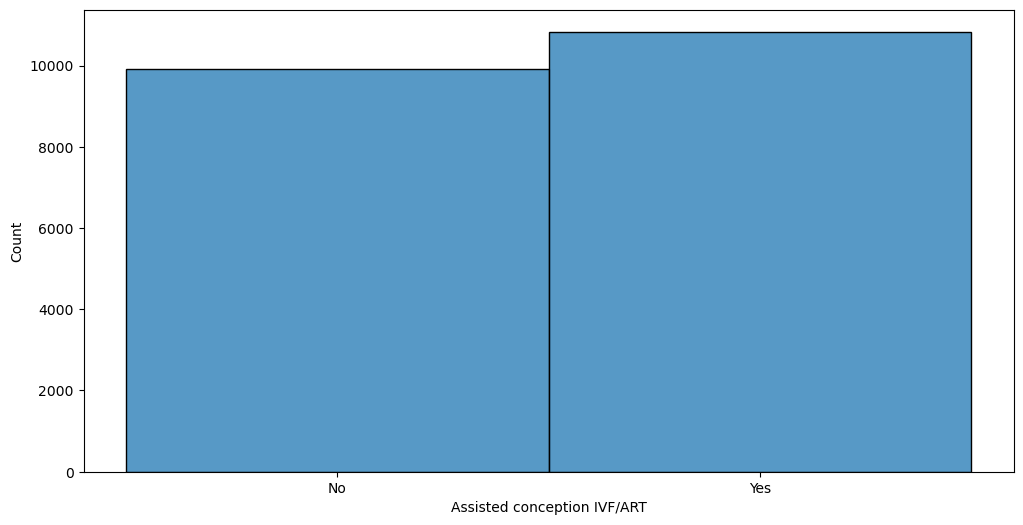

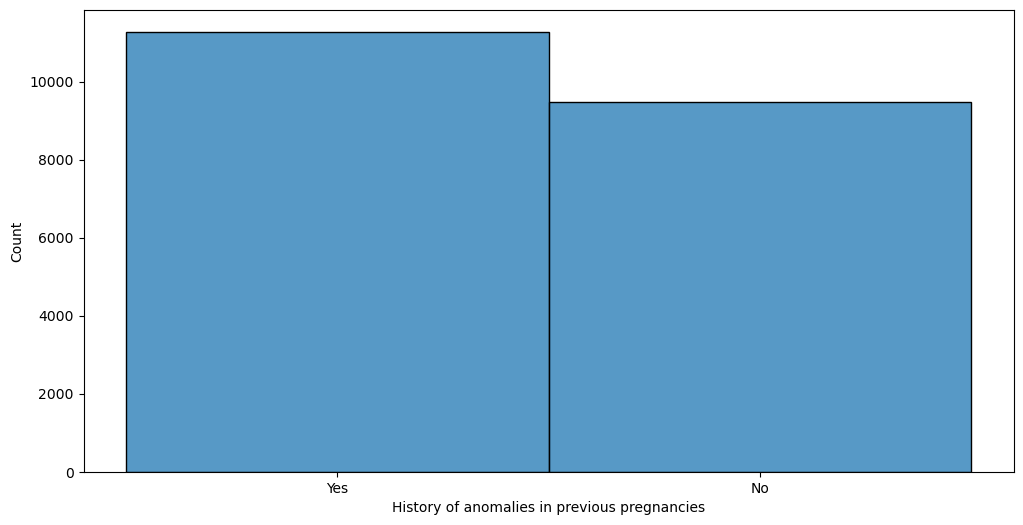

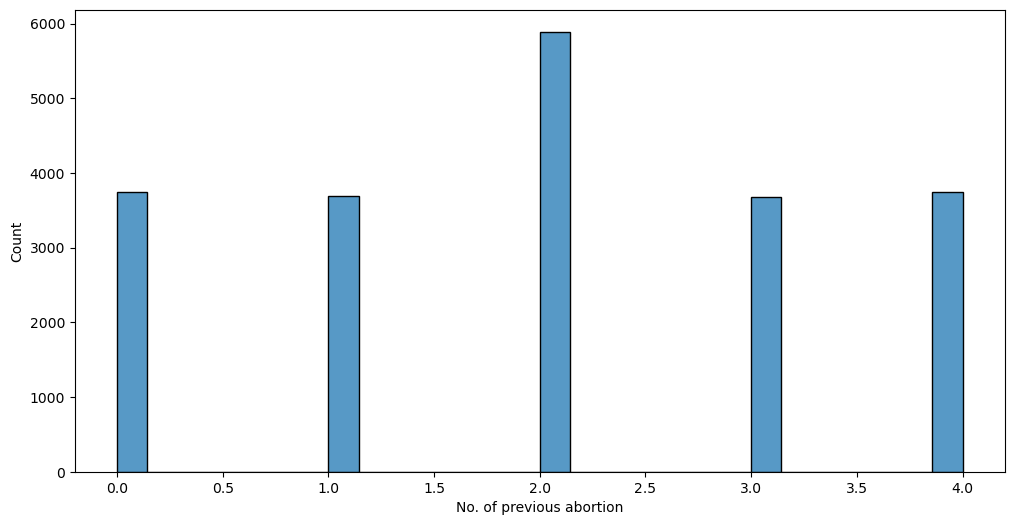

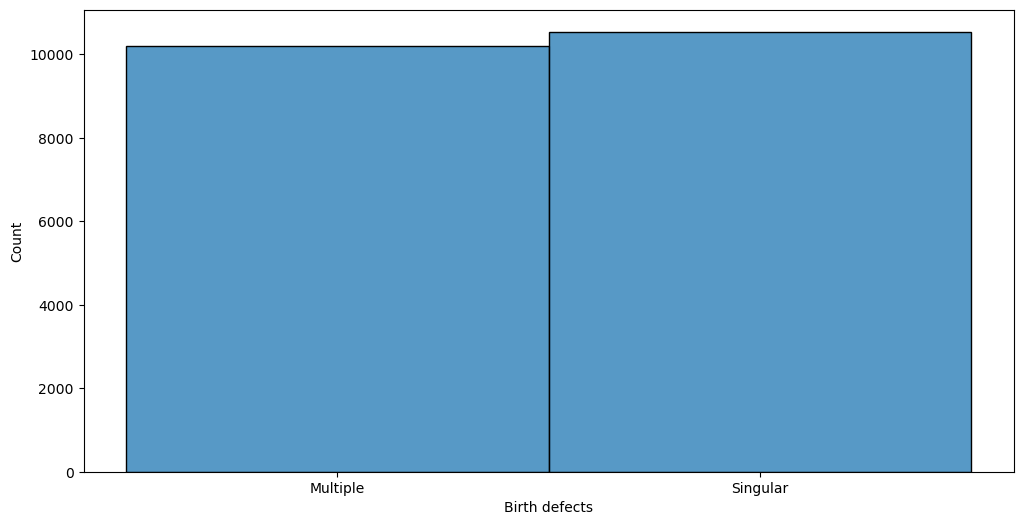

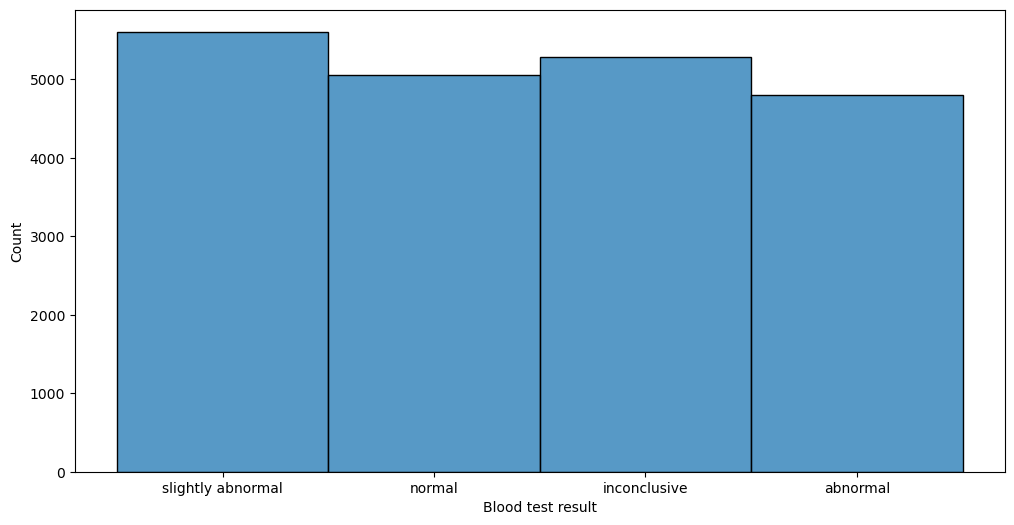

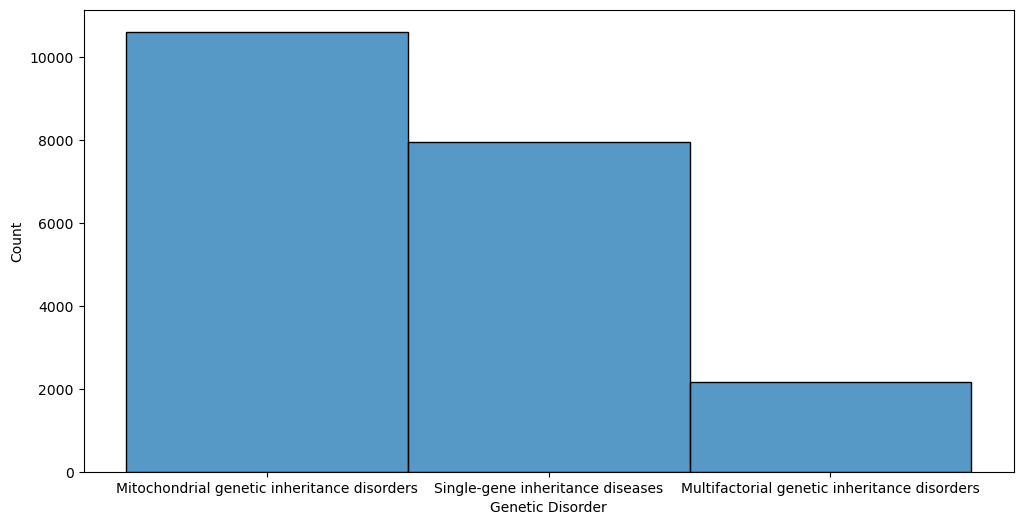

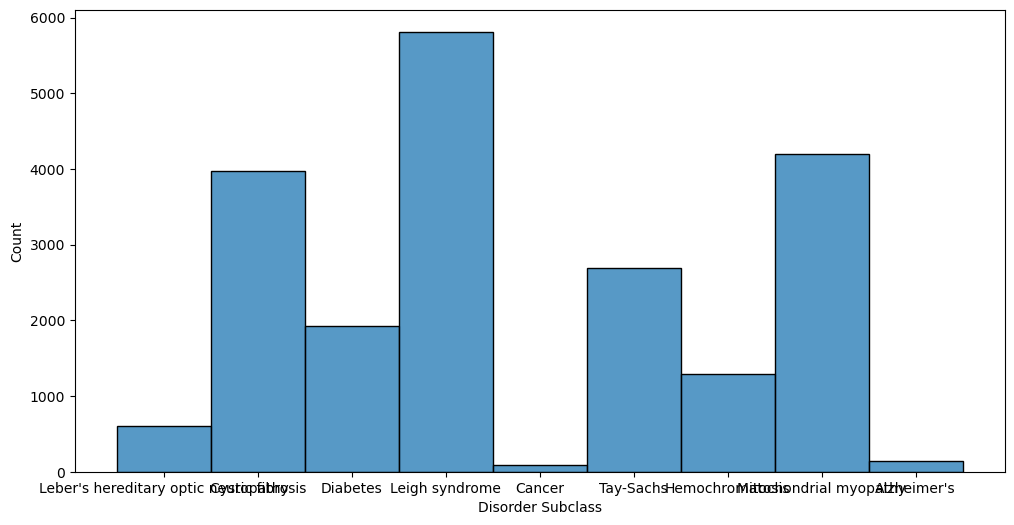

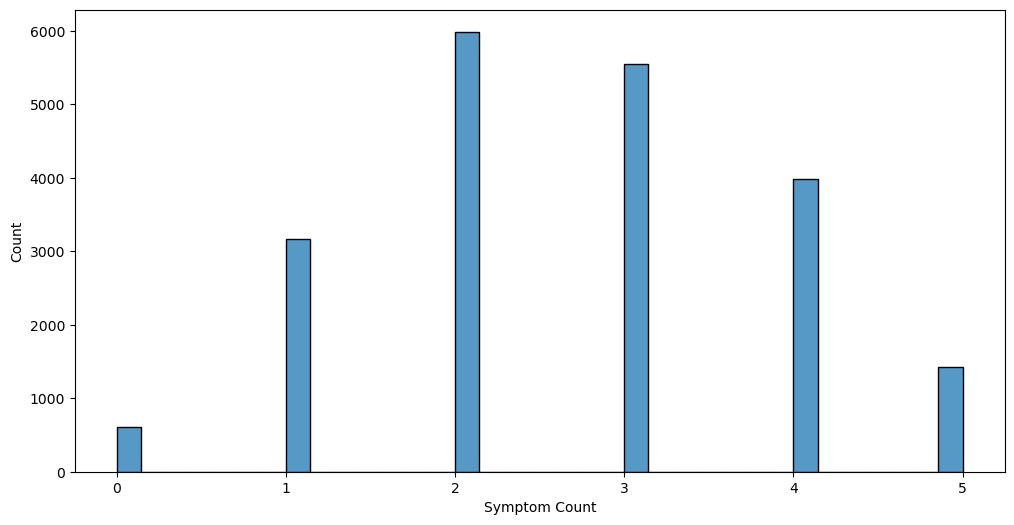

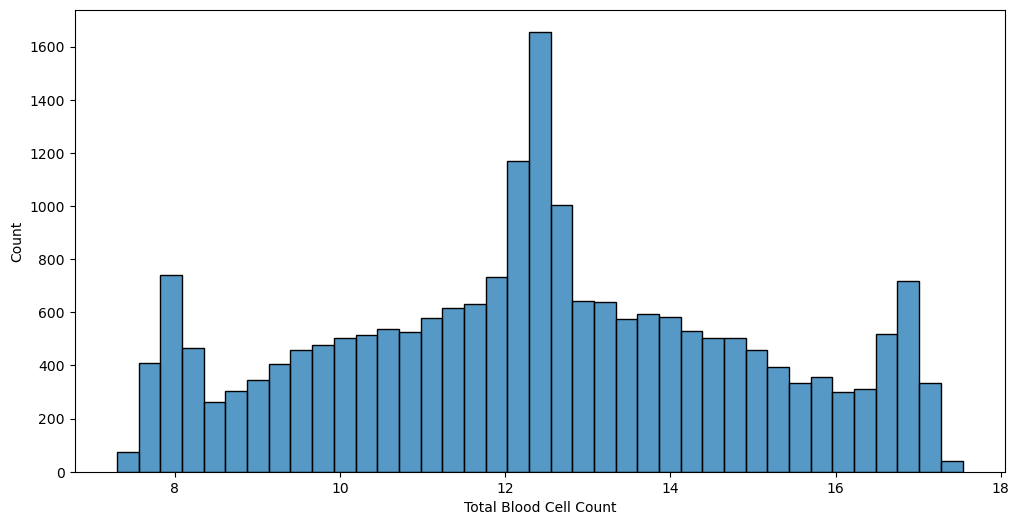

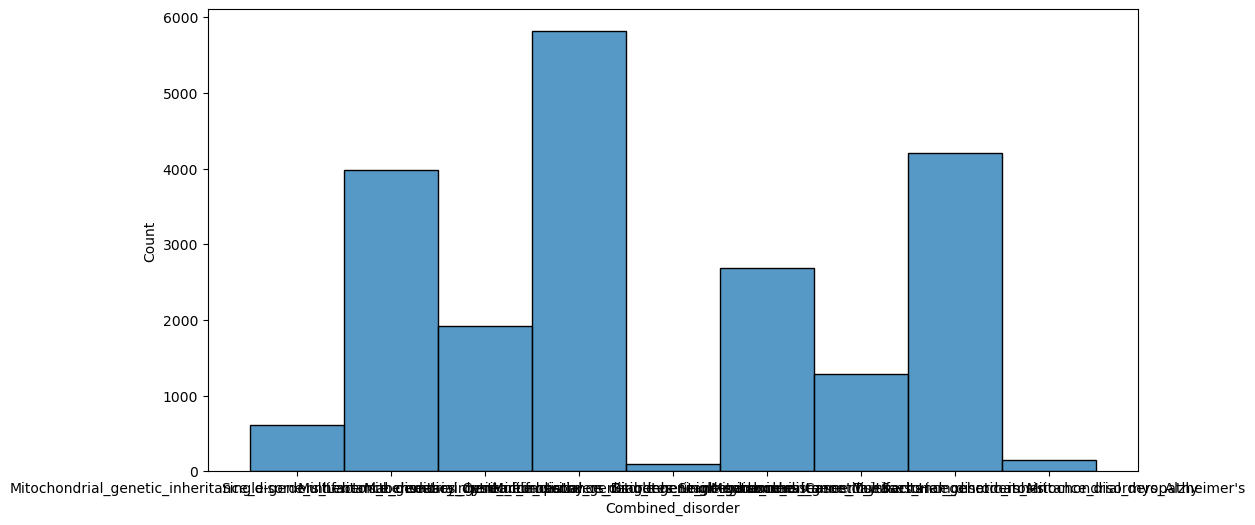

In [27]:
for col in df_train.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_train[col])
    plt.show()

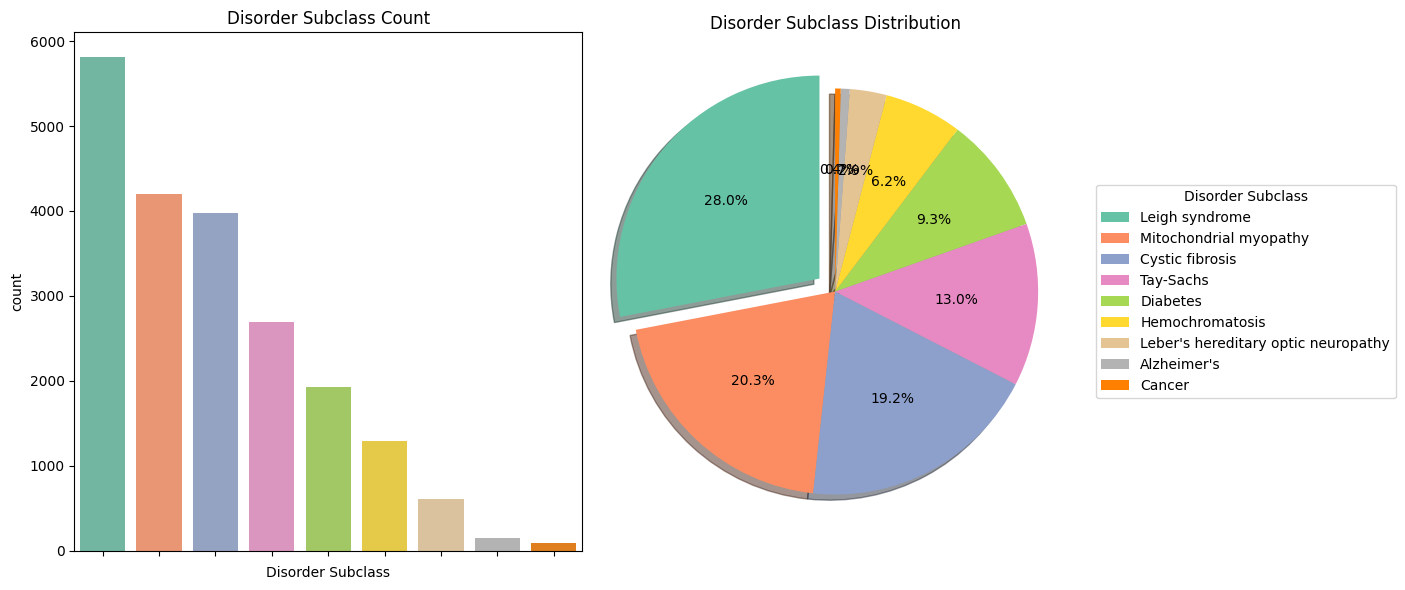

In [27]:
# Custom color palette with 9 colors
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff7f00']

# Define the order based on value_counts() so both plots have the same order
category_order = df_train['Disorder Subclass'].value_counts().index

# Plot Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Disorder Subclass (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Disorder Subclass', data=df_train, palette=custom_colors, order=category_order)
plt.title('Disorder Subclass Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Disorder Subclass Distribution (with the same order)
plt.subplot(1, 2, 2)
disorder_counts = df_train['Disorder Subclass'].value_counts()
plt.pie(disorder_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), shadow=True, colors=custom_colors)
plt.title('Disorder Subclass Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Disorder Subclass")

plt.tight_layout()
plt.show()


### Visualise Data and its Effect on Target (Genetic Disorder & Disorder Subclass)

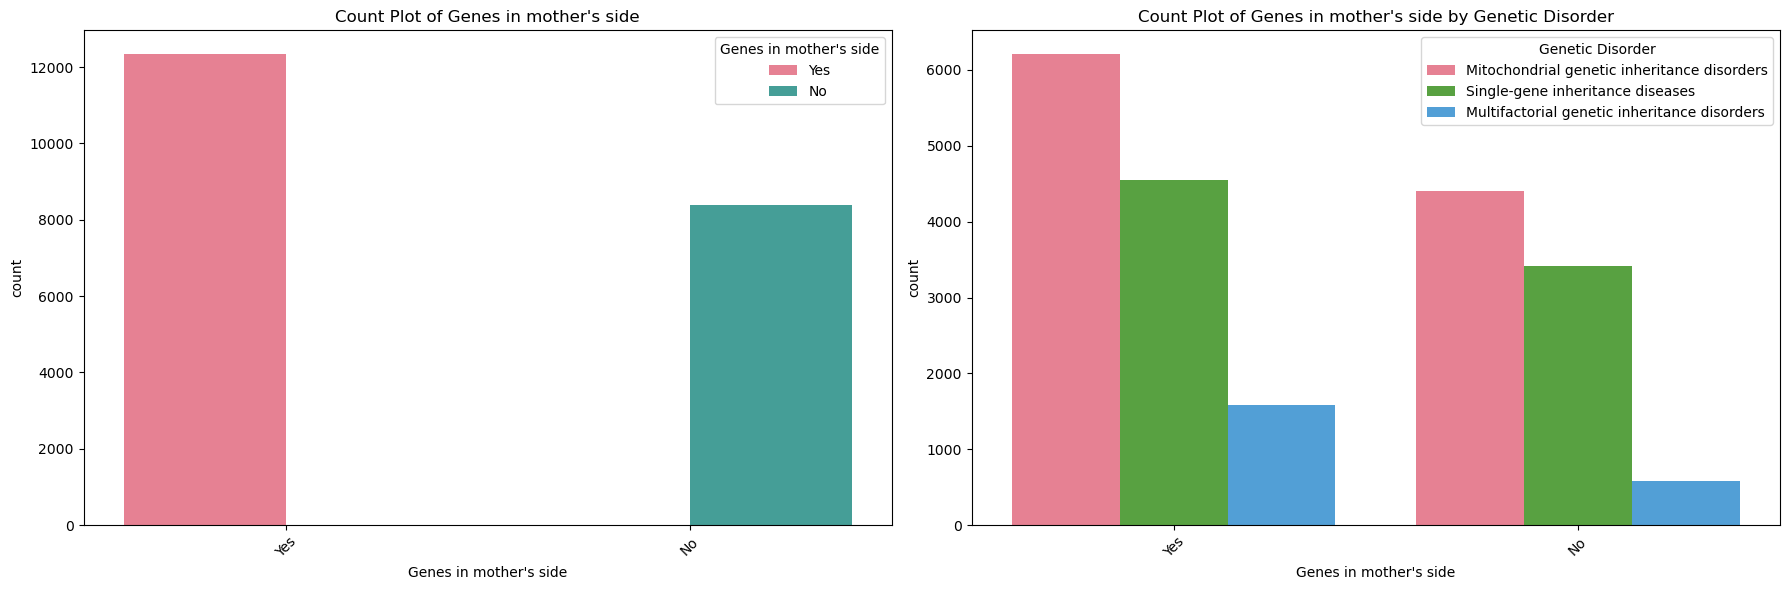

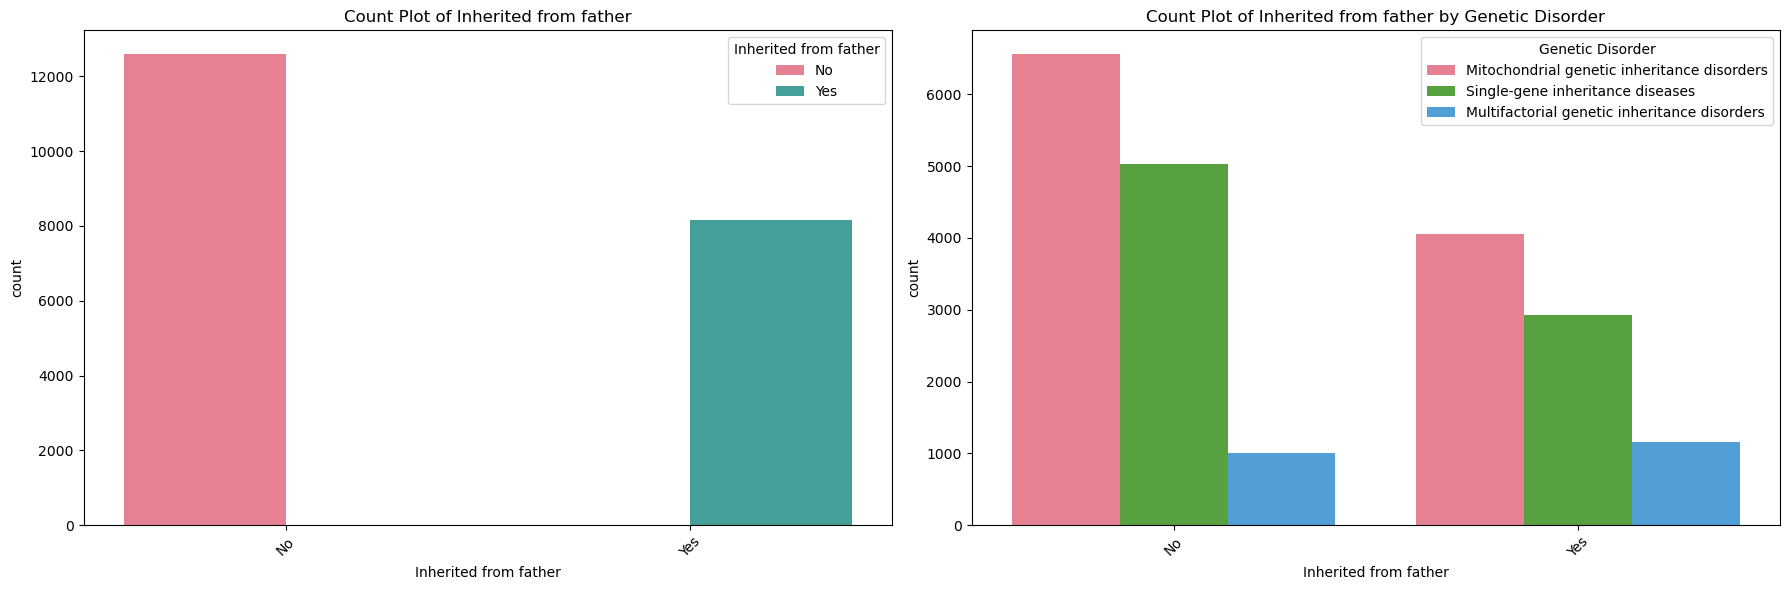

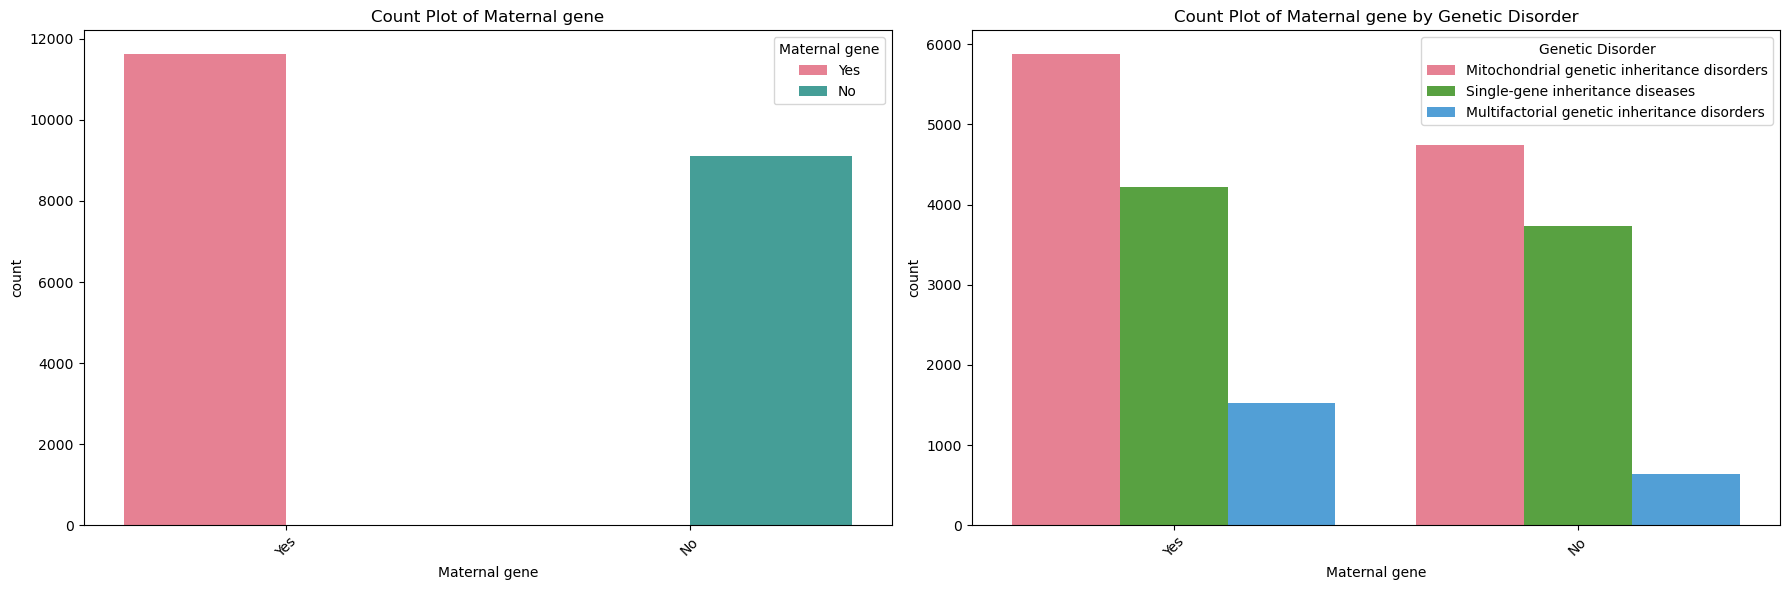

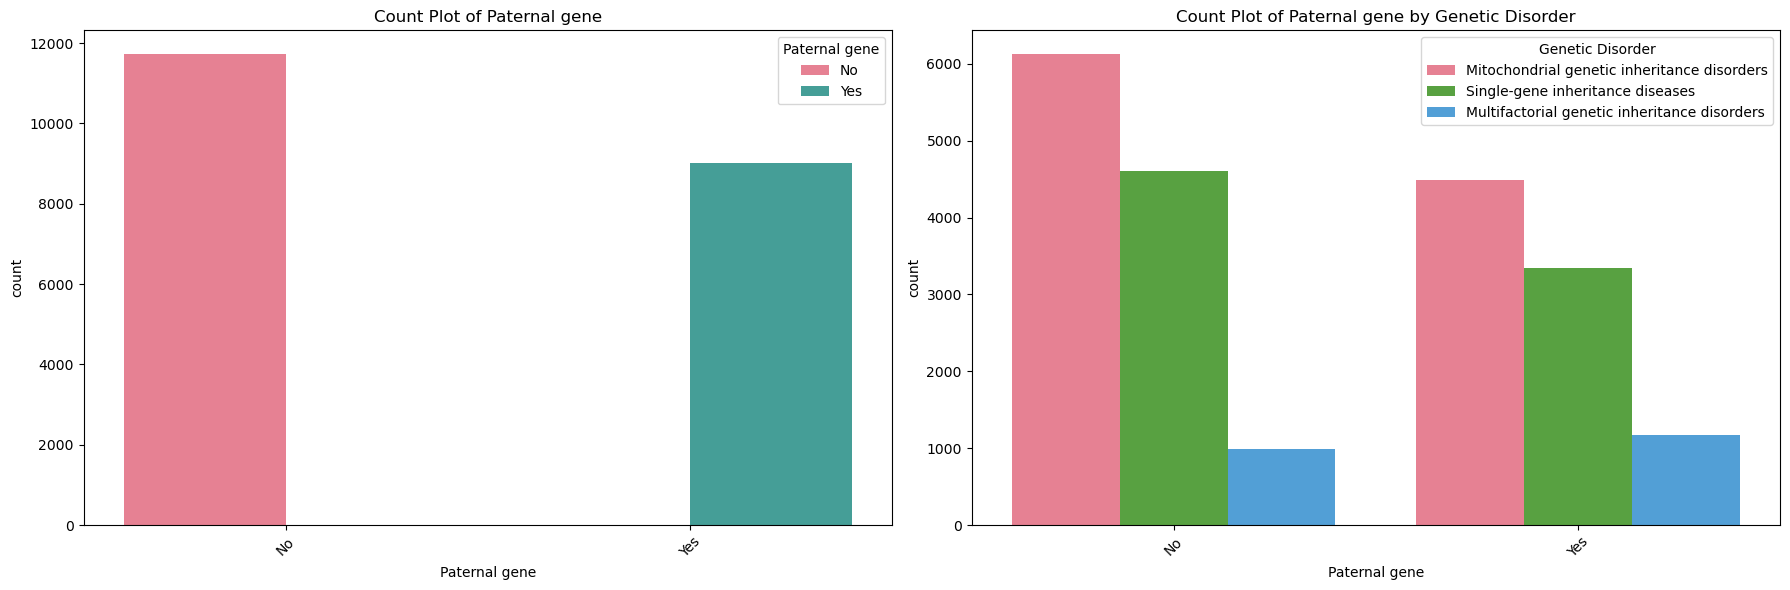

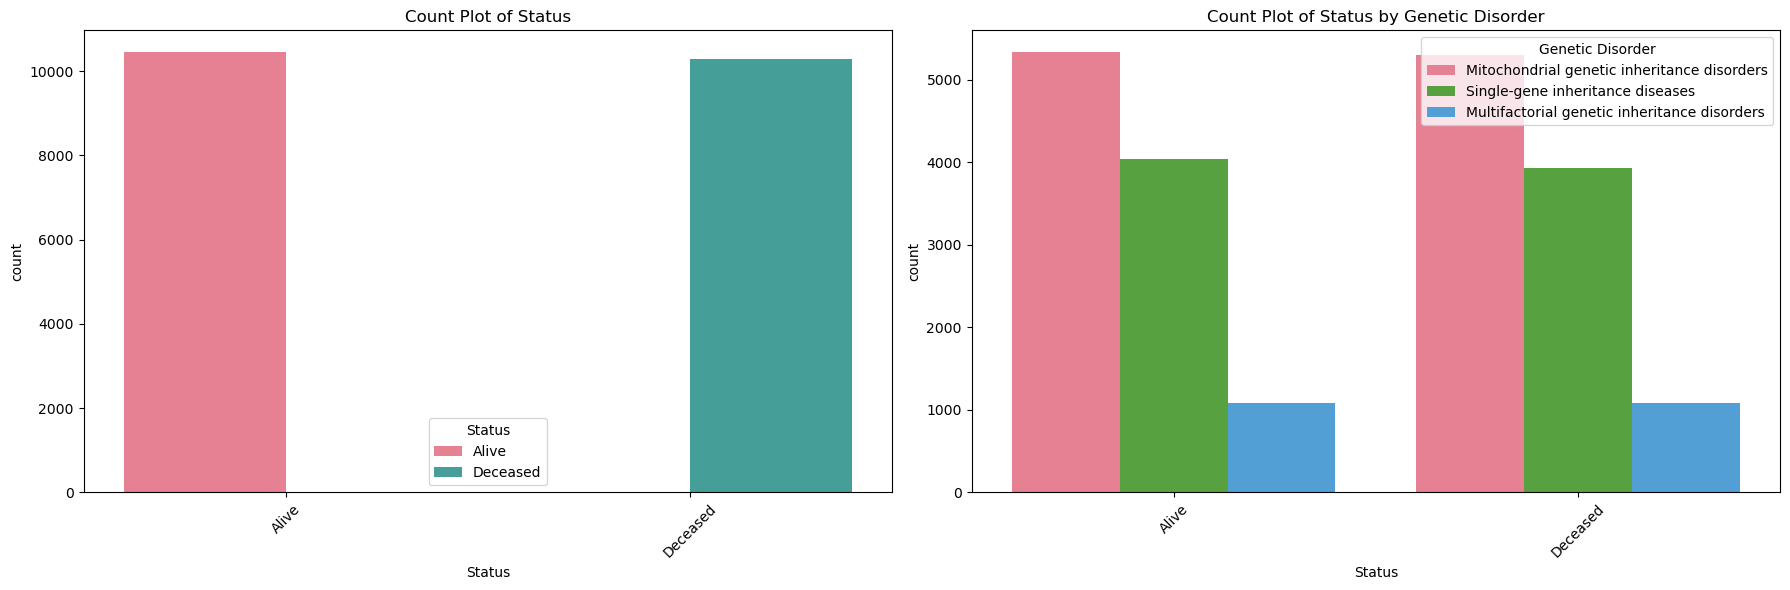

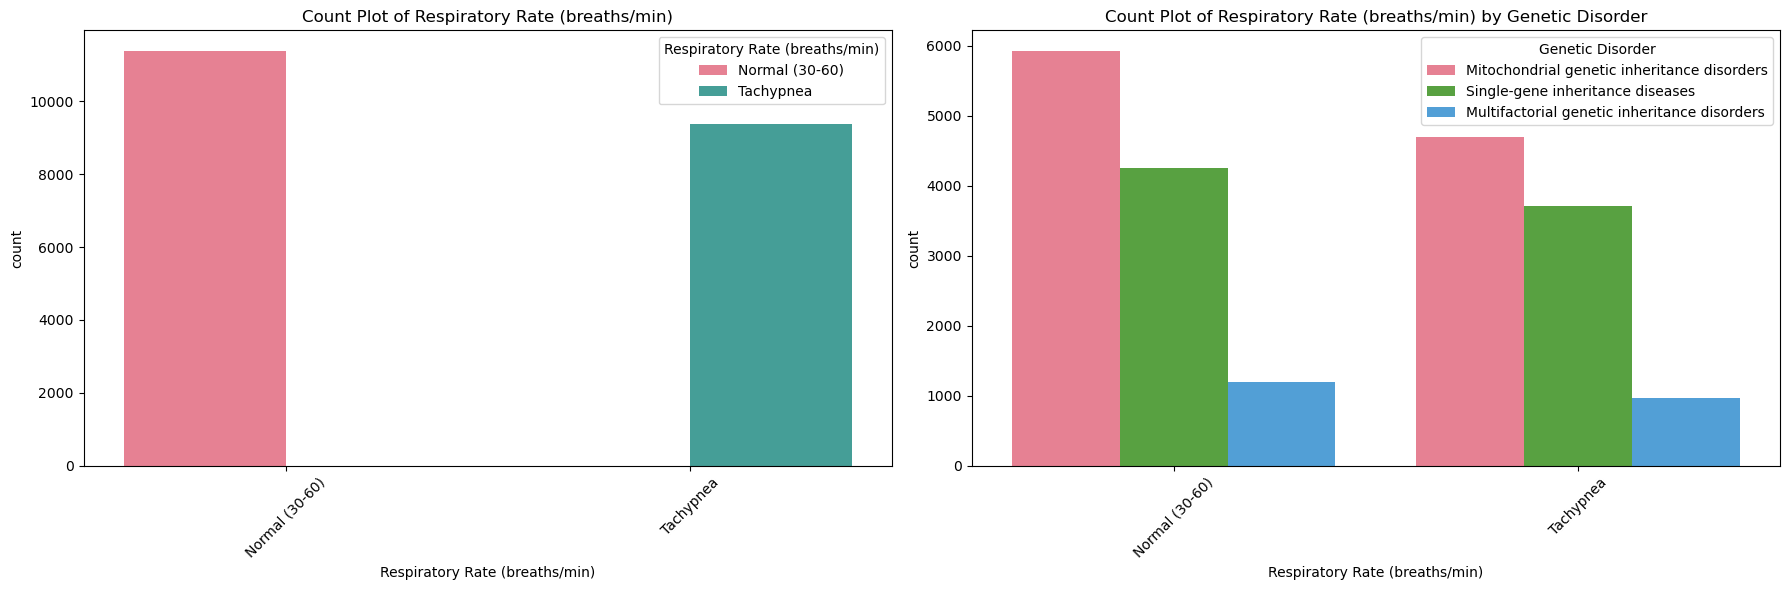

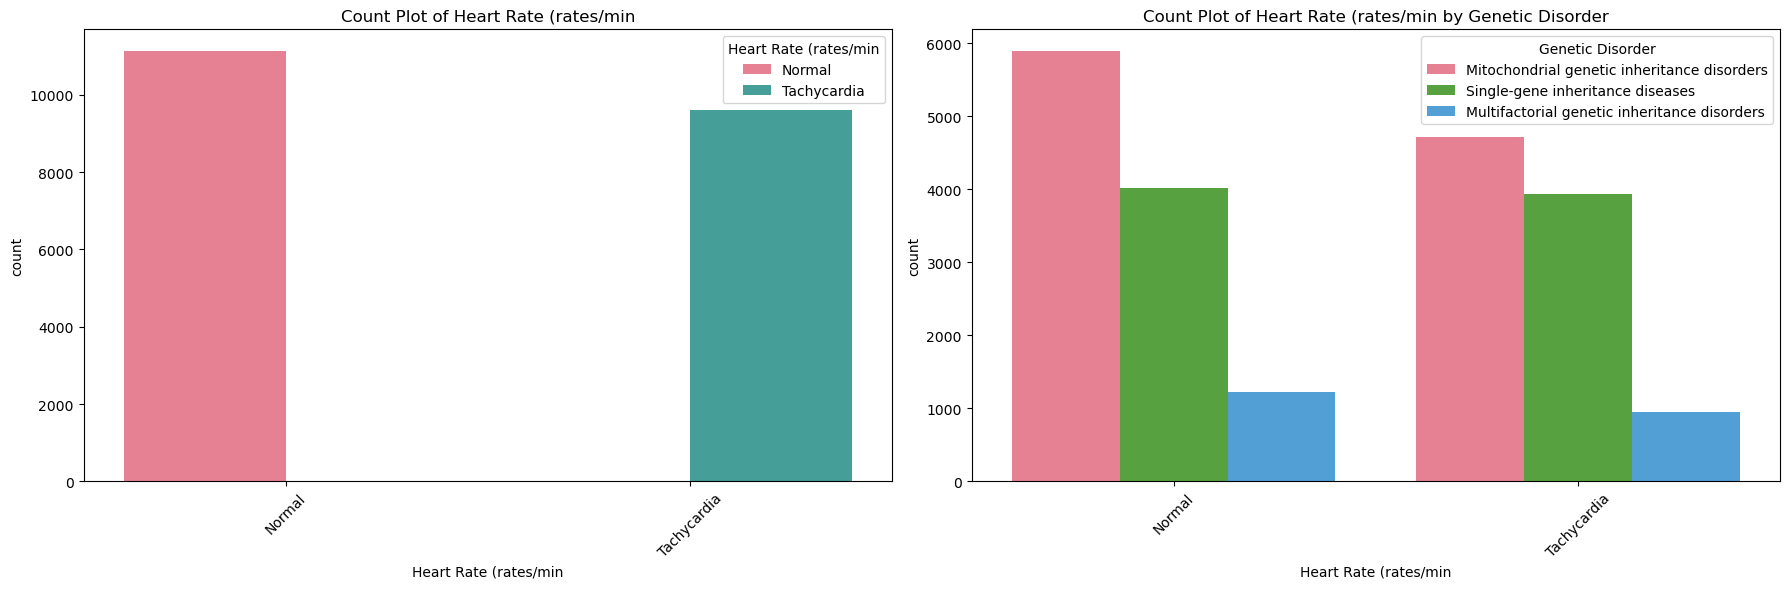

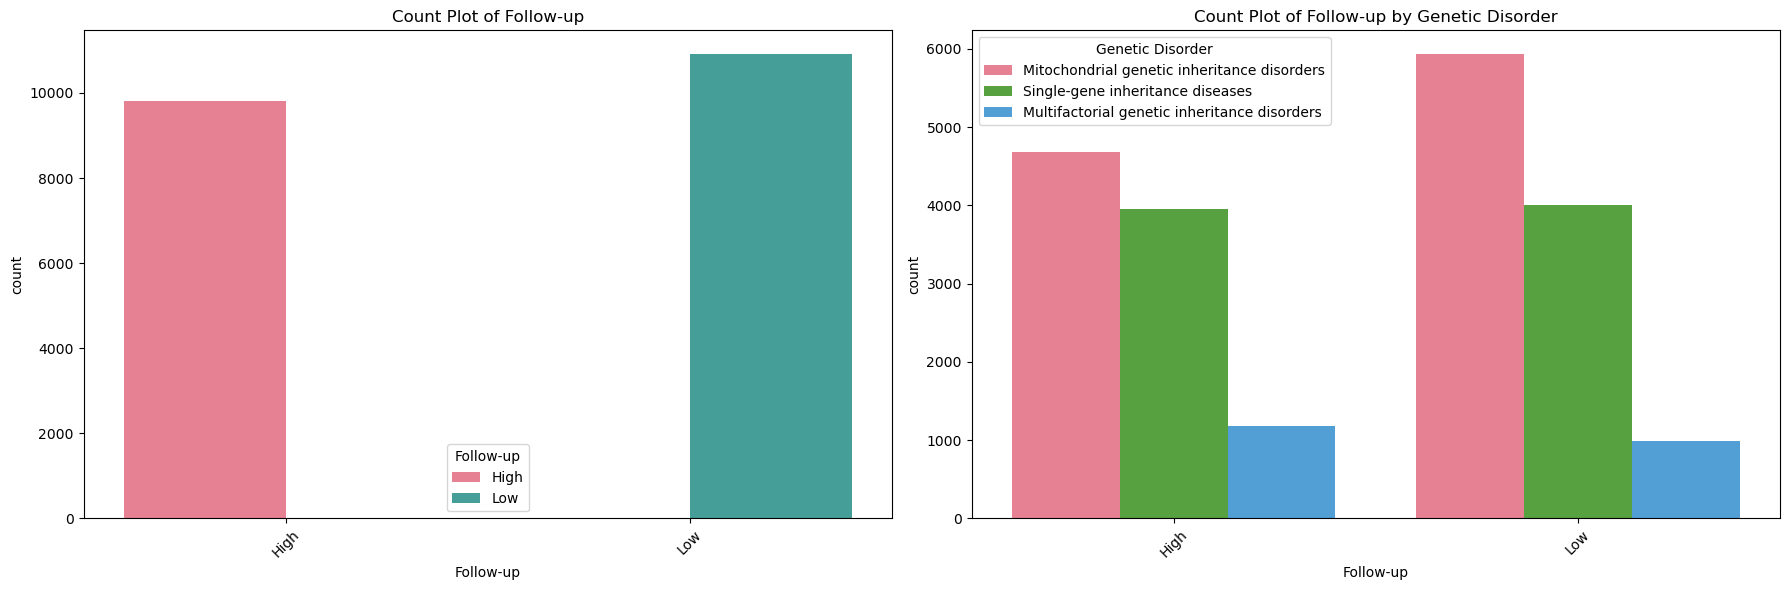

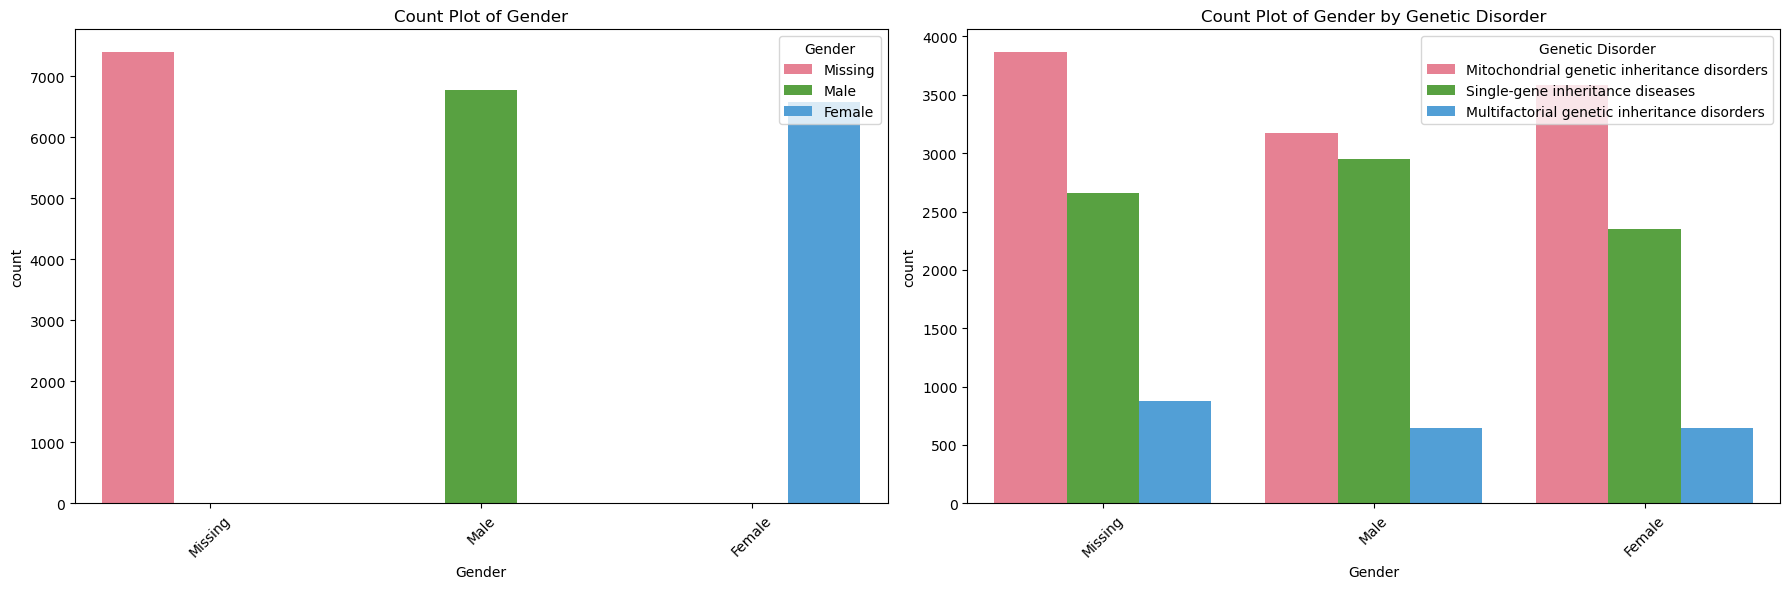

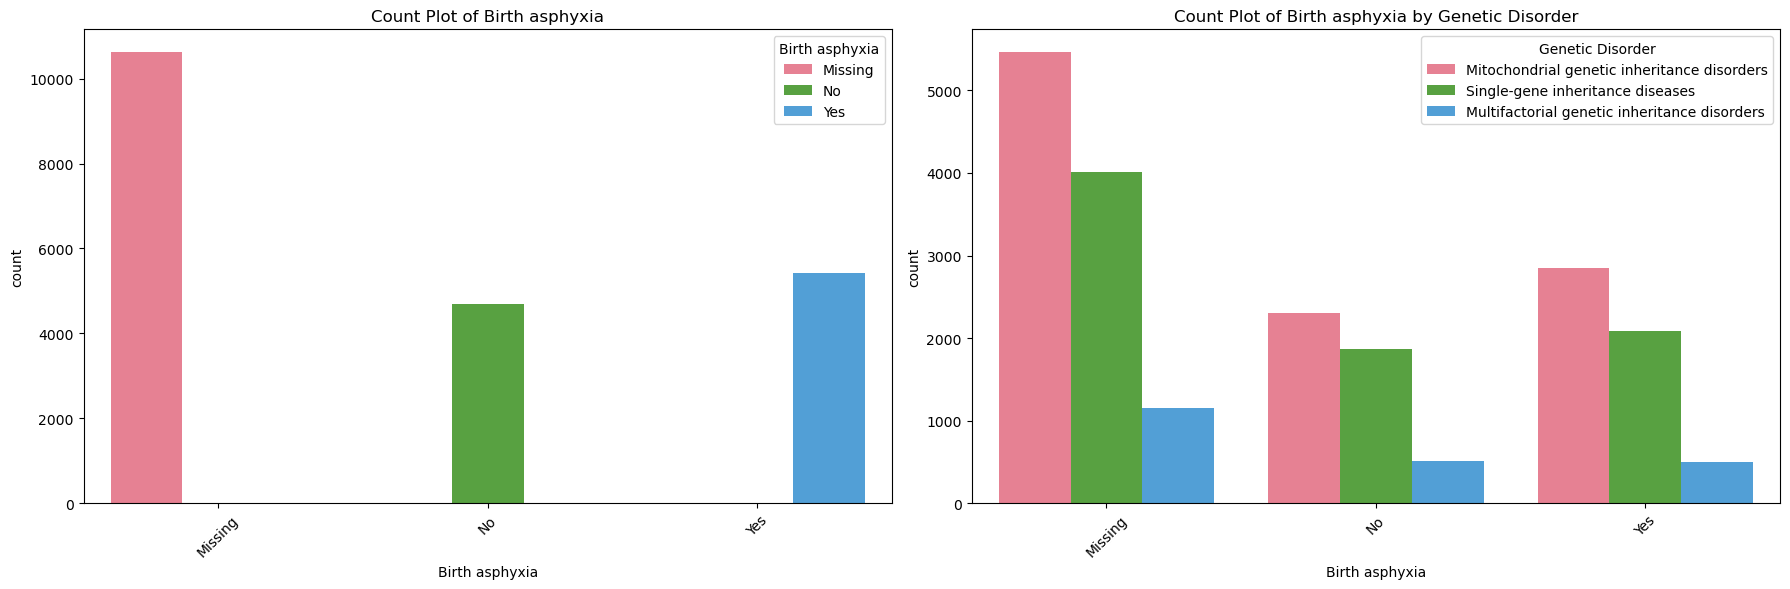

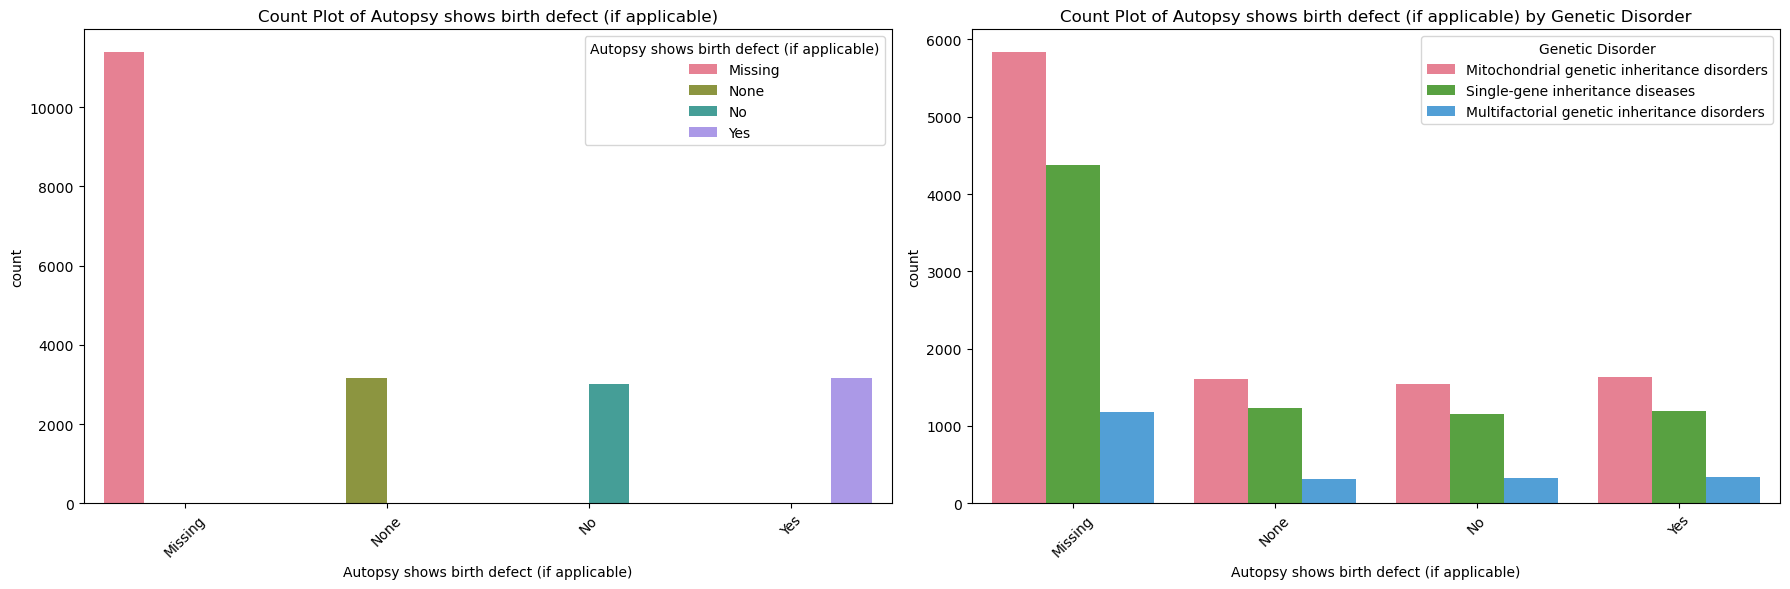

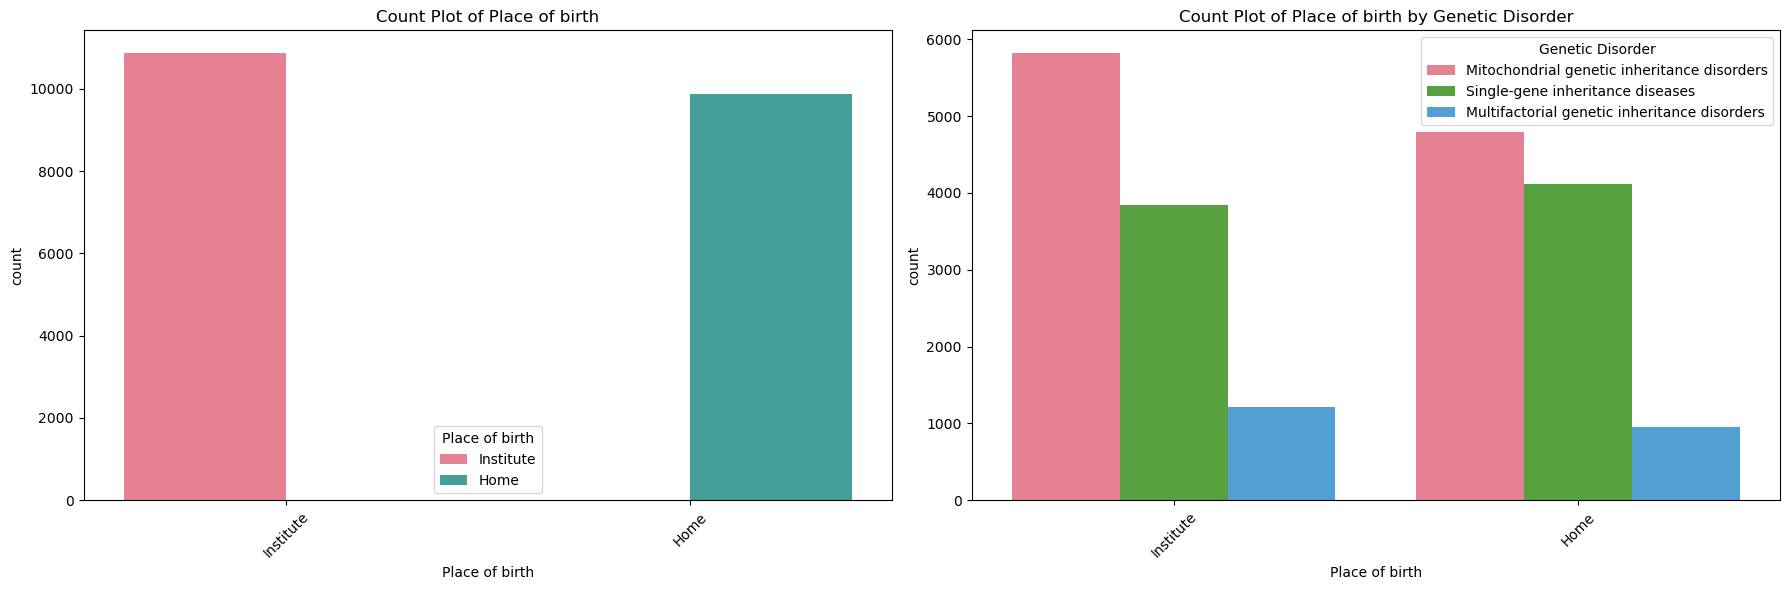

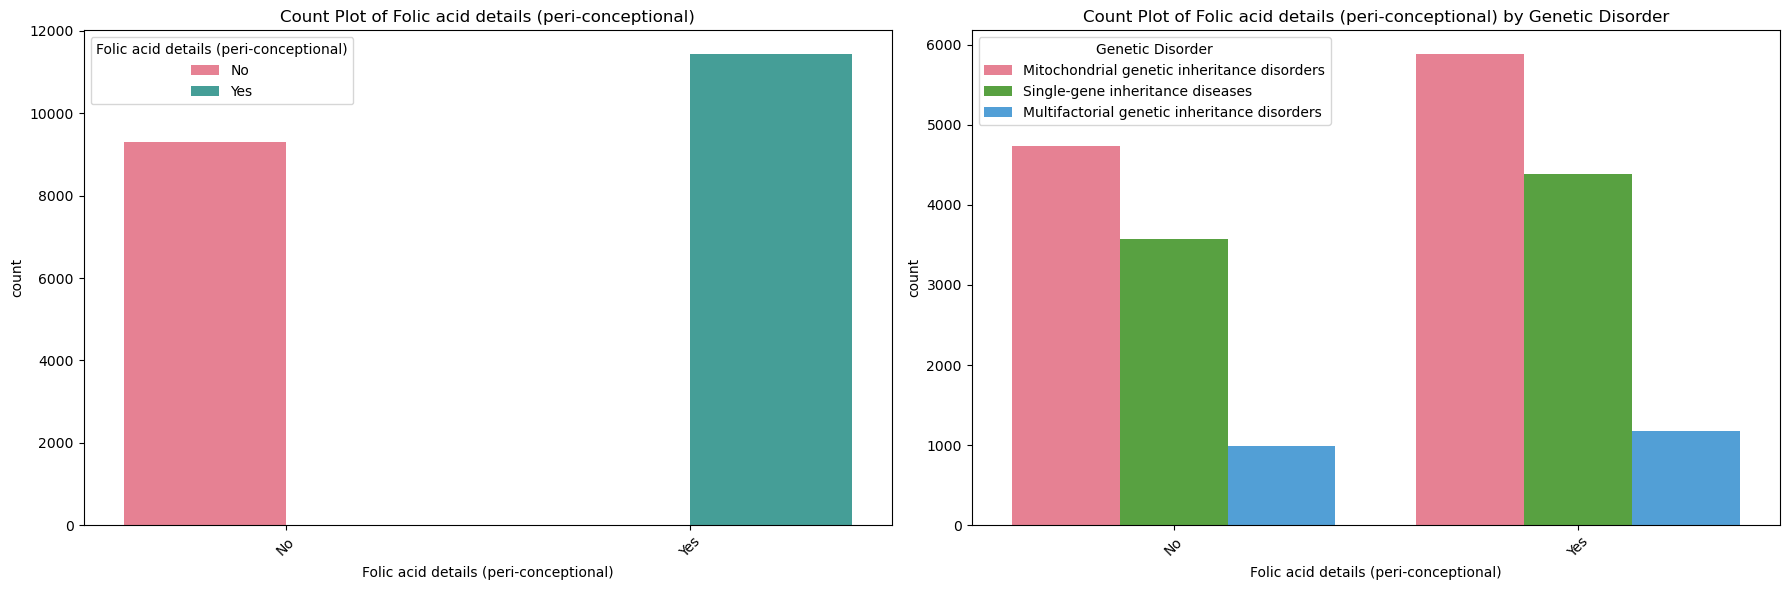

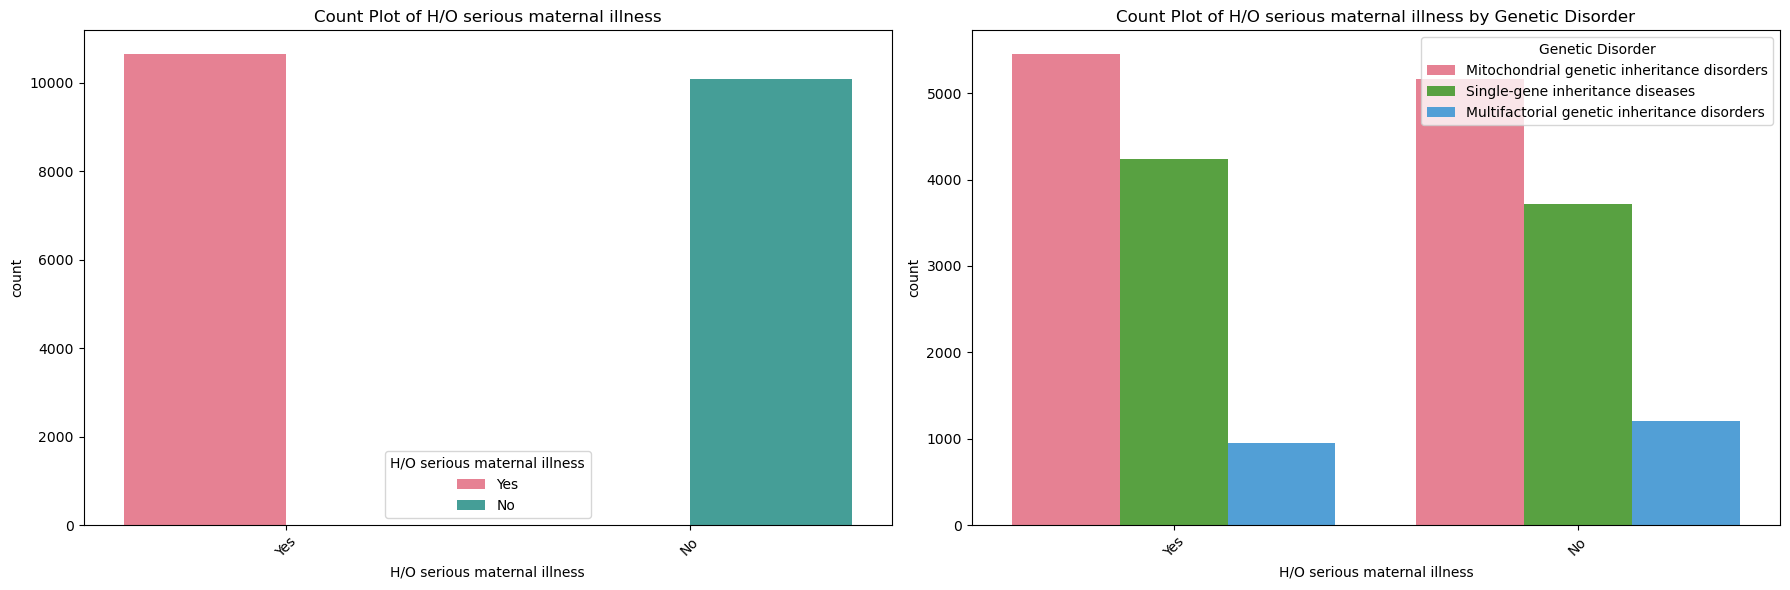

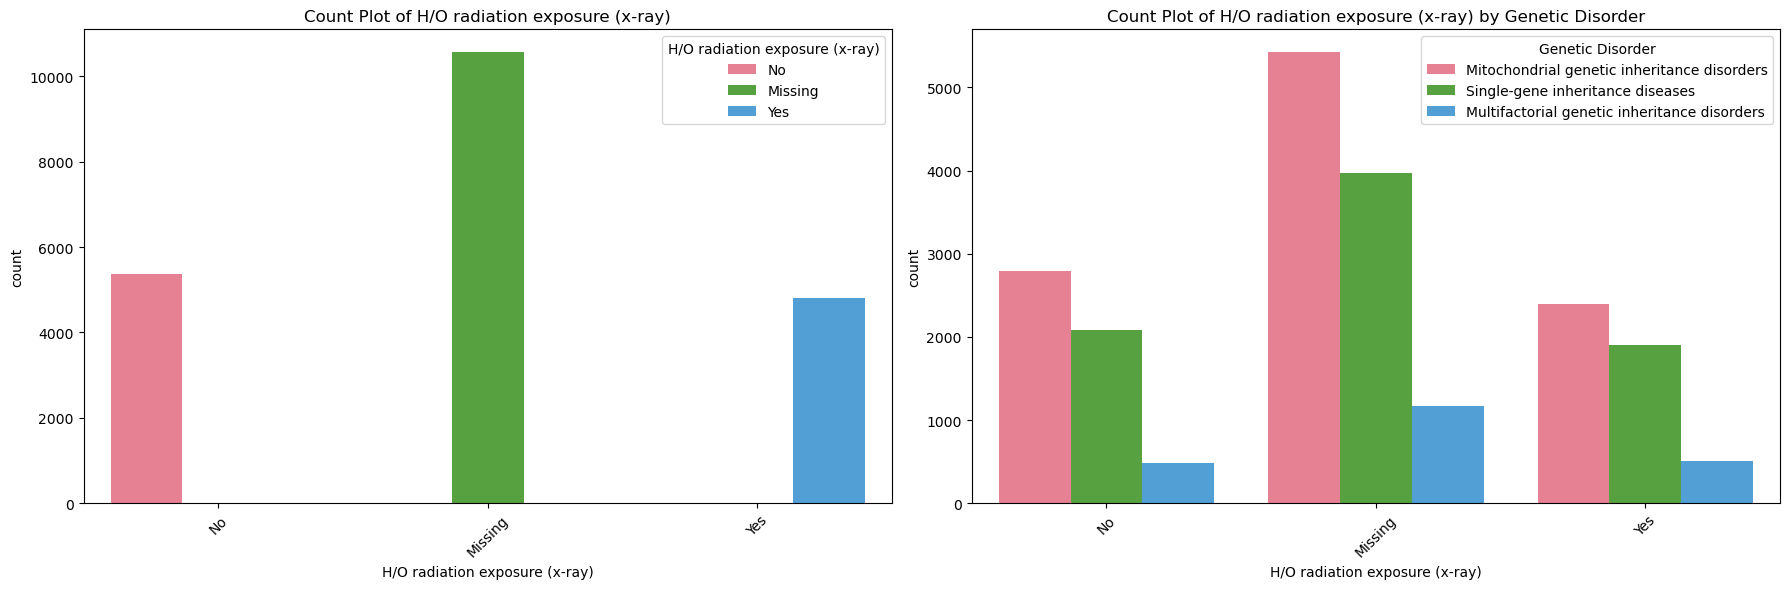

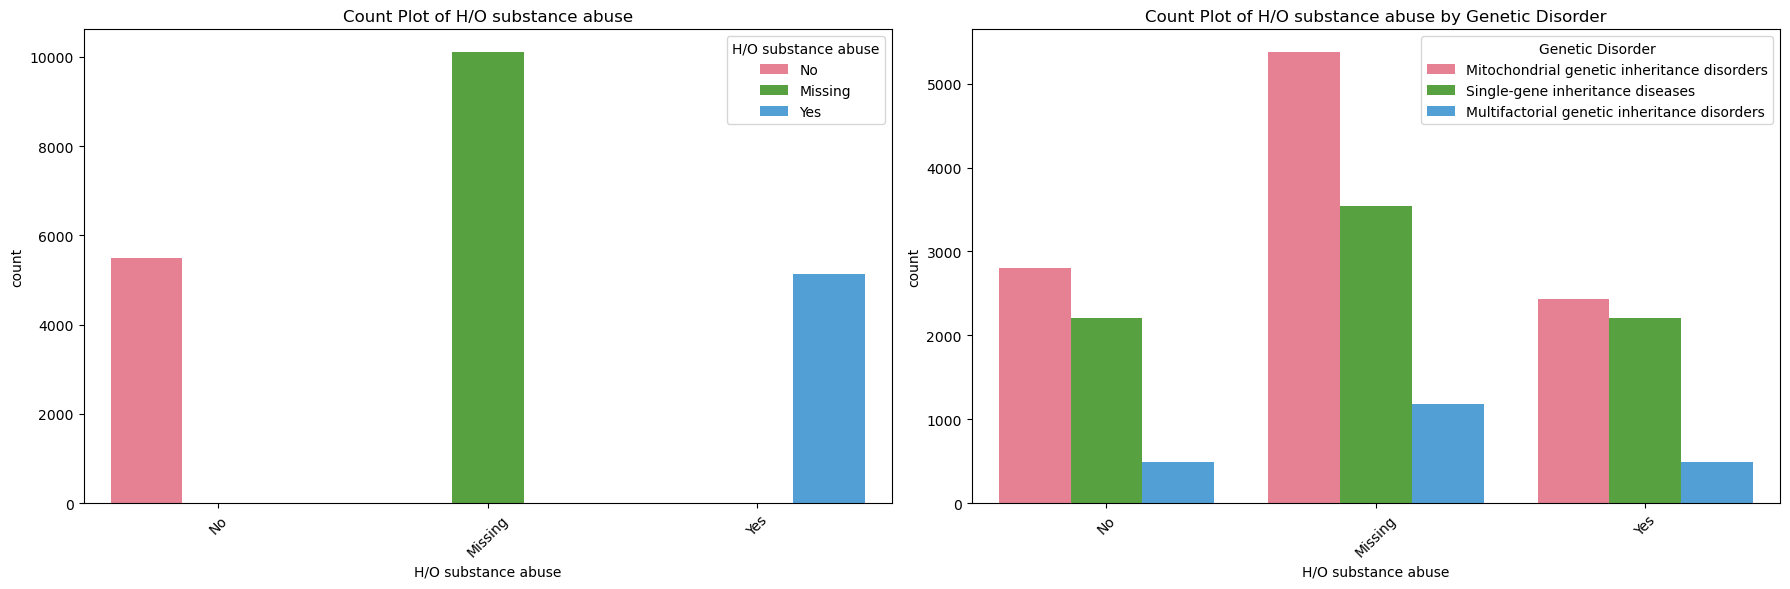

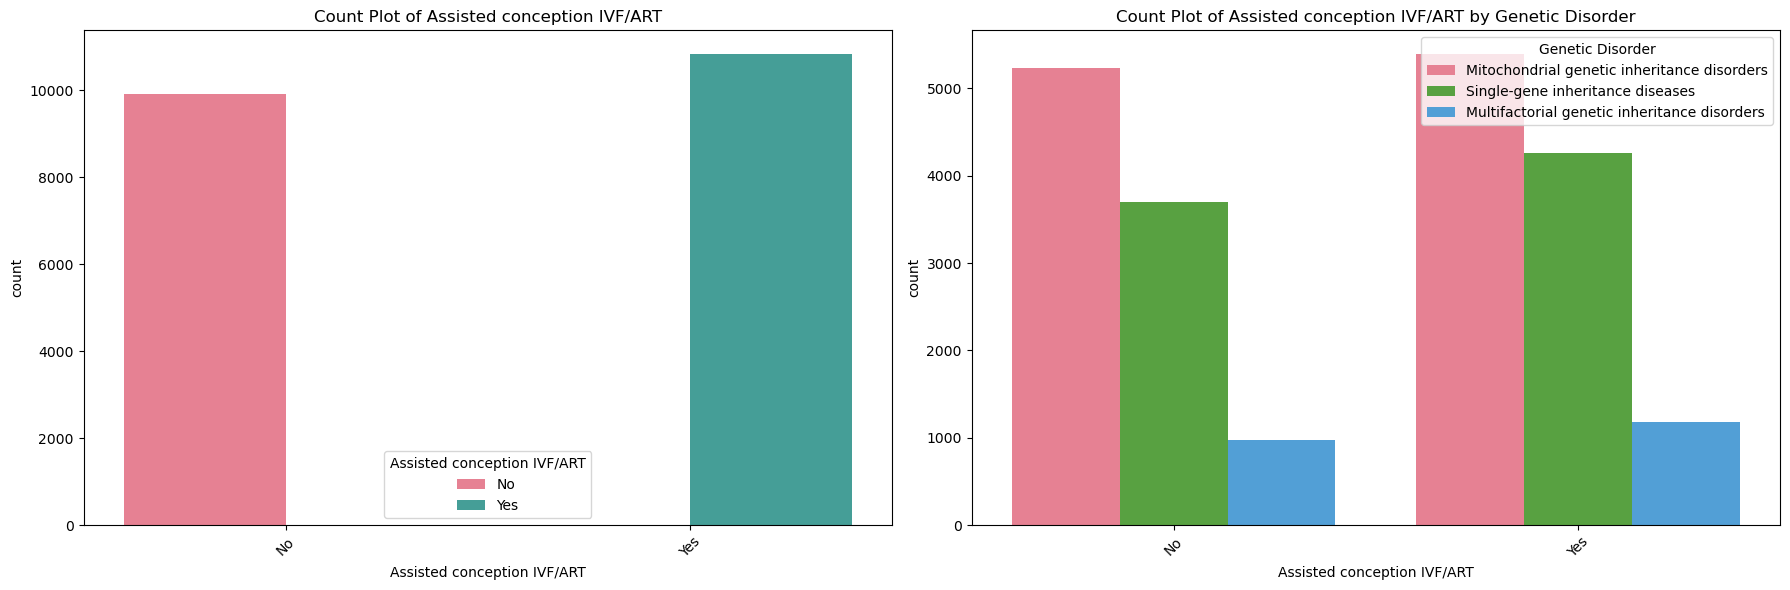

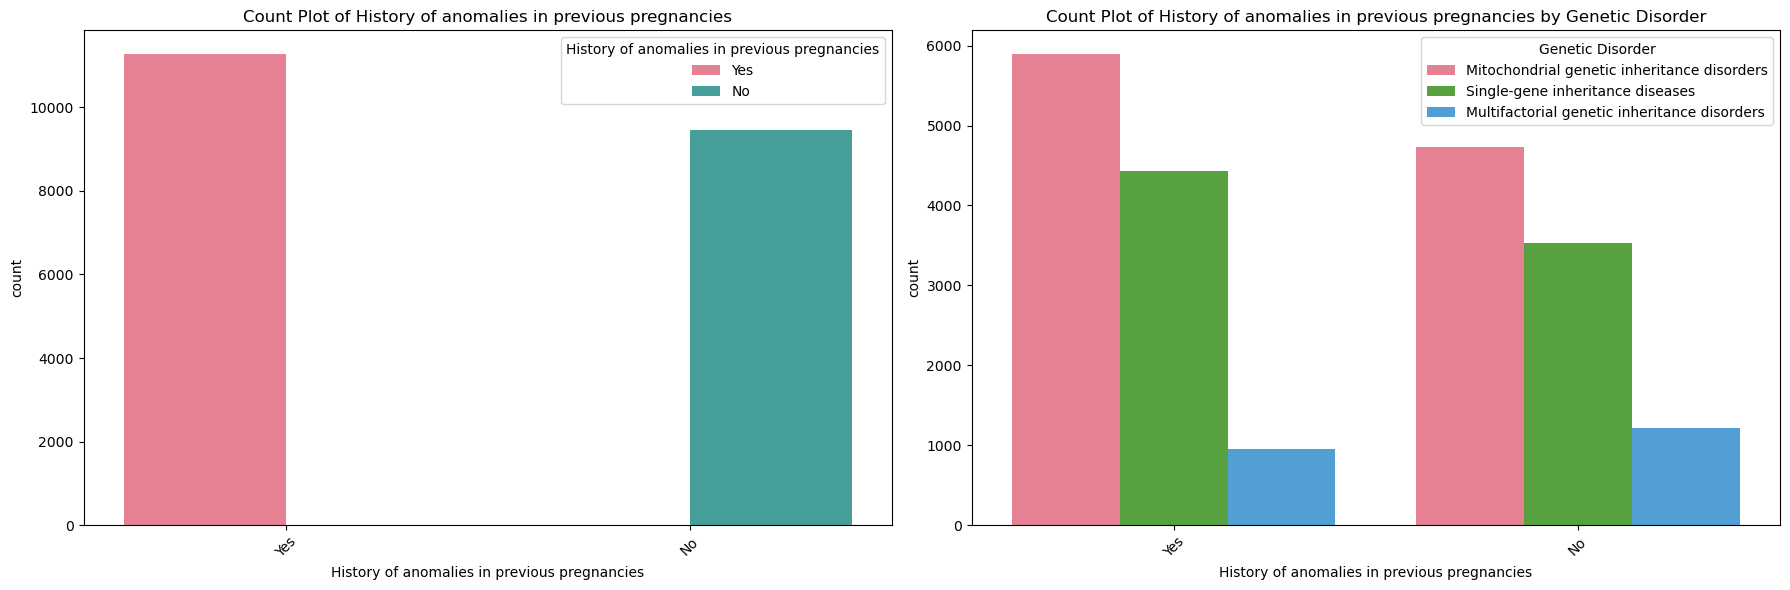

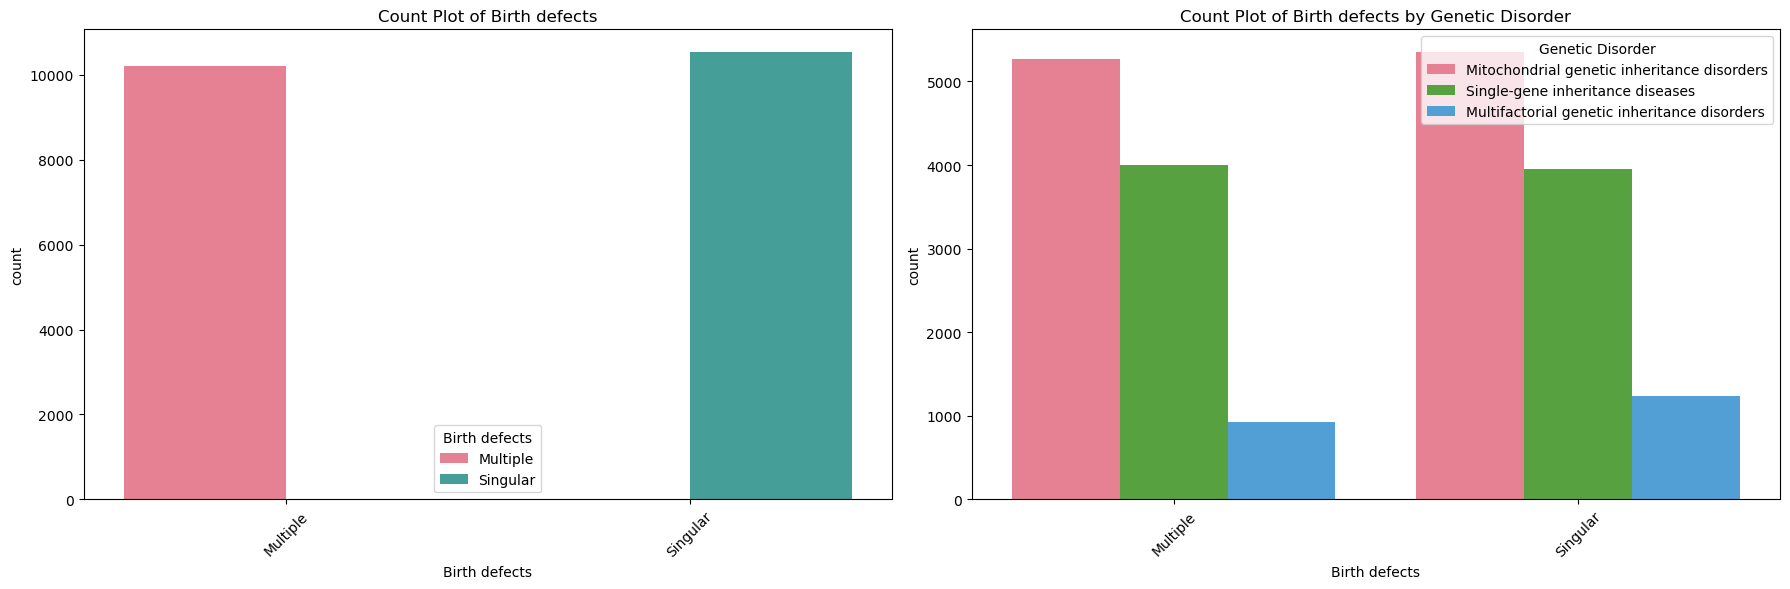

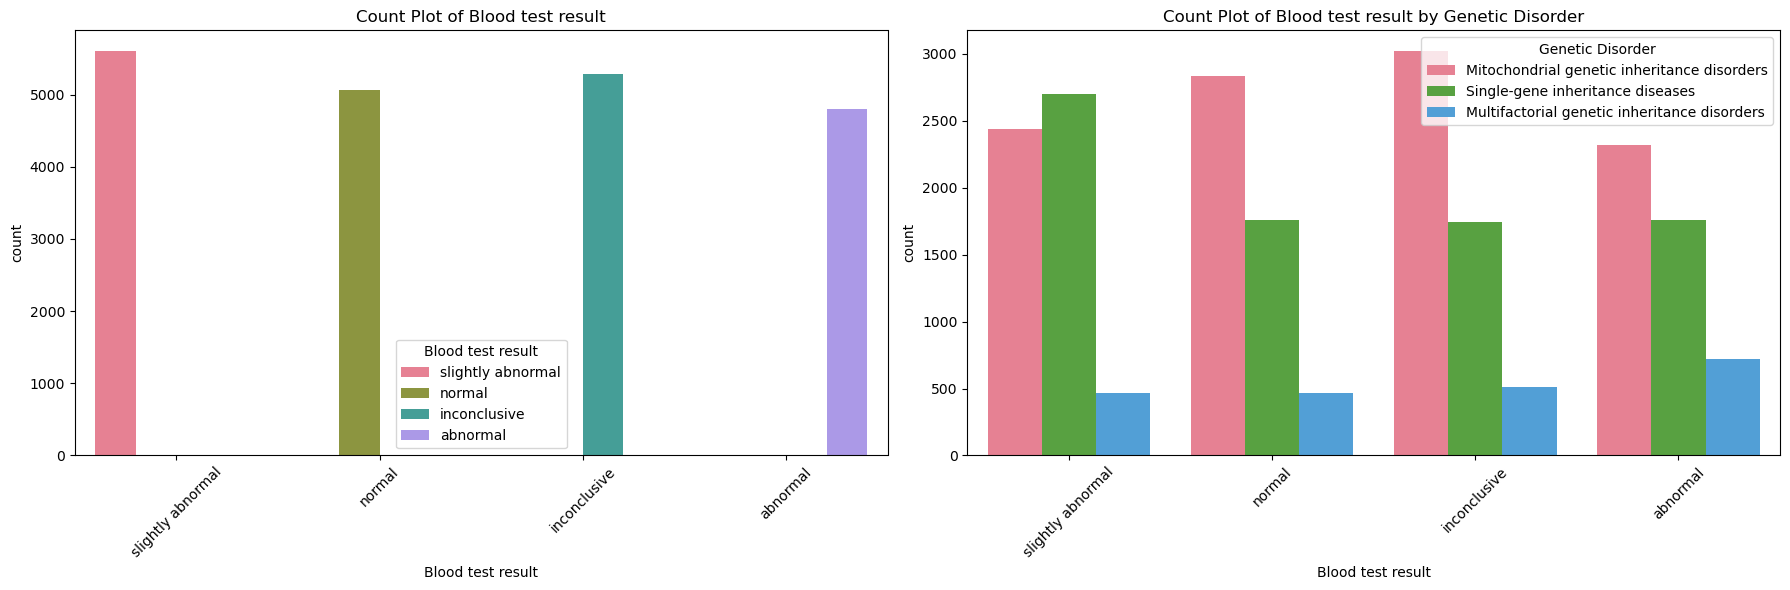

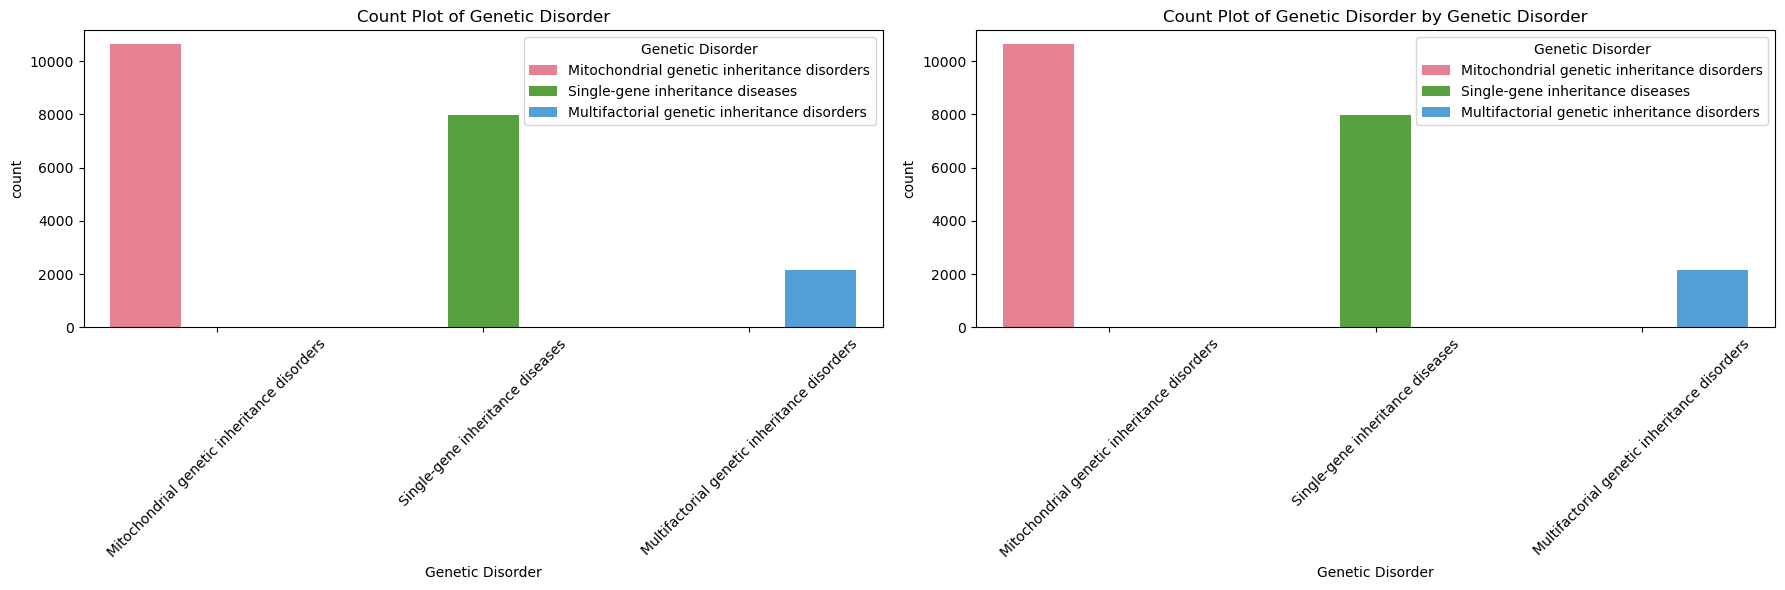

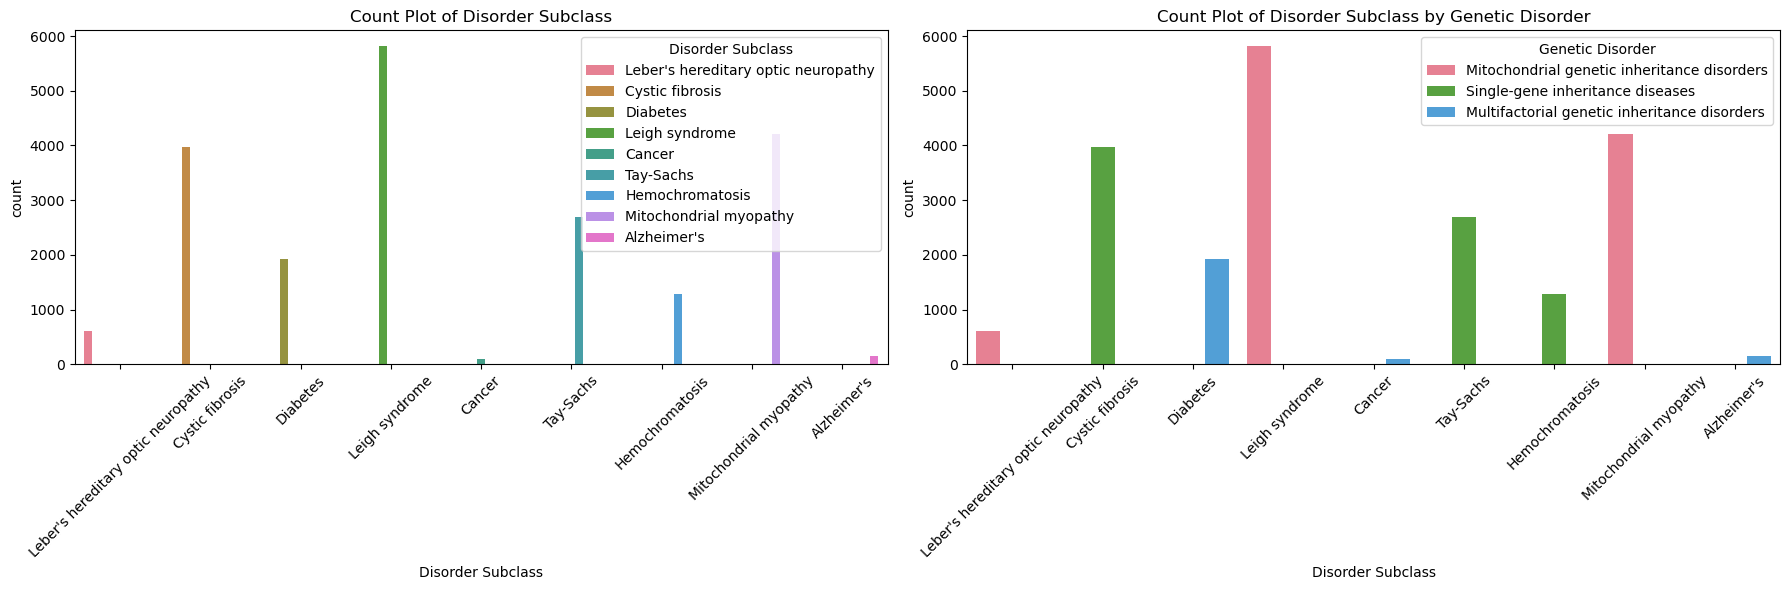

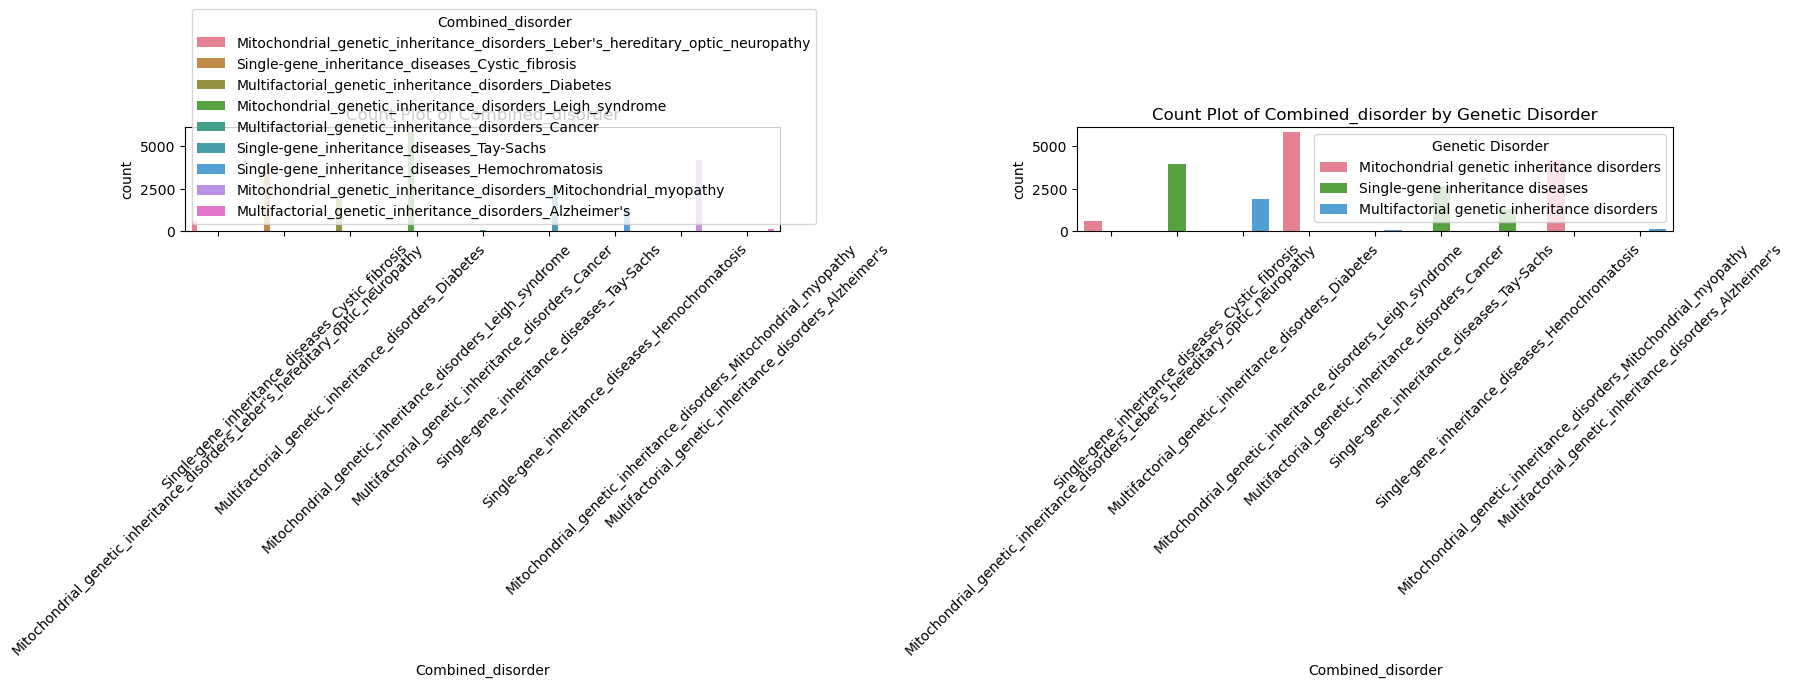

In [30]:
for feature in categorical_cols:

    # Determine the number of unique values in the hue feature
    num_unique_hue = df_train[feature].nunique()
    num_unique_target = df_train['Genetic Disorder'].nunique()

    custom_colors = sns.color_palette("husl", n_colors=num_unique_hue)  # Or any other palette with sufficient colors

    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature}')

    plt.xticks(rotation=45)
    custom_colors = sns.color_palette("husl", n_colors=num_unique_target)  # Or any other palette with sufficient colors

    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='Genetic Disorder', data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature} by Genetic Disorder')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

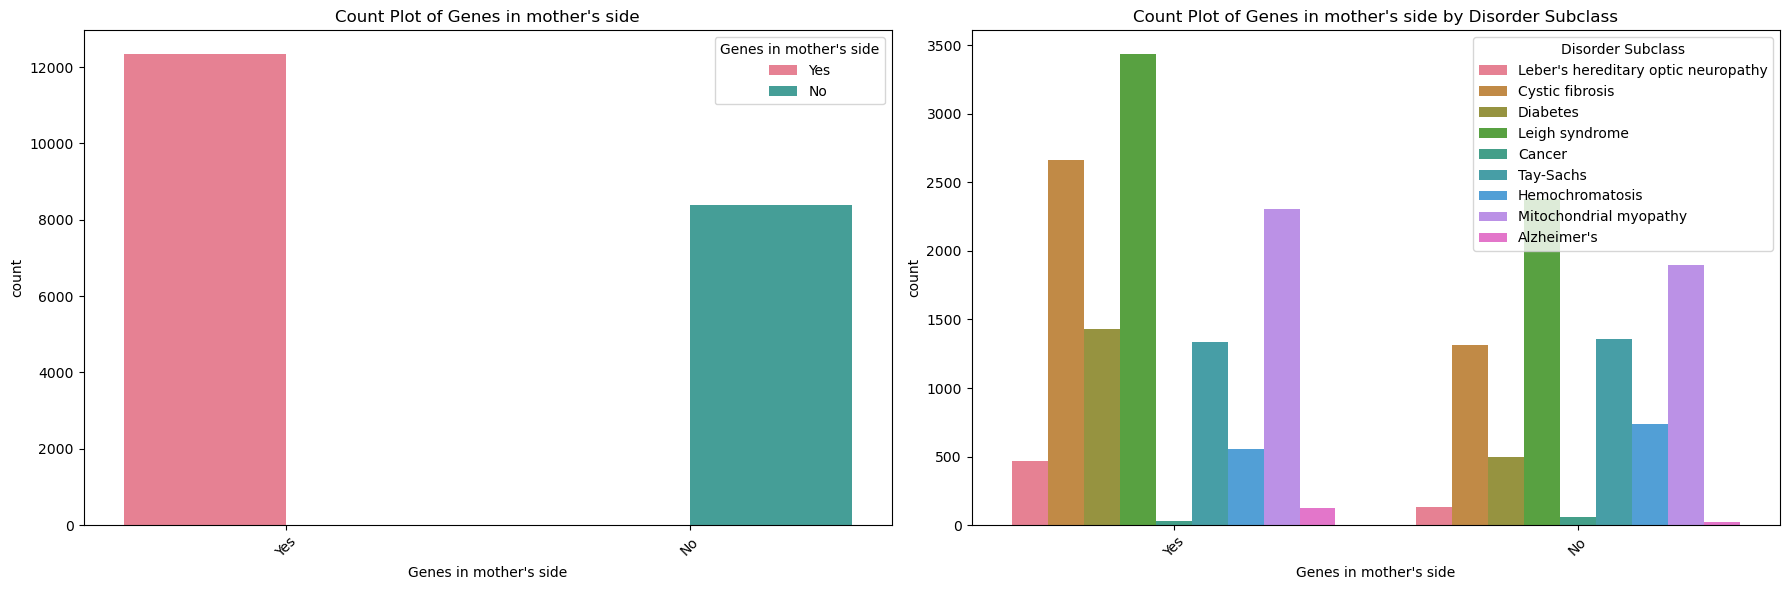

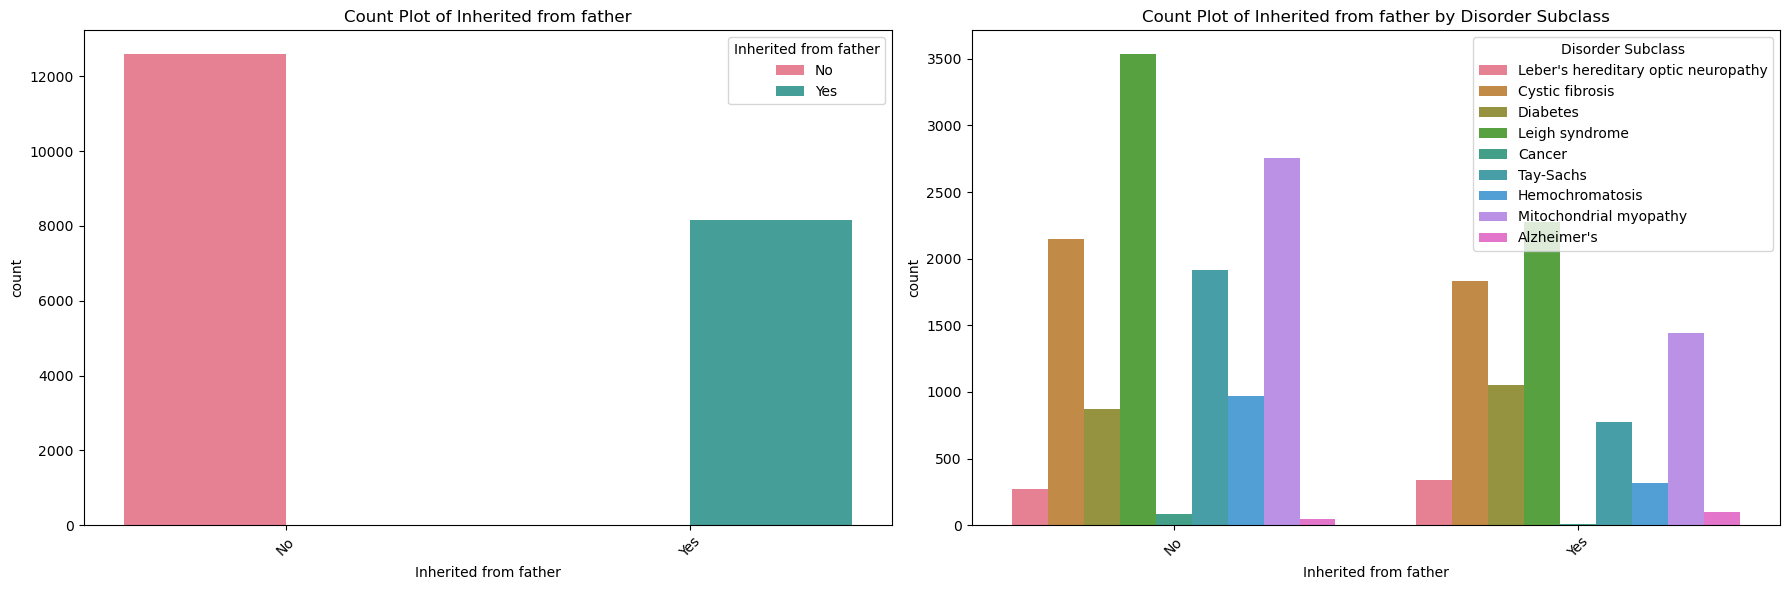

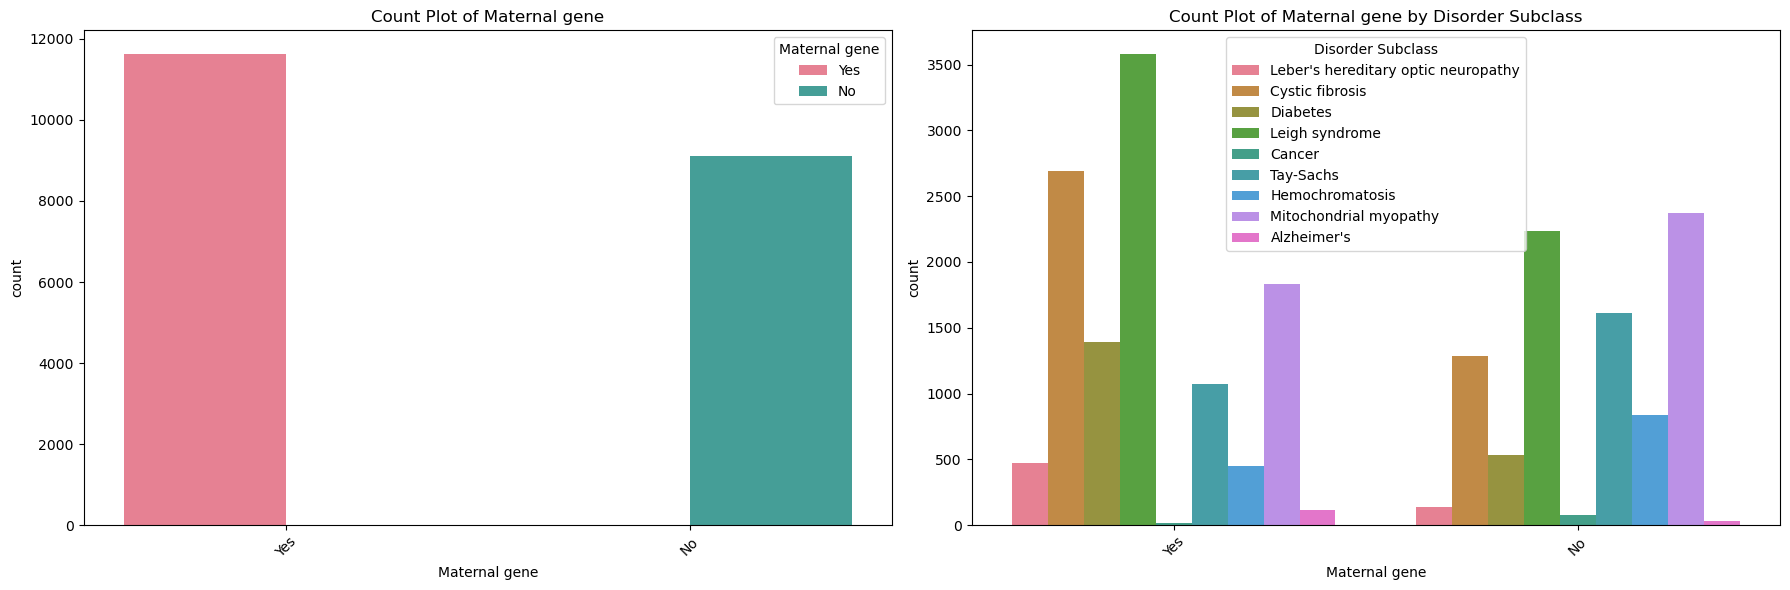

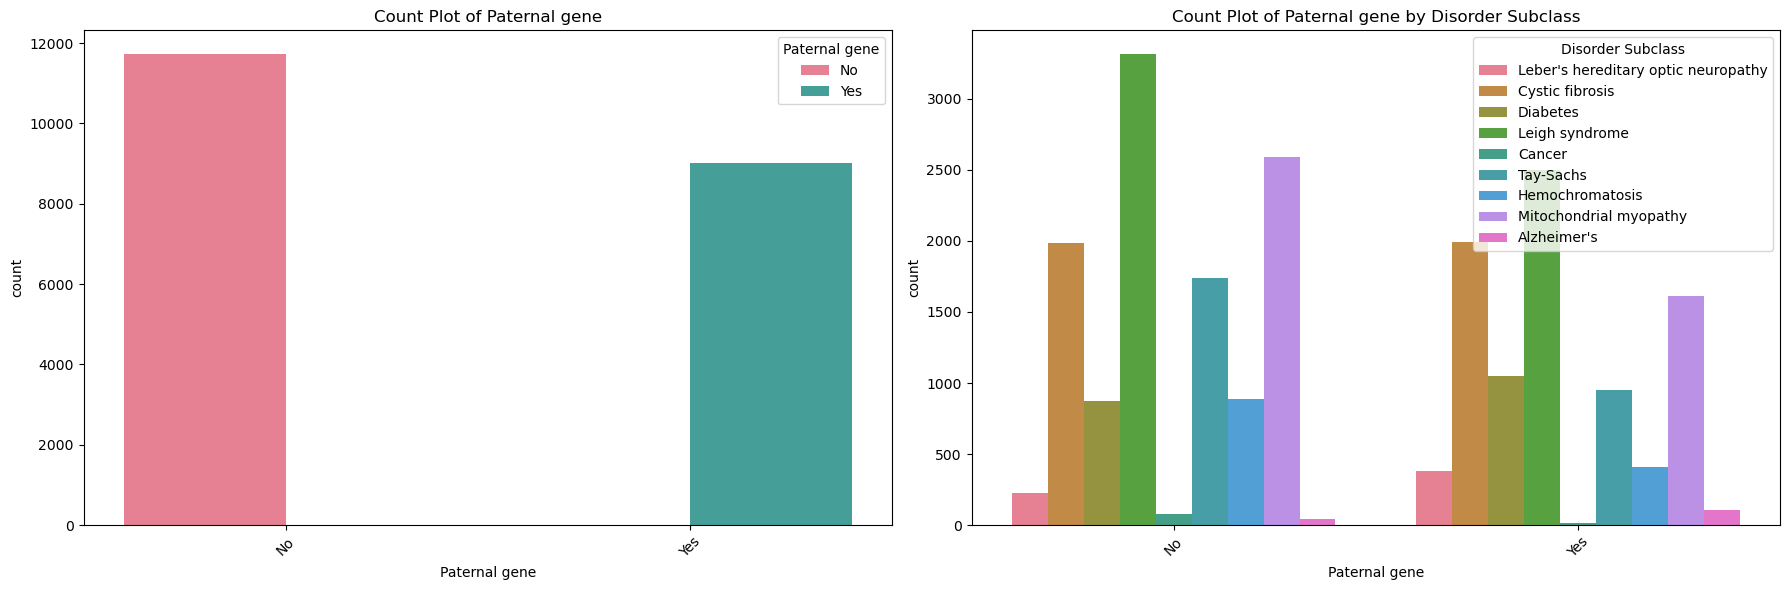

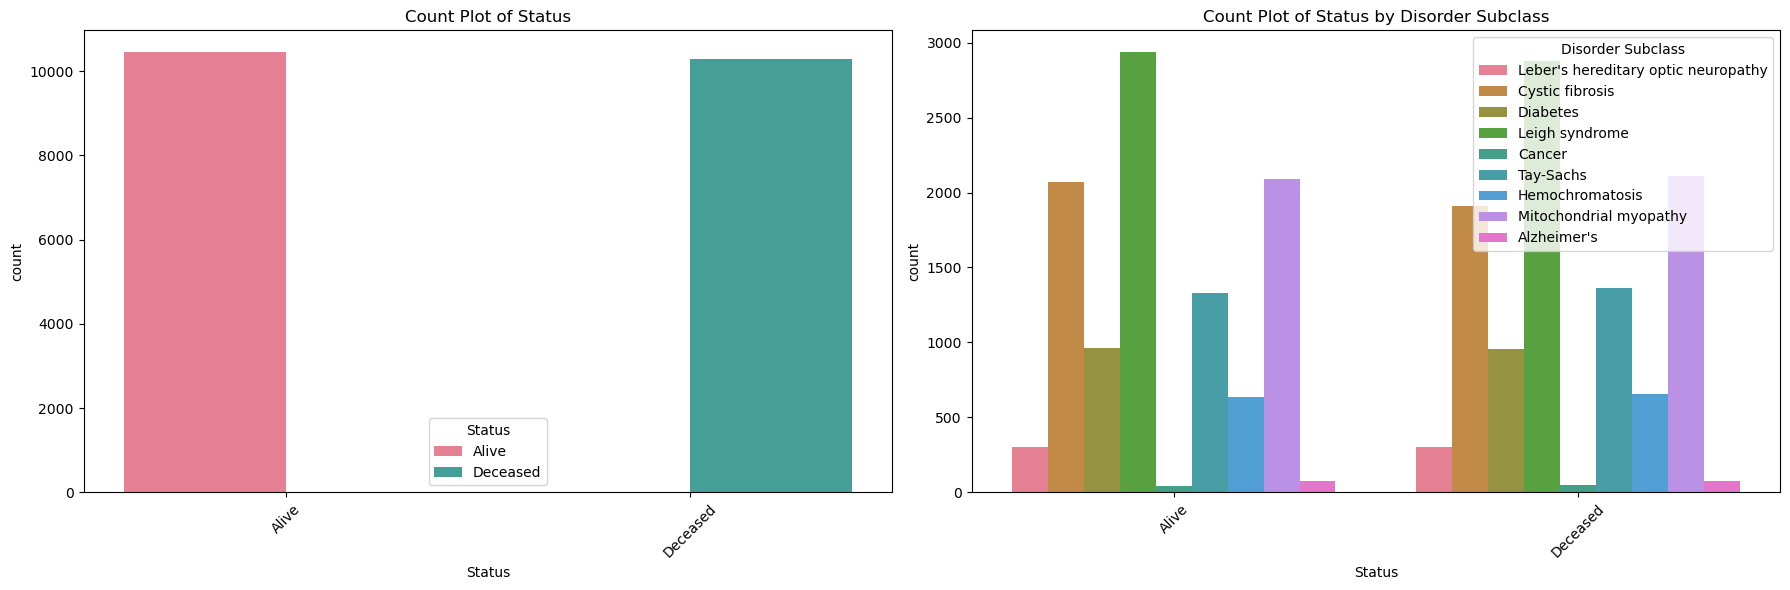

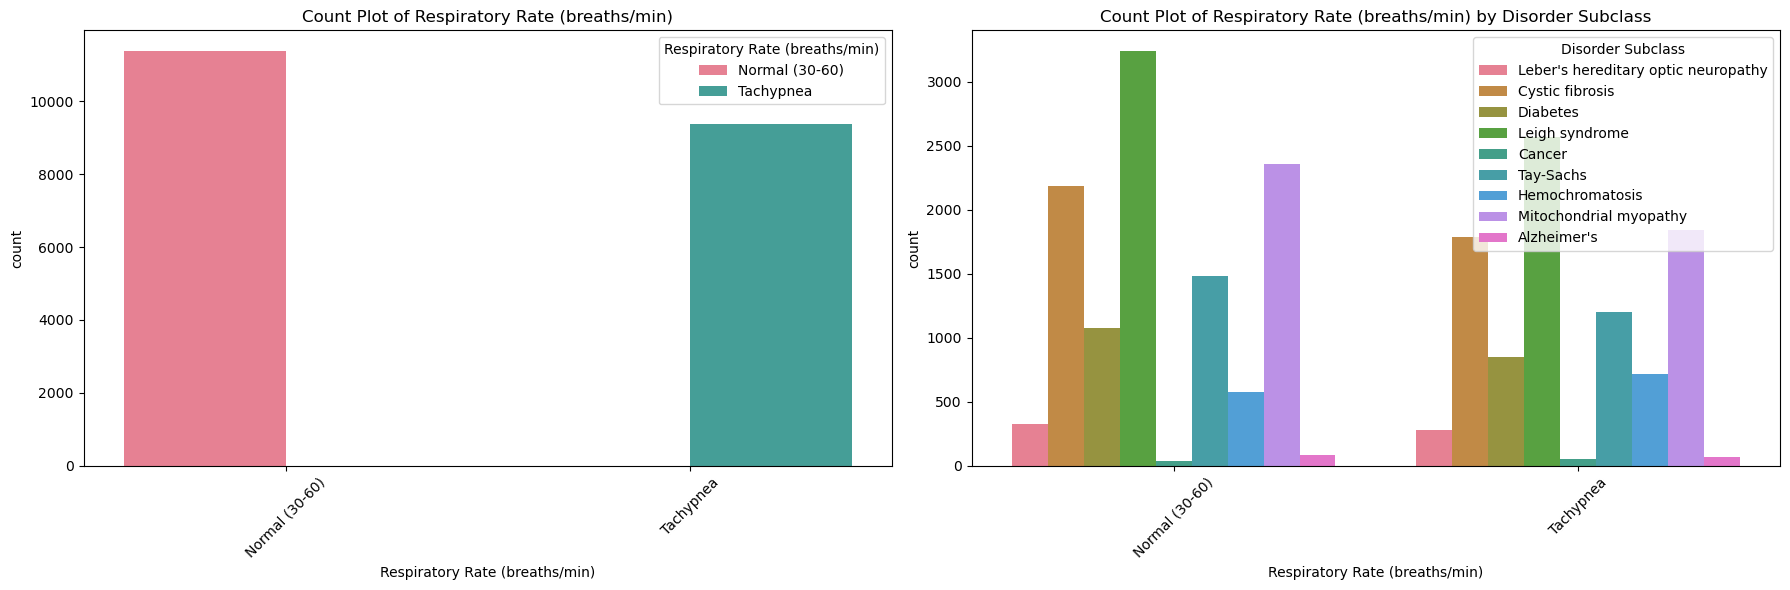

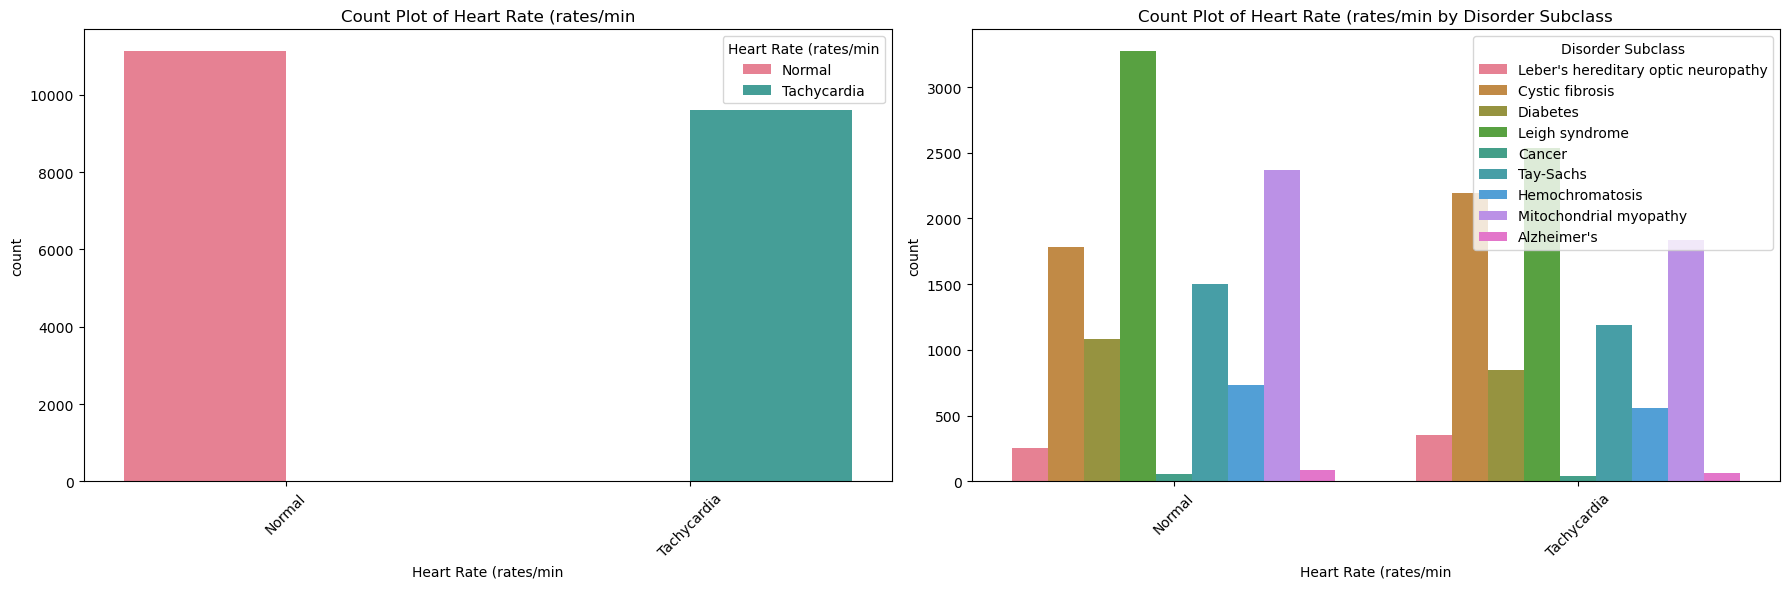

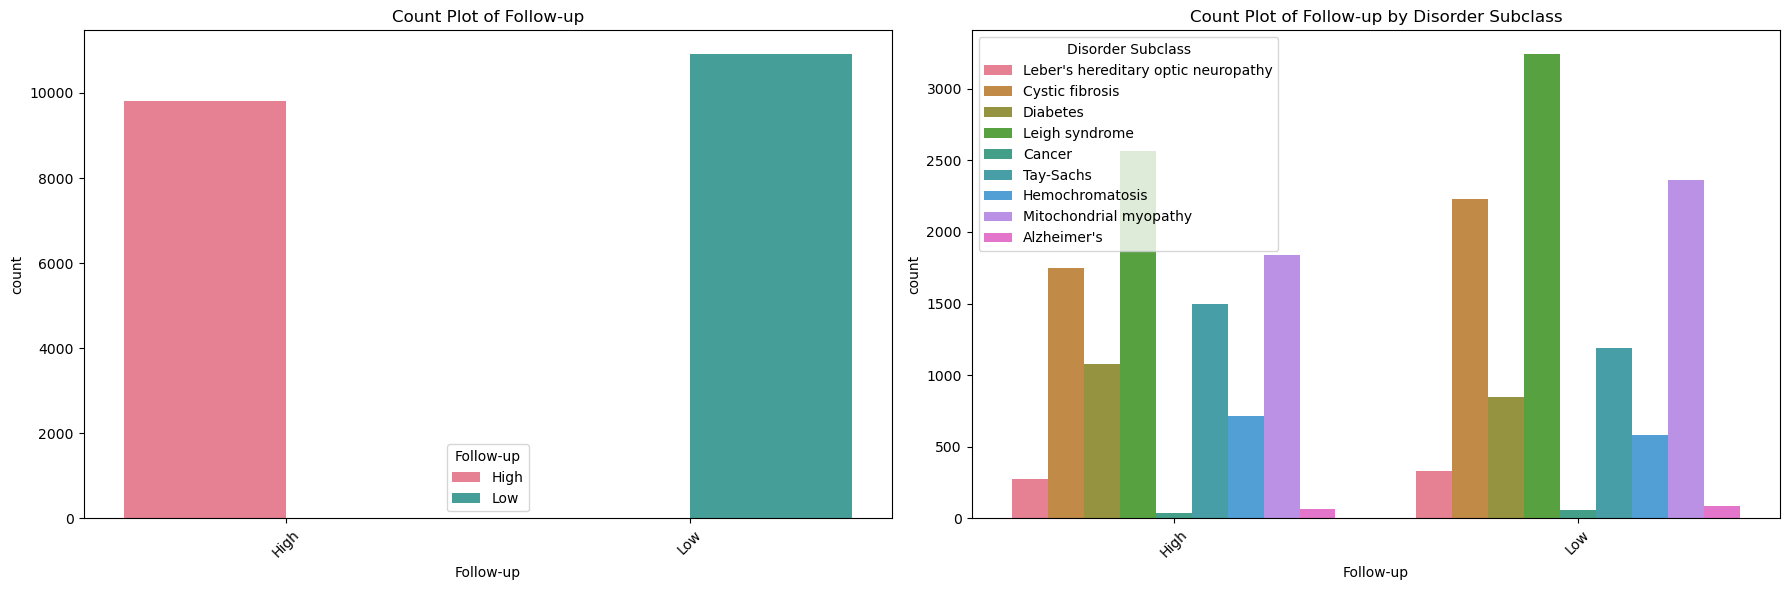

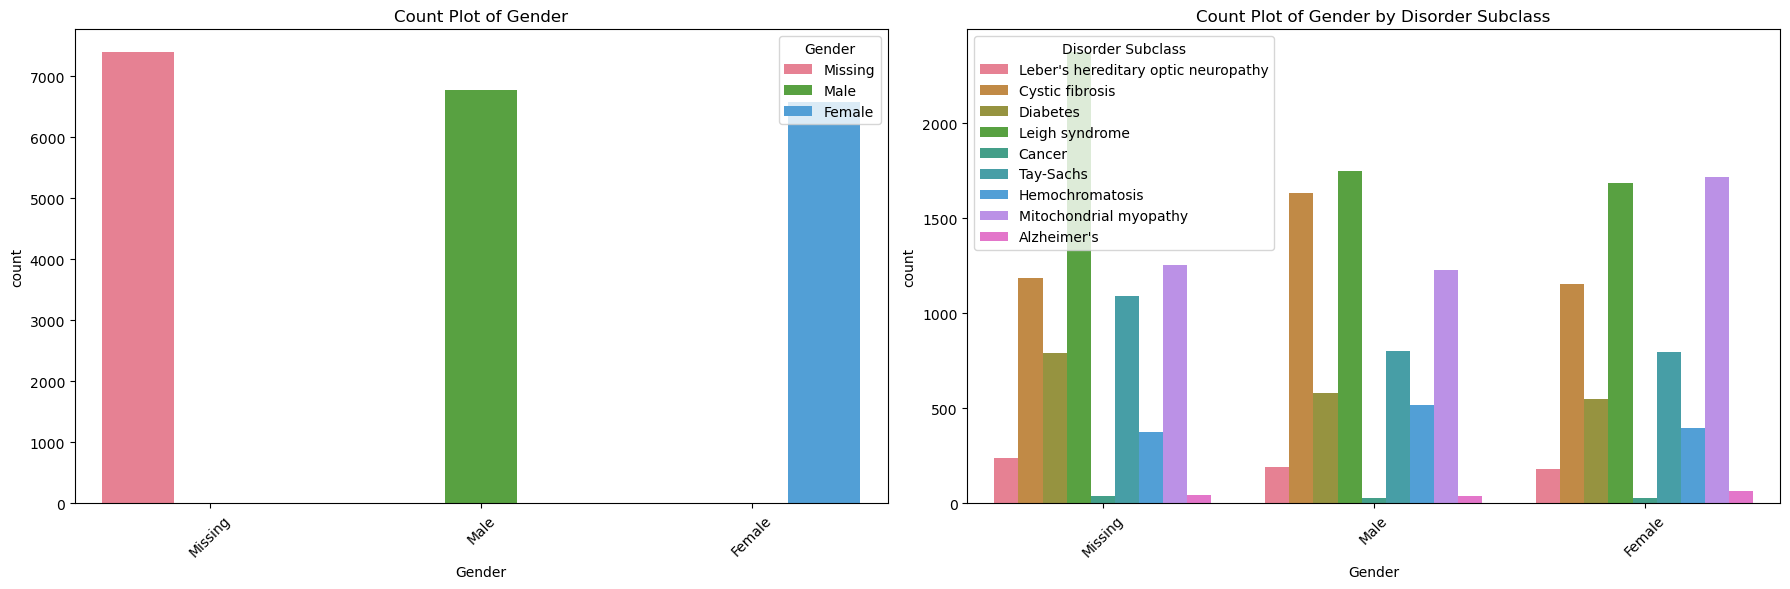

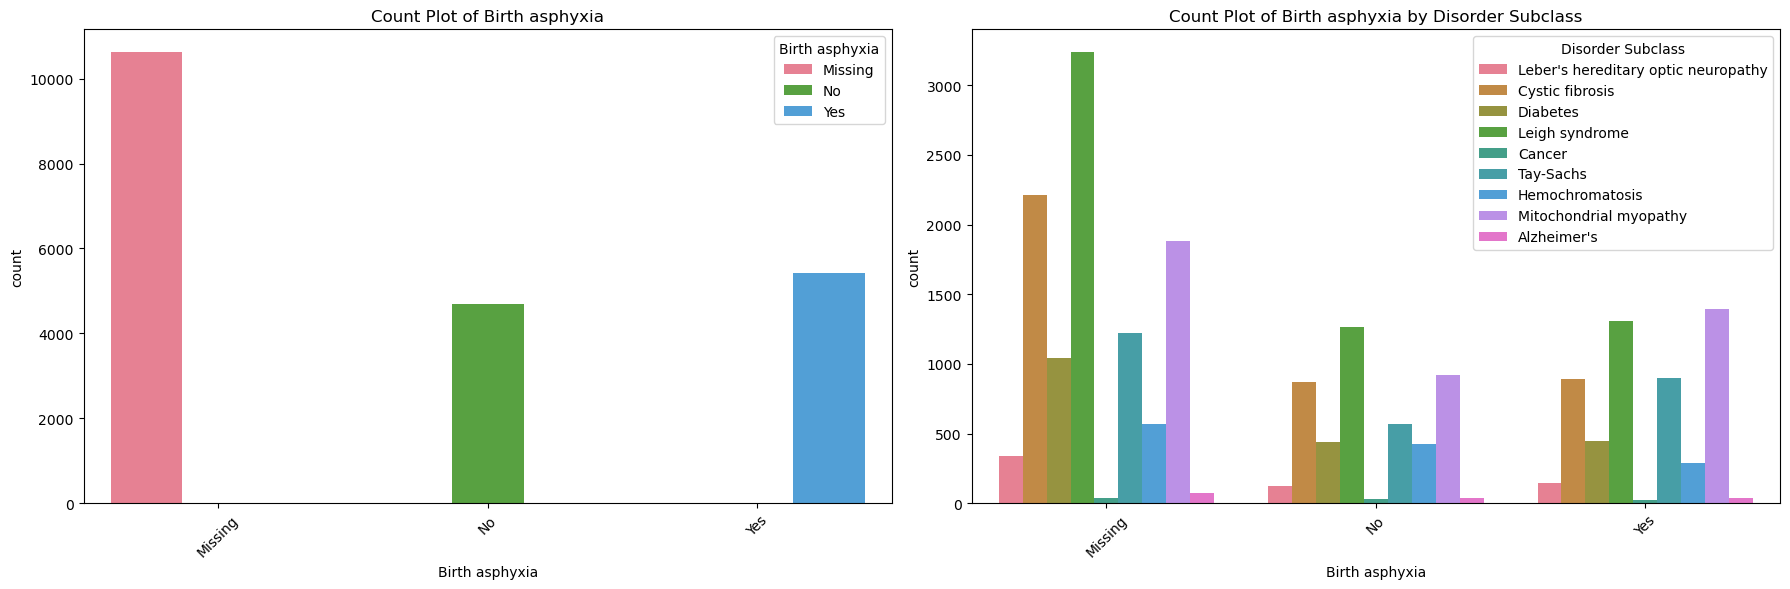

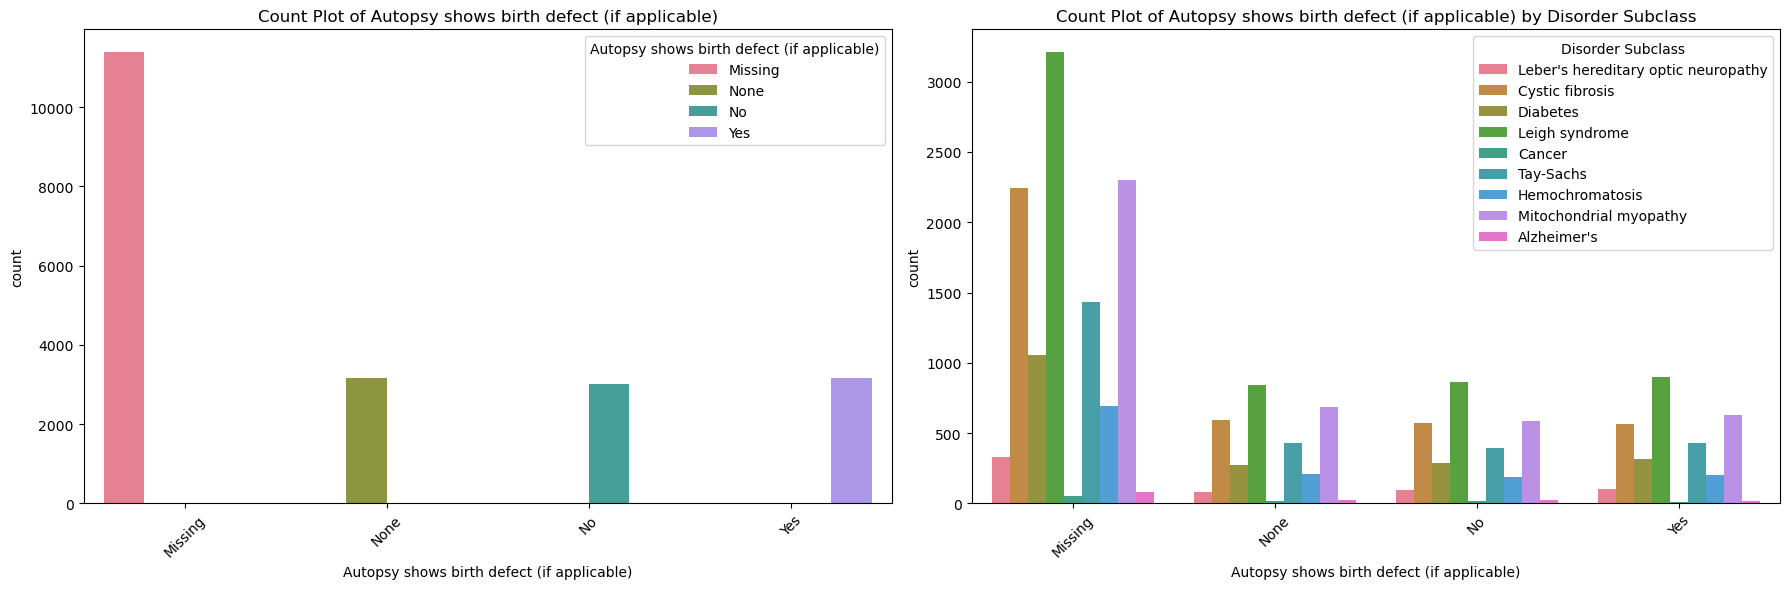

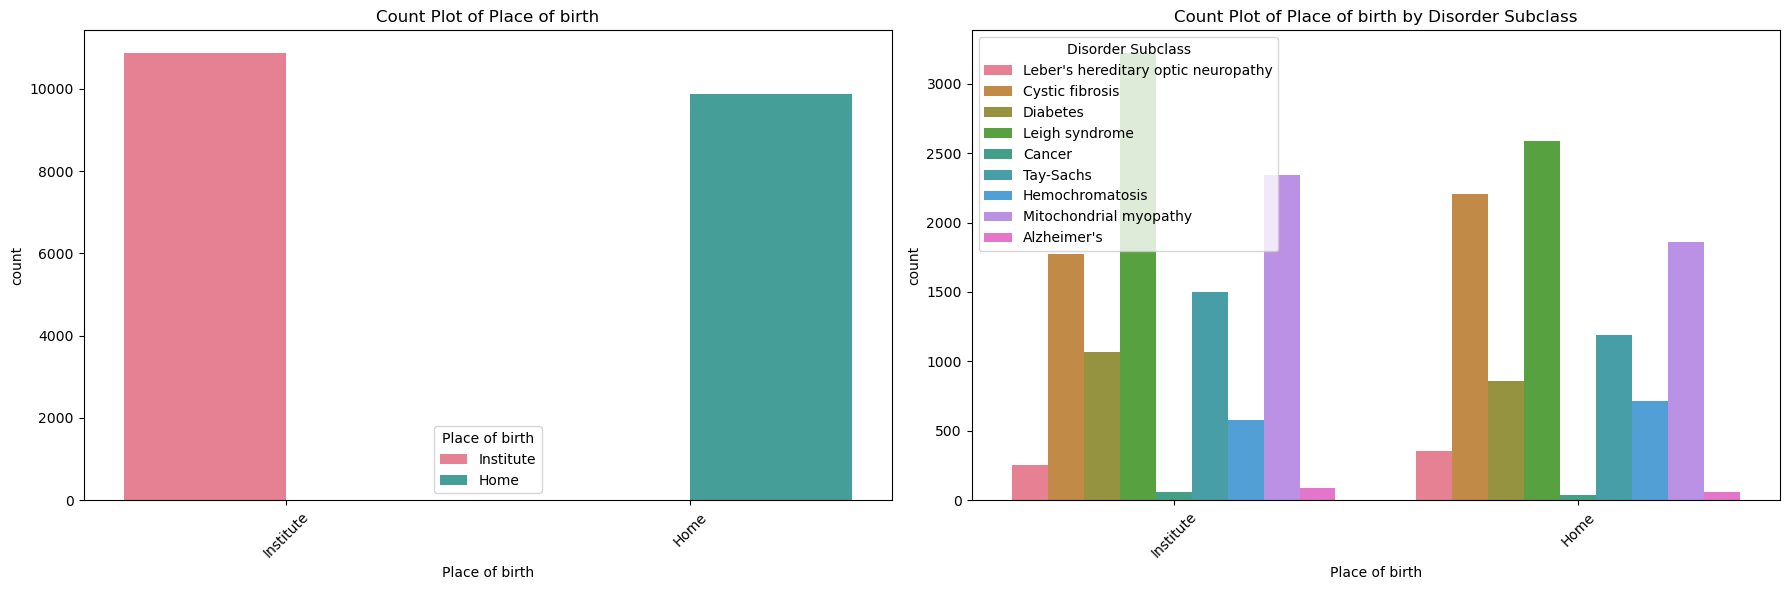

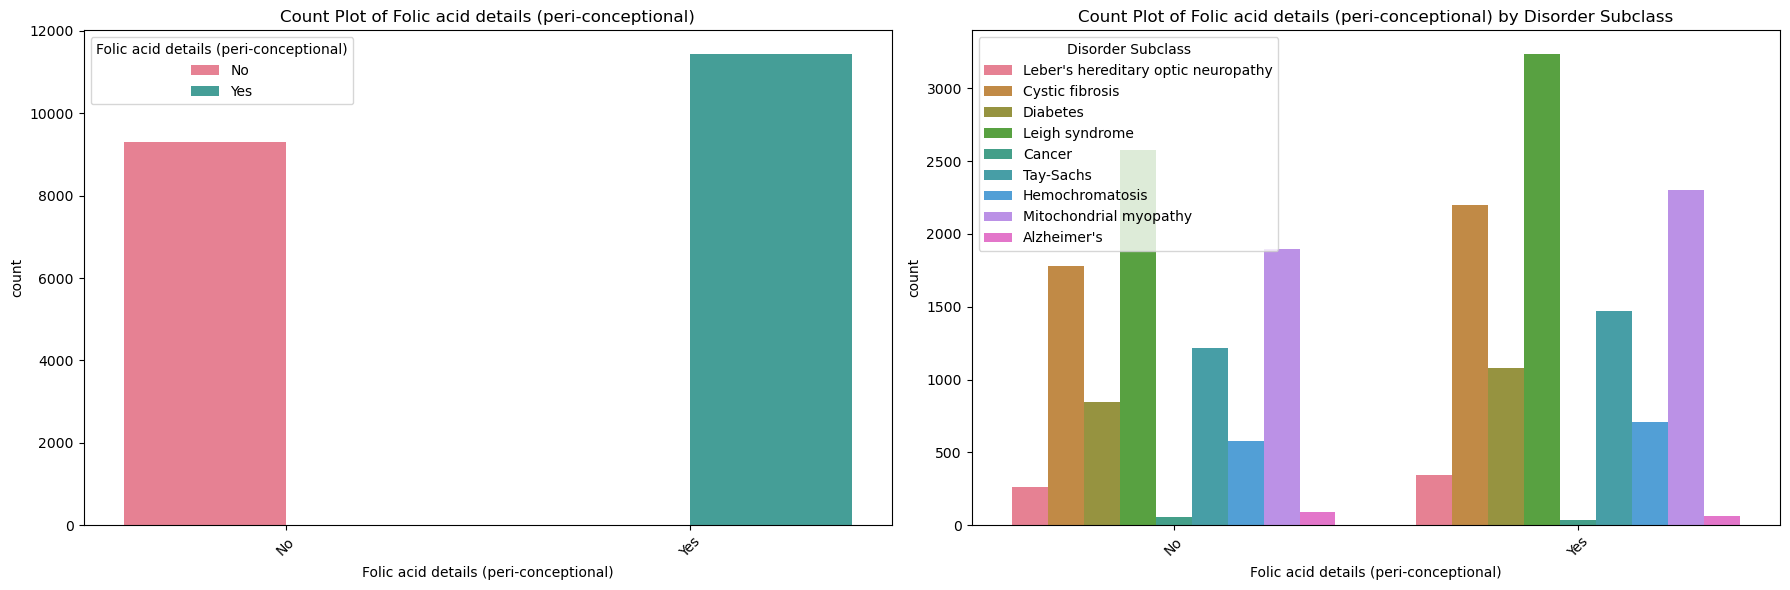

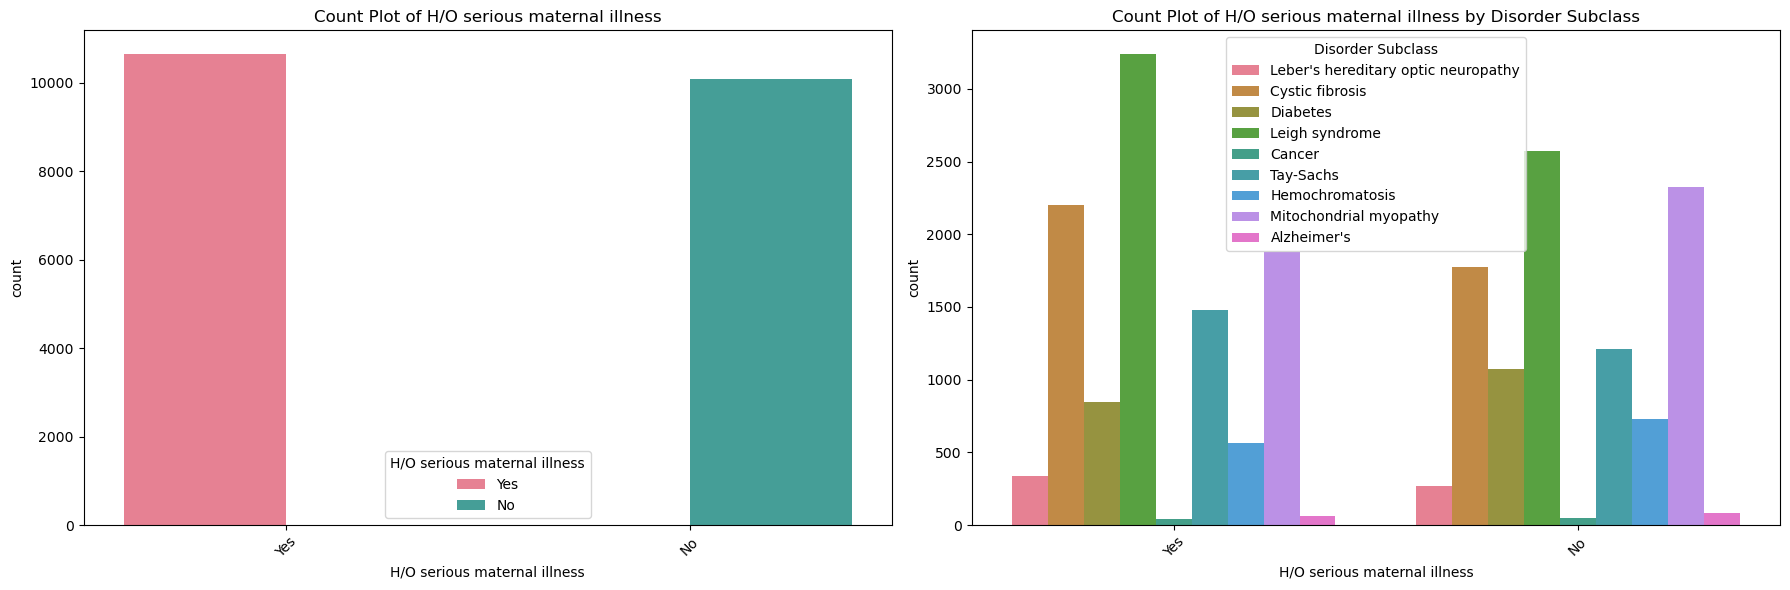

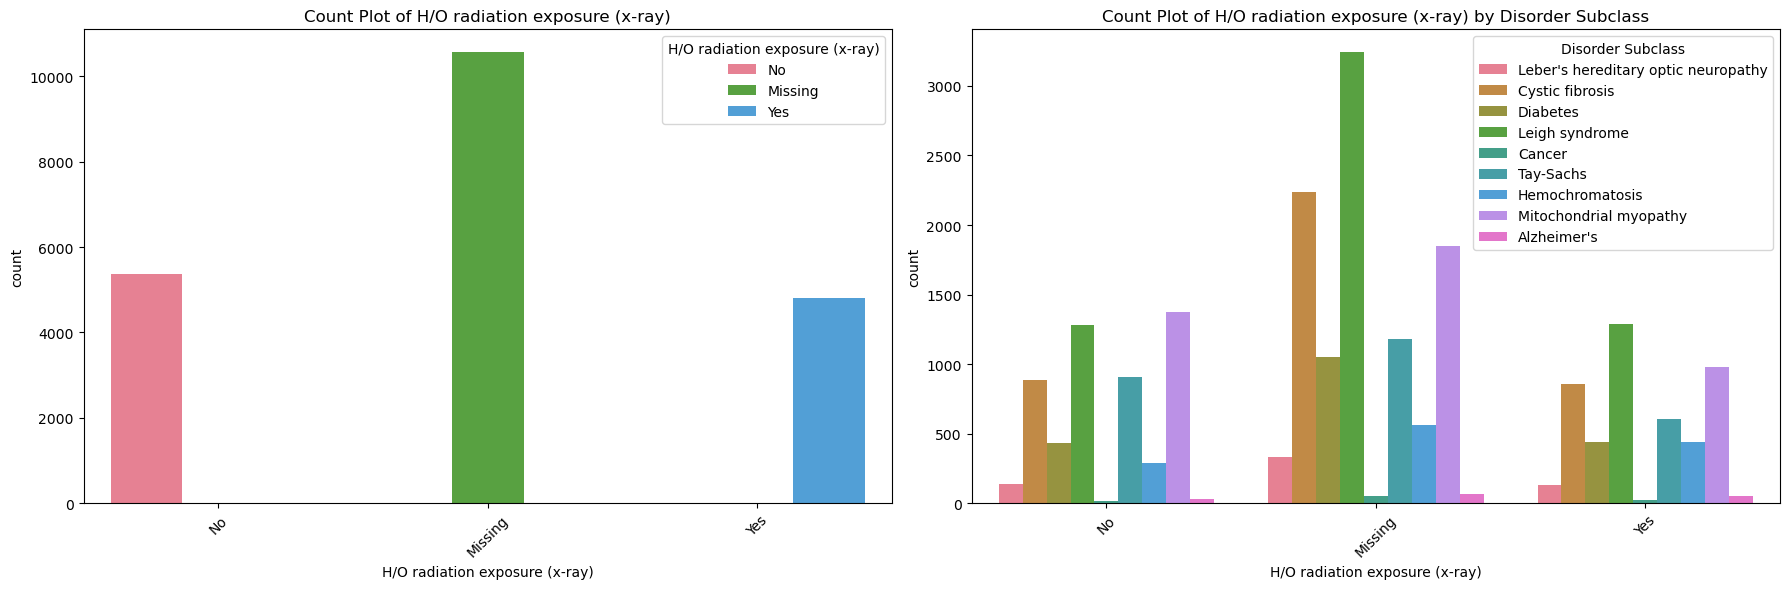

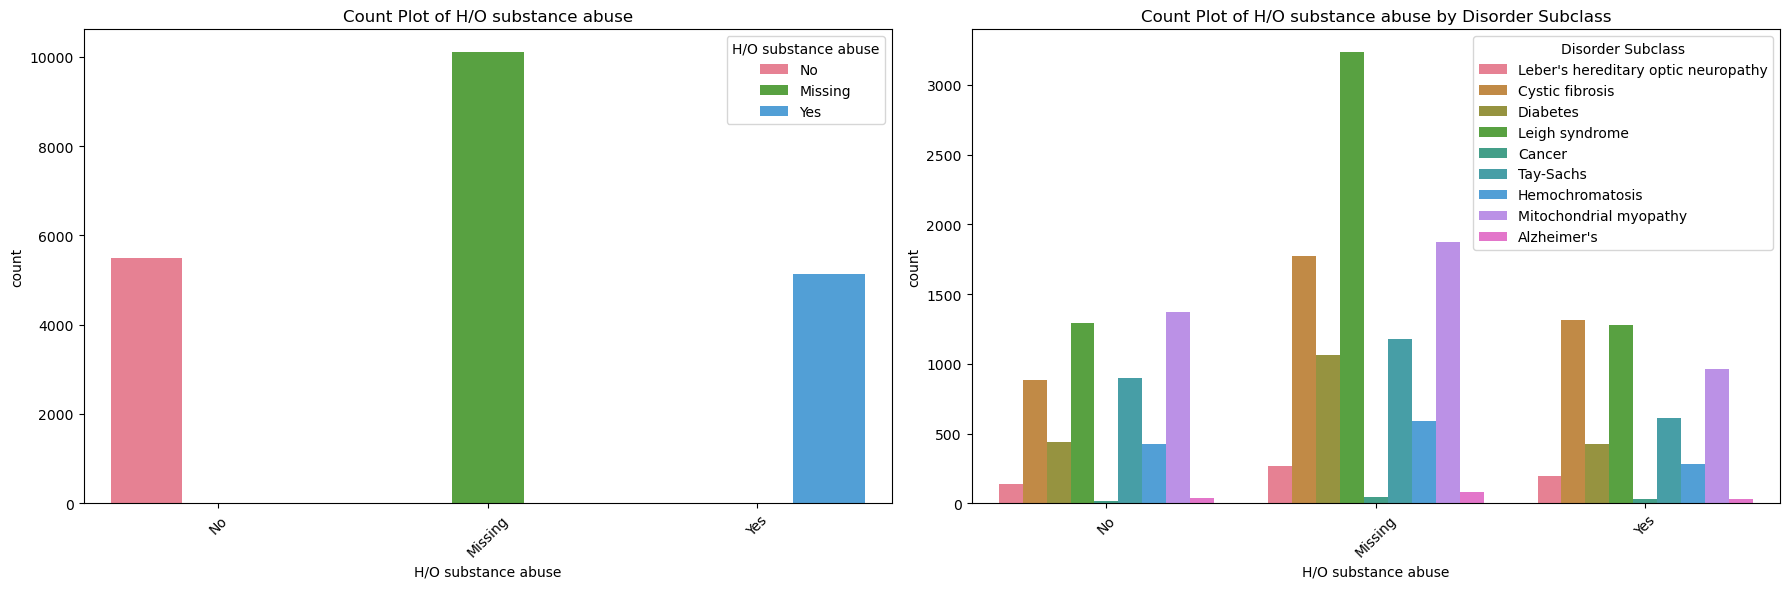

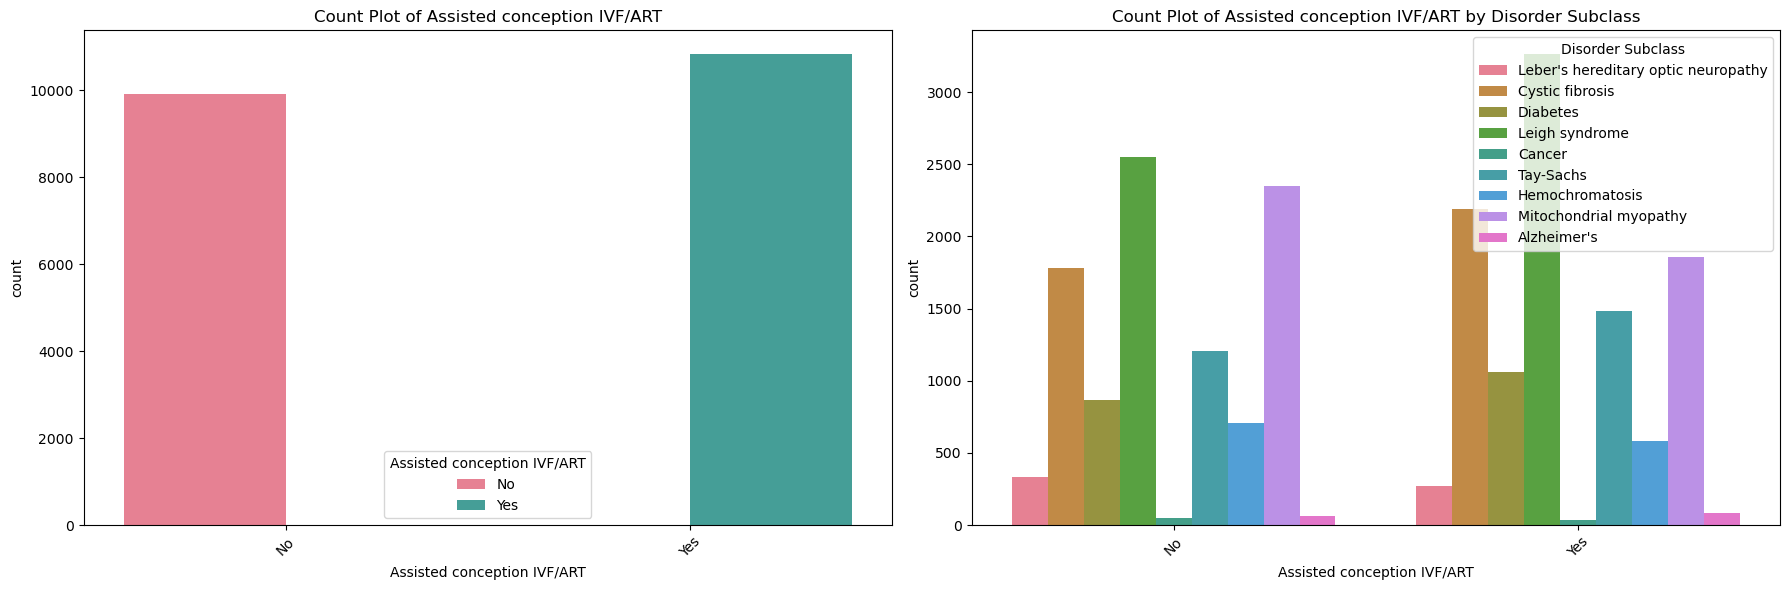

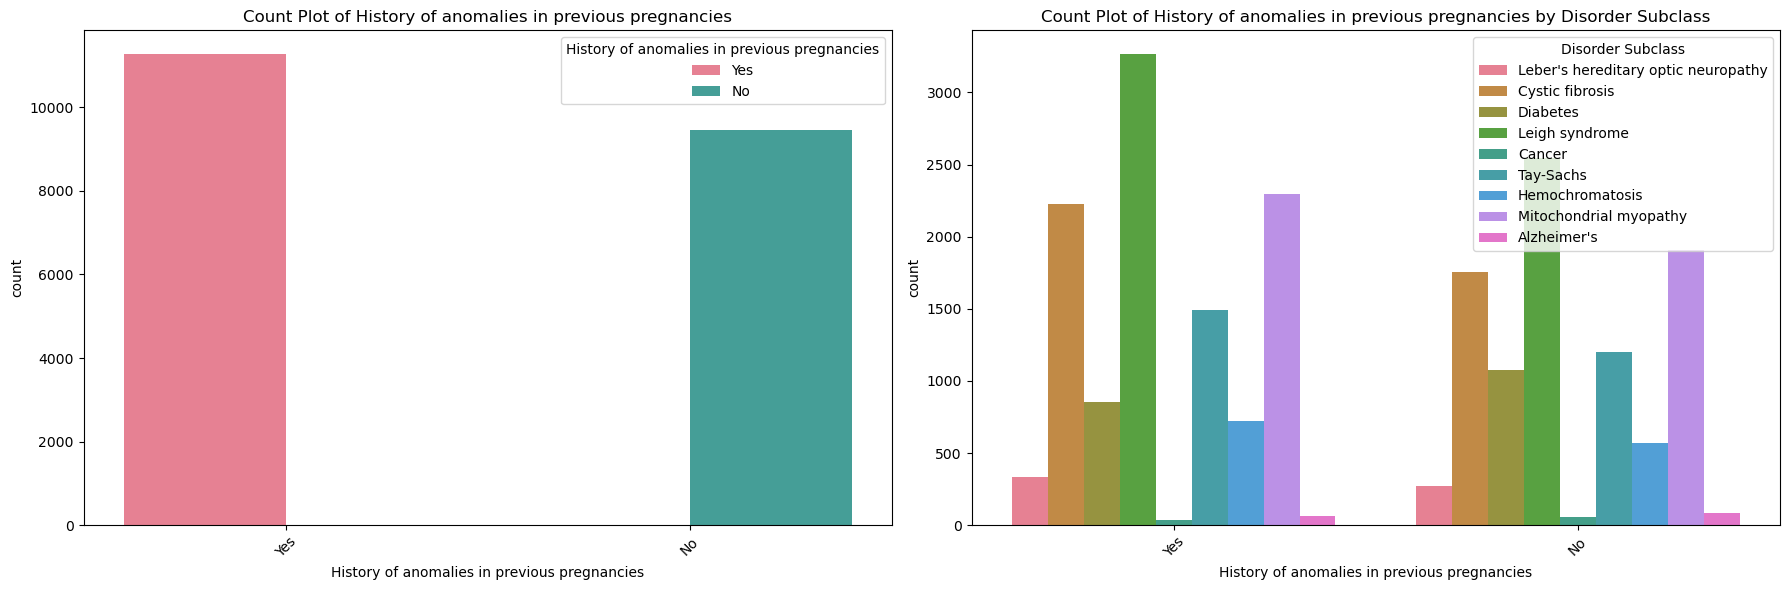

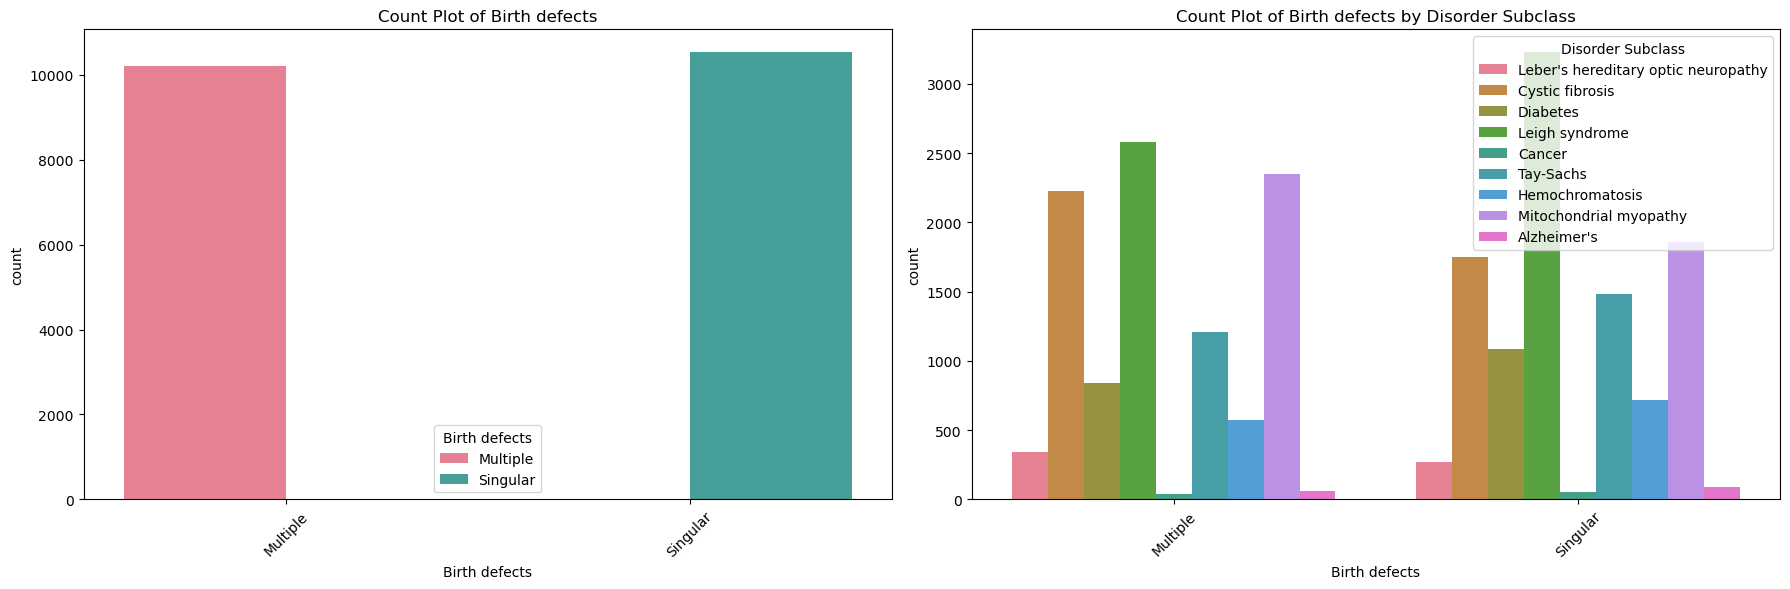

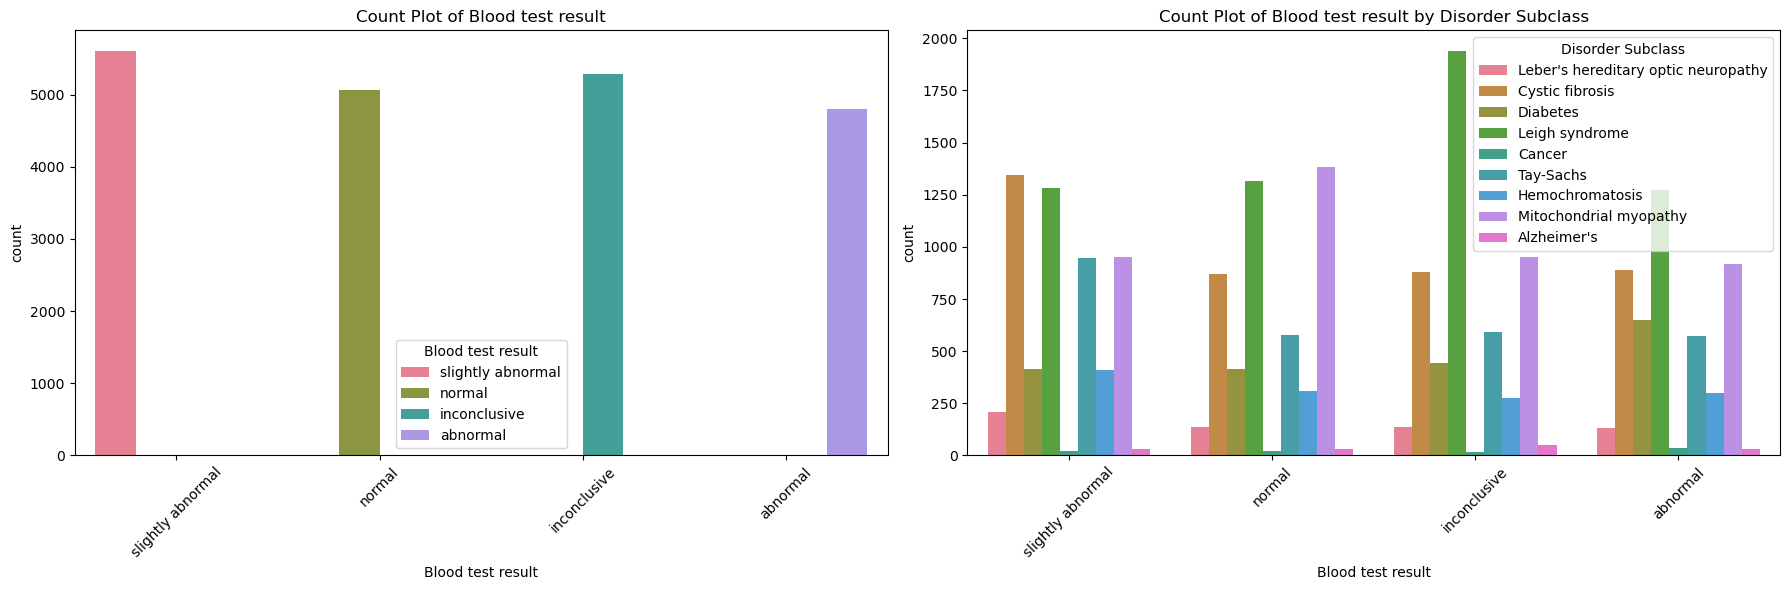

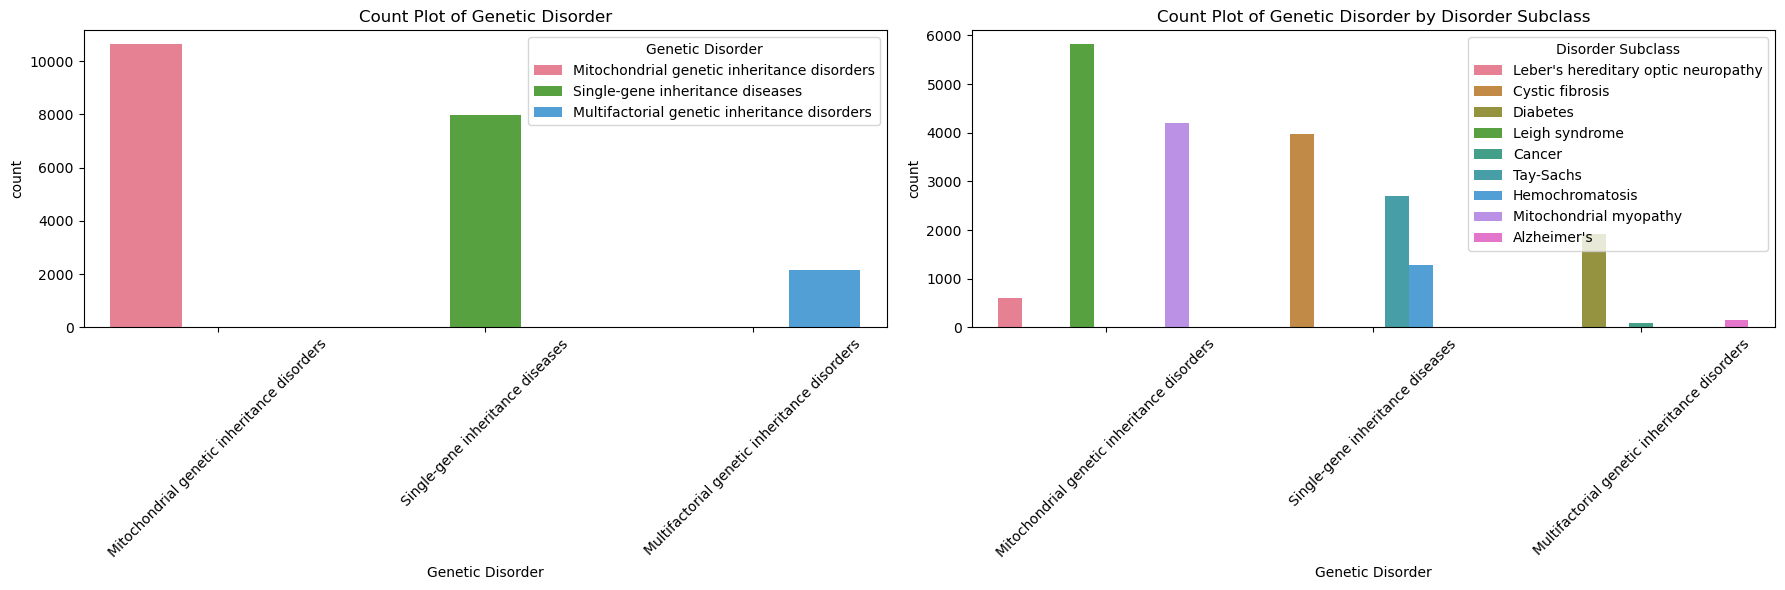

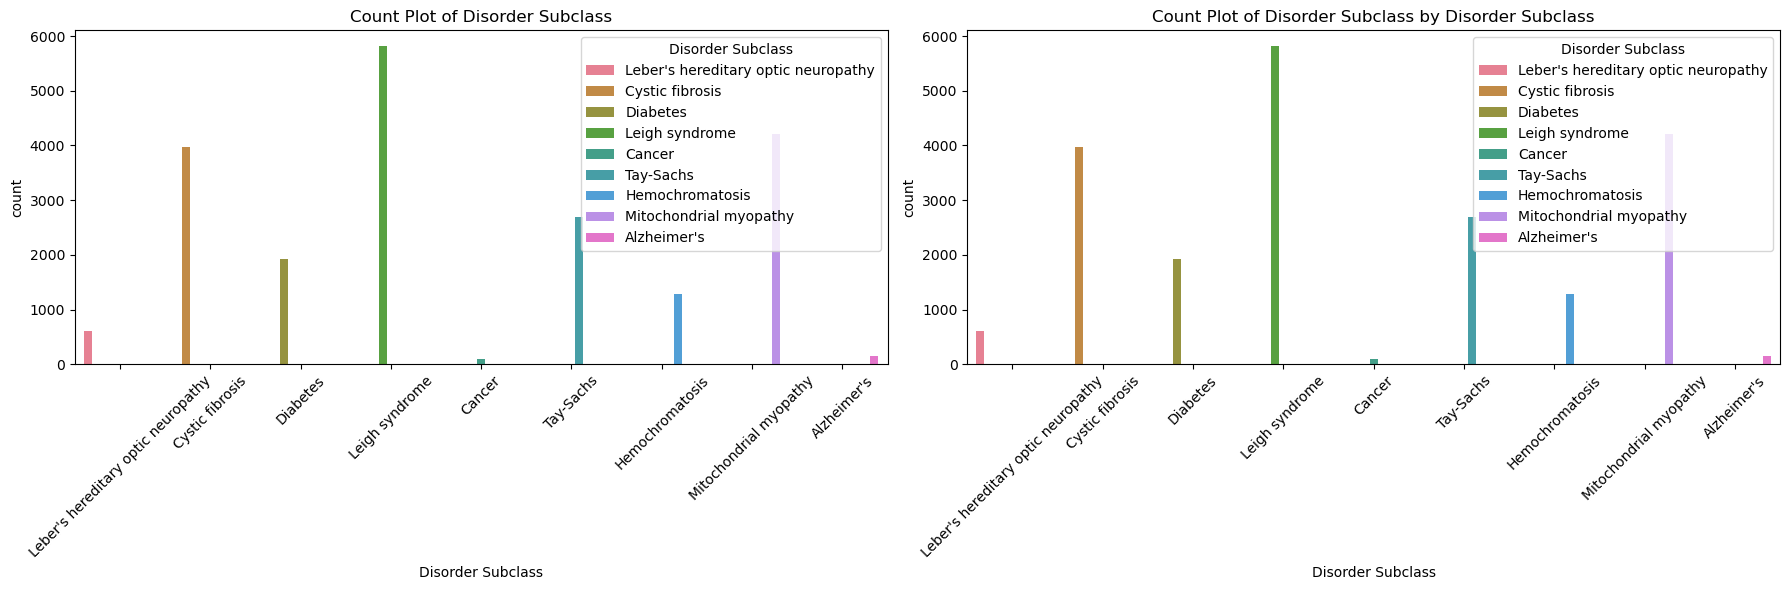

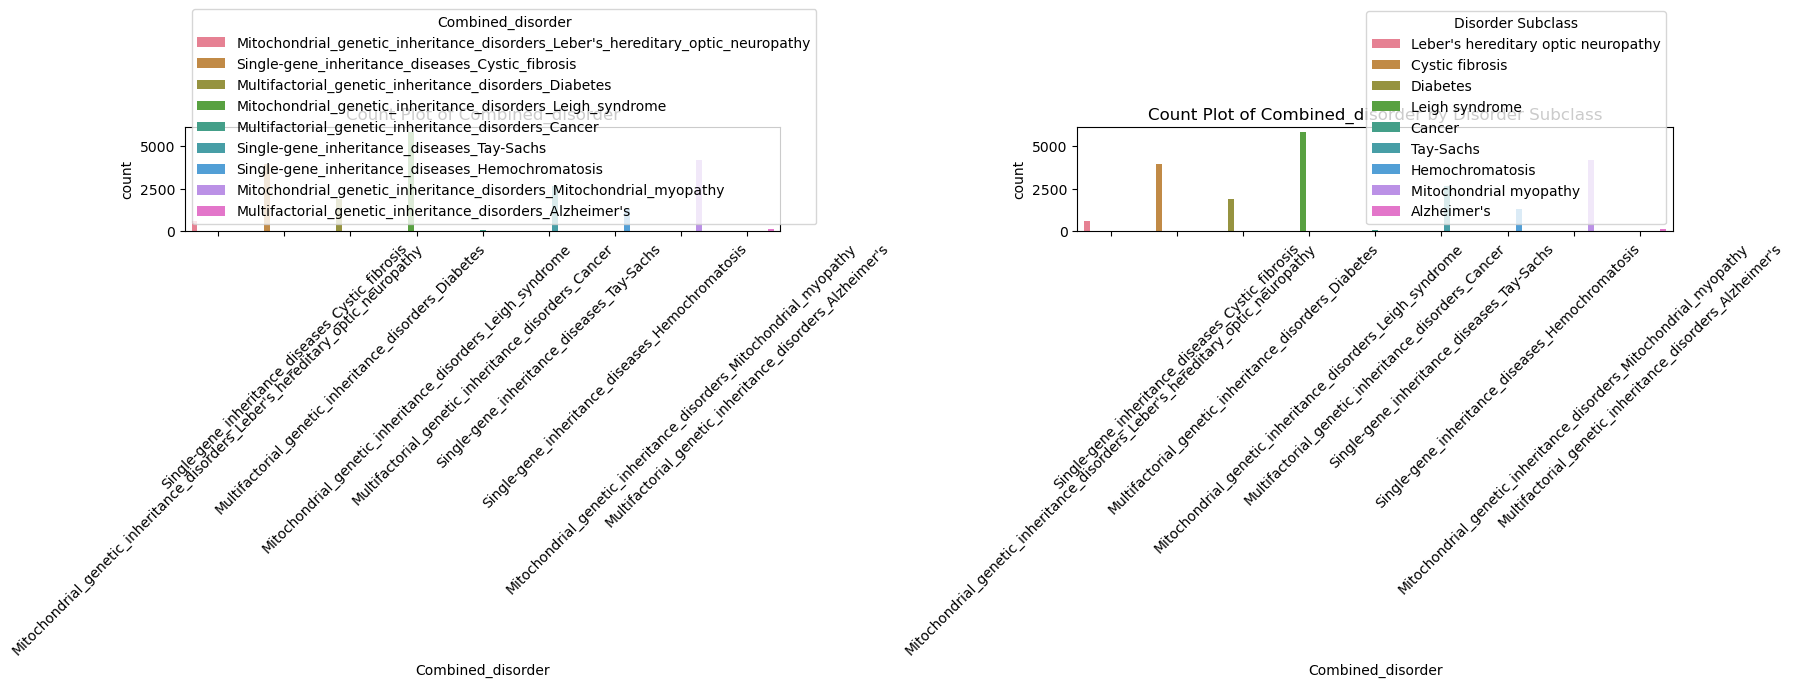

In [31]:

for feature in categorical_cols:

    # Determine the number of unique values in the hue feature
    num_unique_hue = df_train[feature].nunique()
    num_unique_target = df_train['Disorder Subclass'].nunique()

    custom_colors = sns.color_palette("husl", n_colors=num_unique_hue)  # Or any other palette with sufficient colors

    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature}')

    plt.xticks(rotation=45)
    custom_colors = sns.color_palette("husl", n_colors=num_unique_target)  # Or any other palette with sufficient colors

    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='Disorder Subclass', data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature} by Disorder Subclass')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

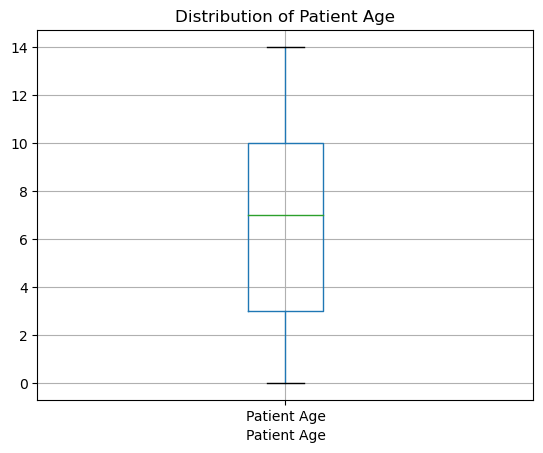

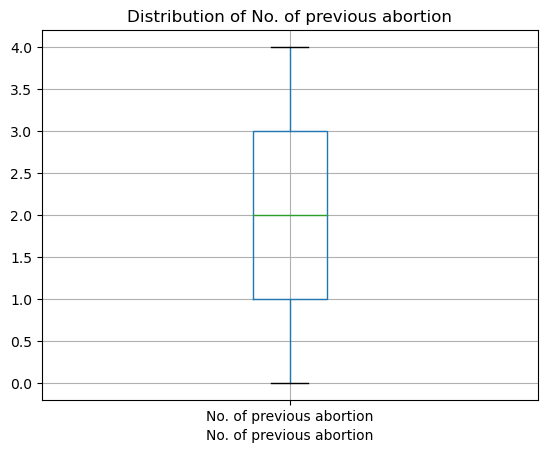

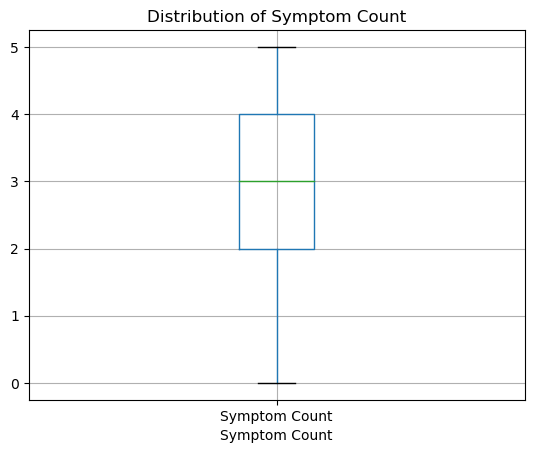

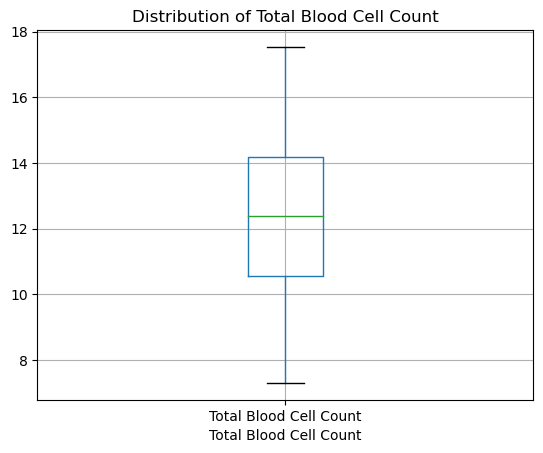

In [32]:
for col in df_train.select_dtypes(include='number').columns:
    df_train.boxplot(column=col)
    plt.xlabel(col)  # Set the xlabel to the current column name
    plt.title(f'Distribution of {col}')  # Title explaining what the plot represents
    plt.show()

In [33]:
import scipy.stats as stats

numerical_cols = df_train.select_dtypes(include=["number"]).columns

skewness = df_train[numerical_cols].apply(lambda x: stats.skew(x.dropna()))
print(skewness)

Patient Age                 0.010530
No. of previous abortion    0.000424
Symptom Count               0.042628
Total Blood Cell Count      0.006321
dtype: float64


In [34]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(df):
    """
    Compute VIF for all features in the given DataFrame and identify high VIF values.
    """
    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values
    df = df.dropna()

    # Add constant to the feature set
    x = add_constant(df)

    # Create DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    # Drop the intercept term from VIF DataFrame
    vif = vif[vif['Variable'] != 'const']

    # Filter features with VIF > 5
    high_vif = vif[vif['VIF'] > 5]

    # Print high VIF results
    print("Columns with VIF > 5:")
    print(high_vif)

    # Map high VIF columns to their related columns
    high_vif_columns = high_vif["Variable"].tolist()
    collinear_info = {}

    for col in high_vif_columns:
        collinear_info[col] = []
        # Check collinearity by comparing VIF values
        for other_col in df.columns:
            if other_col != col:
                temp_df = df[[col, other_col]].copy()
                temp_df = add_constant(temp_df)
                temp_vif = pd.DataFrame()
                temp_vif["Variable"] = temp_df.columns
                temp_vif["VIF"] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]
                temp_vif = temp_vif[temp_vif['Variable'] != 'const']
                if temp_vif[temp_vif["Variable"] == col]["VIF"].values[0] > 5:
                    collinear_info[col].append((other_col, temp_vif[temp_vif["Variable"] == col]["VIF"].values[0]))

    # Print collinearity information
    print("\nCollinear Information (high VIF columns and their related columns):")
    for col, related_cols in collinear_info.items():
        if related_cols:
            print(f"Column '{col}' has high VIF with:")
            for other_col, vif_value in related_cols:
                print(f"  - Column '{other_col}' (VIF: {vif_value})")
    return vif


# Assuming df_cleaned is your DataFrame with features
considered_features = df_train.select_dtypes(include='number').columns
vif_data=compute_vif(df_train[considered_features])
vif_data

Columns with VIF > 5:
Empty DataFrame
Columns: [Variable, VIF]
Index: []

Collinear Information (high VIF columns and their related columns):


Variable       VIF
1               Patient Age  1.000313
2  No. of previous abortion  1.000081
3             Symptom Count  1.000229
4    Total Blood Cell Count  1.000059

In [35]:
df_train.shape

(20745, 27)

In [36]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])


In [38]:
from sklearn.model_selection import train_test_split

## With 'Genetic Disorder' as a target column

In [39]:
X =df_train.drop(columns=['Genetic Disorder'])
Y = df_train[['Genetic Disorder']]


In [40]:
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.feature_selection import chi2, f_classif, SelectKBest


# Apply chi-square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, Y)

# Get scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Create a DataFrame to display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(pd.DataFrame(feature_scores))

                                         Feature    Chi2 Score       P-Value
25                             Combined_disorder  36749.178260  0.000000e+00
22                             Disorder Subclass   6330.387710  0.000000e+00
23                                 Symptom Count   1629.058261  0.000000e+00
21                             Blood test result    172.884563  2.874711e-38
2                          Inherited from father    129.982444  5.952109e-29
3                                  Maternal gene     94.614909  2.848613e-21
16                           H/O substance abuse     91.851273  1.134356e-20
1                         Genes in mother's side     78.073668  1.113059e-17
4                                  Paternal gene     62.429354  2.777397e-14
8                                      Follow-up     51.530360  6.461368e-12
18  History of anomalies in previous pregnancies     49.390749  1.883367e-11
12                                Place of birth     41.675026  8.920374e-10

In [41]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

In [43]:
pip install xgboost


     -------------------------------------- 124.9/124.9 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


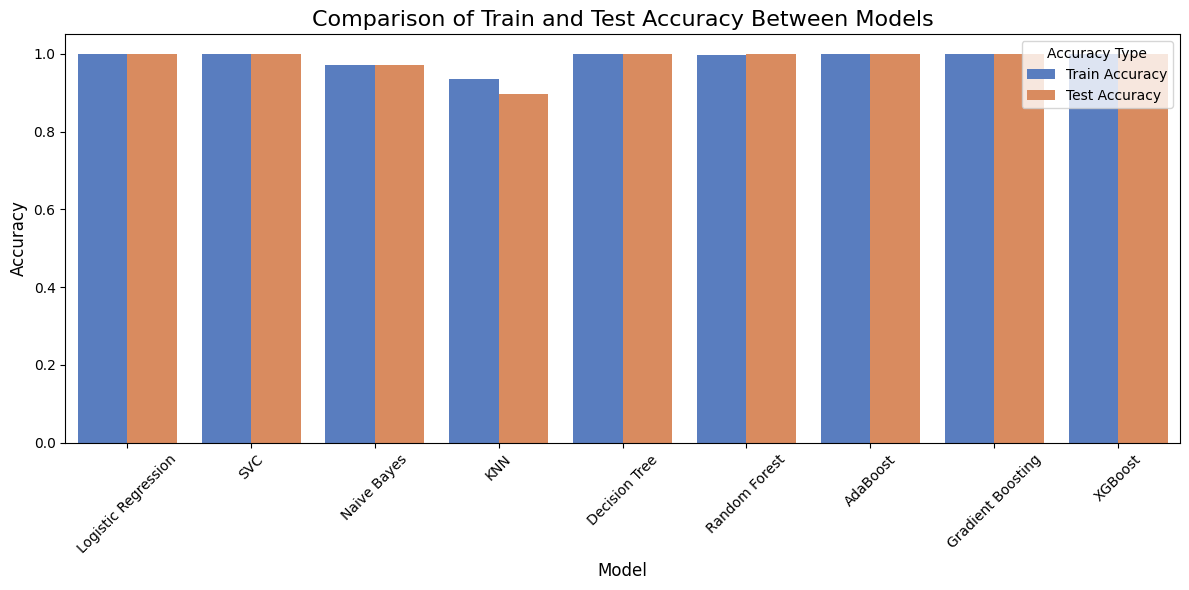

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: Use

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Logistic Regression using MinMaxScaler:


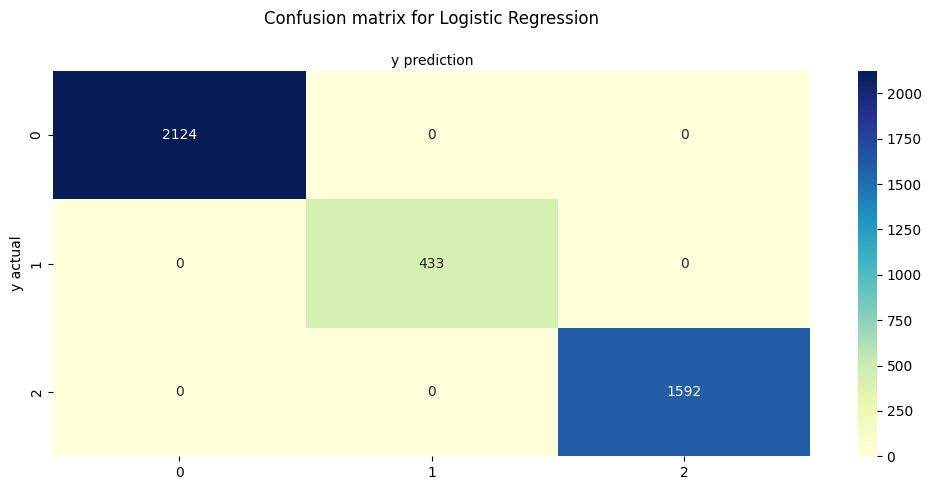

Classification Report for Logistic Regression using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


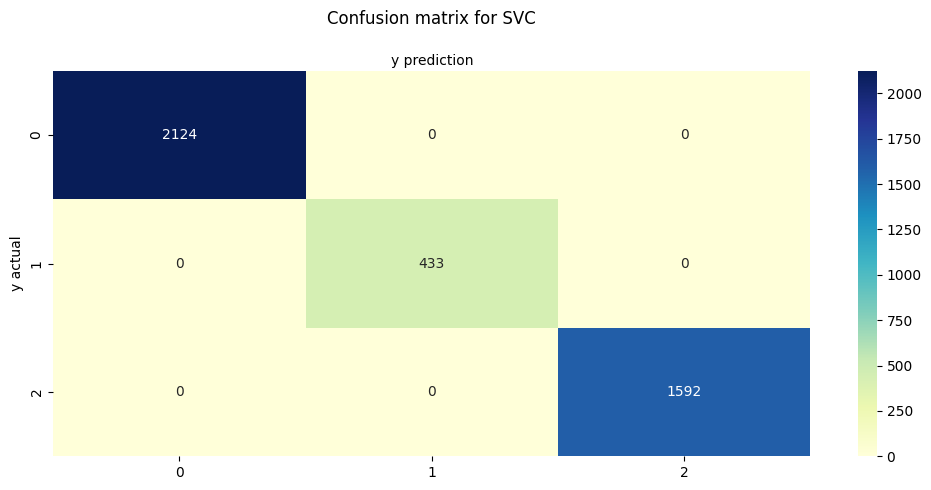

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 0.9293
Test Accuracy: 0.9431
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 0.9293
Test Accuracy: 0.9431
----------------------------------------
Using StandardScaler with Naive Bayes:
Train Accuracy: 0.9293
Test Accuracy: 0.9431
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  w

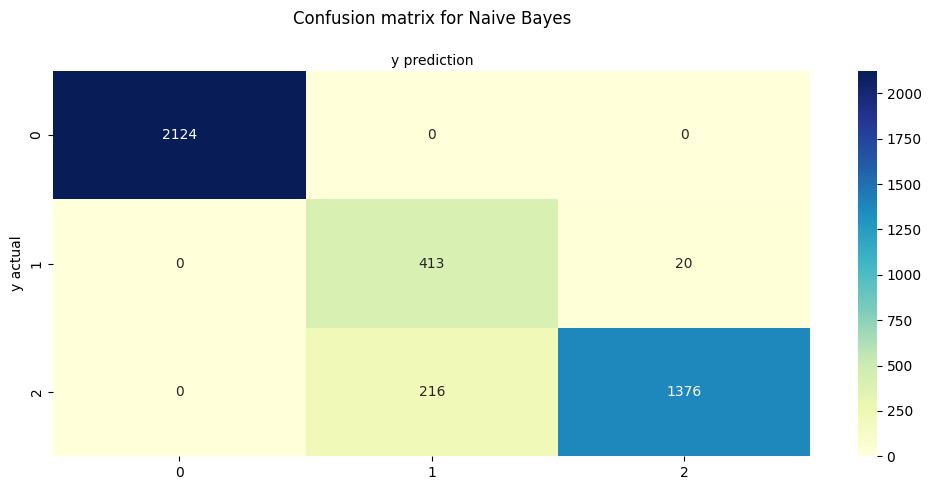

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       0.66      0.95      0.78       433
           2       0.99      0.86      0.92      1592

    accuracy                           0.94      4149
   macro avg       0.88      0.94      0.90      4149
weighted avg       0.96      0.94      0.95      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.8803
Test Accuracy: 0.7163
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.9634
Test Accuracy: 0.8884
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.9496
Test Accuracy: 0.8682
----------------------------------------
Confusion Matrix for KNN using RobustScaler:


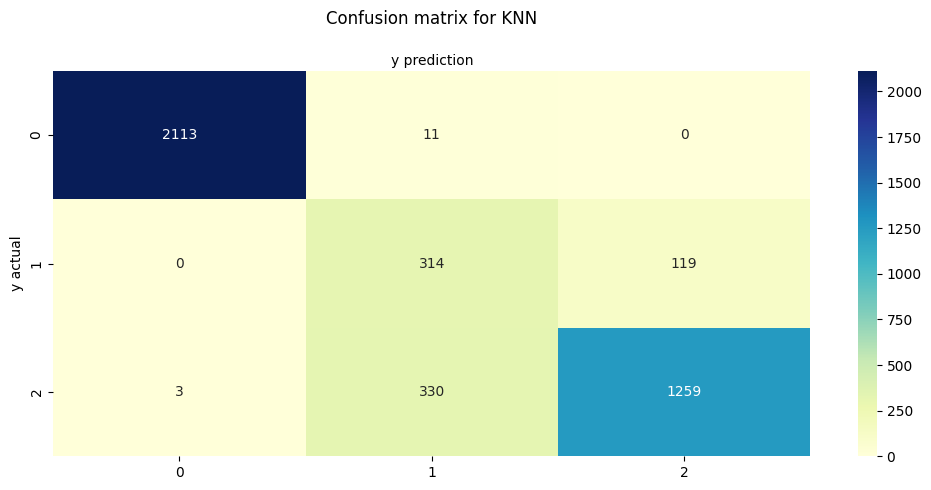

Classification Report for KNN using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2124
           1       0.48      0.73      0.58       433
           2       0.91      0.79      0.85      1592

    accuracy                           0.89      4149
   macro avg       0.80      0.84      0.81      4149
weighted avg       0.91      0.89      0.90      4149

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


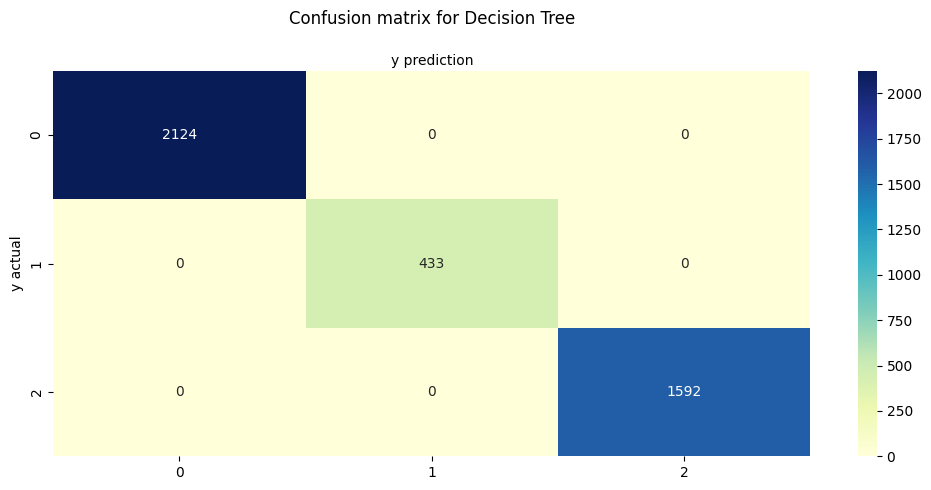

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/3602698846.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using MinMaxScaler with Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/3602698846.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9999
Test Accuracy: 0.9995
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/3602698846.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using StandardScaler with Random Forest:
Train Accuracy: 0.9974
Test Accuracy: 0.9969
----------------------------------------
Confusion Matrix for Random Forest using MinMaxScaler:


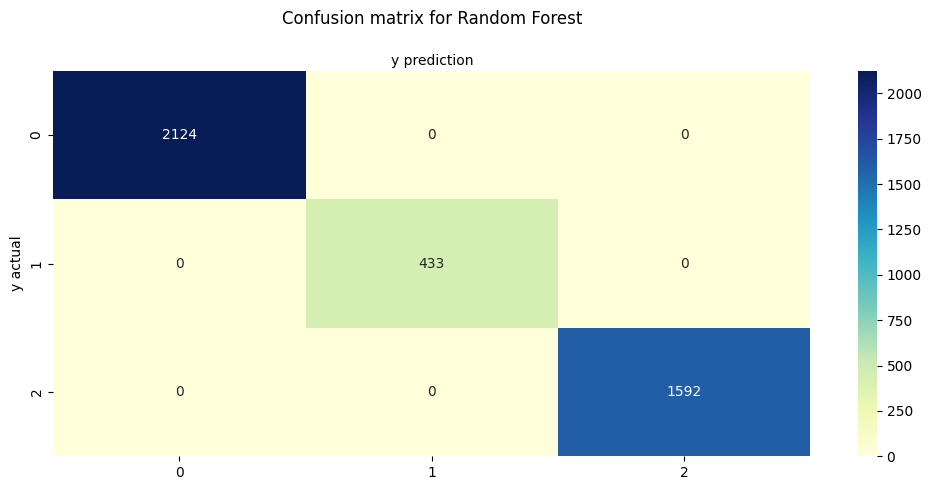

Classification Report for Random Forest using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


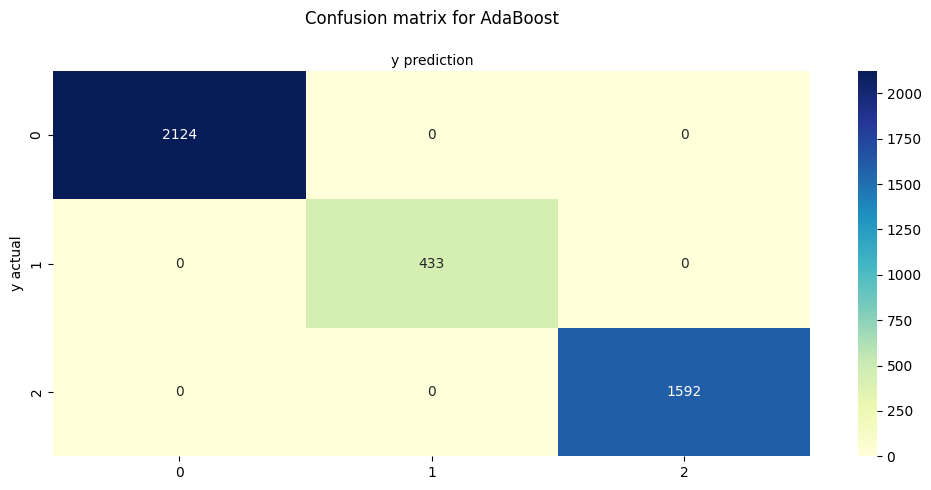

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


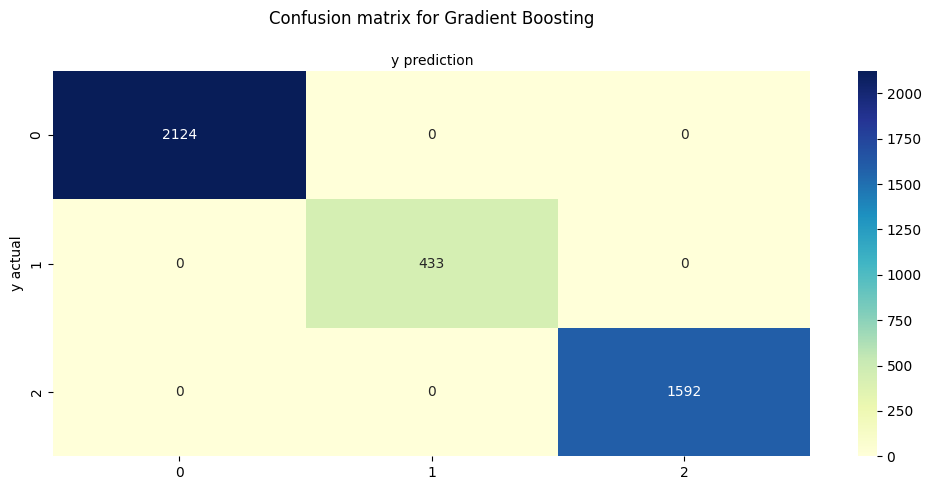

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Using StandardScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for XGBoost using MinMaxScaler:


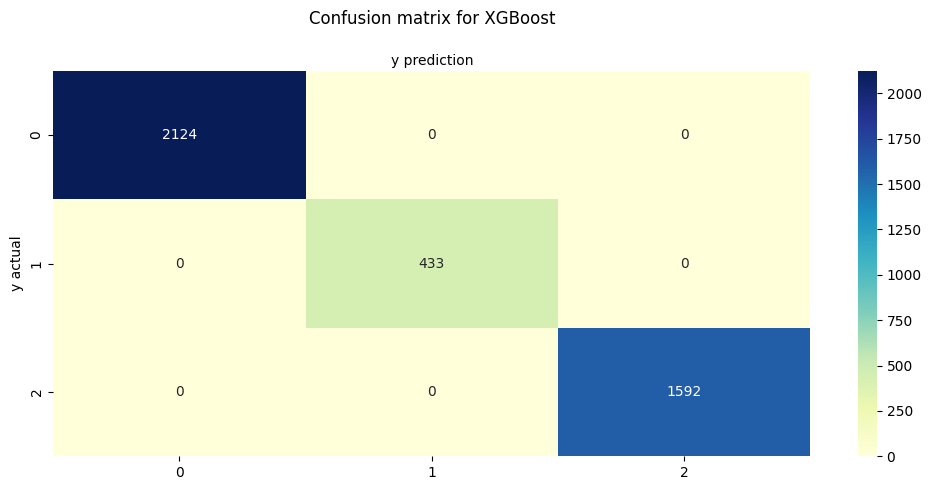

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2124
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00      1592

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



Model        Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  MinMaxScaler        1.000000       1.000000
1                  SVC  MinMaxScaler        1.000000       1.000000
2          Naive Bayes  MinMaxScaler        0.929277       0.943119
3                  KNN  RobustScaler        0.949557       0.888407
4        Decision Tree  MinMaxScaler        1.000000       1.000000
5        Random Forest  MinMaxScaler        0.997372       1.000000
6             AdaBoost  MinMaxScaler        1.000000       1.000000
7    Gradient Boosting  MinMaxScaler        1.000000       1.000000
8              XGBoost  MinMaxScaler        1.000000       1.000000

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10, kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),#
    'Random Forest': RandomForestClassifier(n_estimators=15, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
x_train_resampled = imputer.fit_transform(x_train_resampled)


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)
        
        classifier.fit(x_train_scaled, y_train_resampled)
        y_pred = classifier.predict(x_test_scaled)
        
        train_accuracy = accuracy_score(y_train_resampled, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)


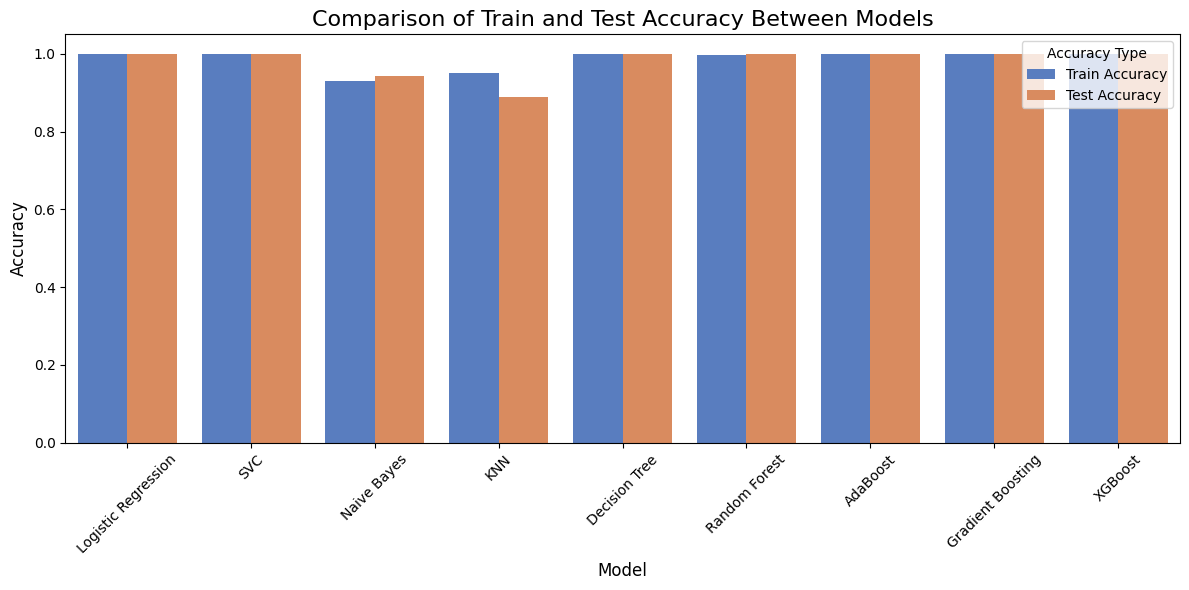

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


## With "Disorder Subclass" as a target column

In [44]:
X =df_train.drop(columns=['Disorder Subclass'])
Y = df_train[['Disorder Subclass']]

In [45]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9931
Test Accuracy: 0.9911
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9996
Test Accuracy: 0.9988
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using StandardScaler with Logistic Regression:
Train Accuracy: 0.9999
Test Accuracy: 0.9998
----------------------------------------
Confusion Matrix for Logistic Regression using StandardScaler:


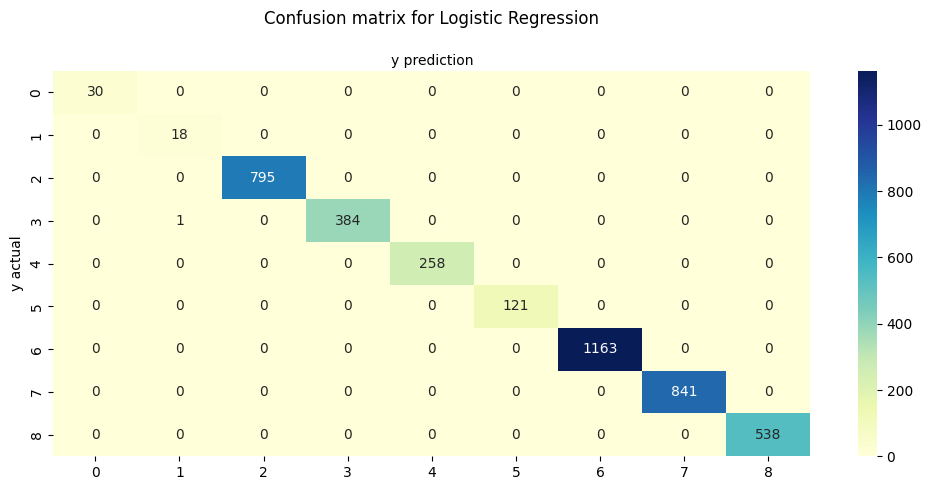

Classification Report for Logistic Regression using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       0.99      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 0.9999
Test Accuracy: 0.9998
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 0.9999
Test Accuracy: 0.9995
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 0.9995
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


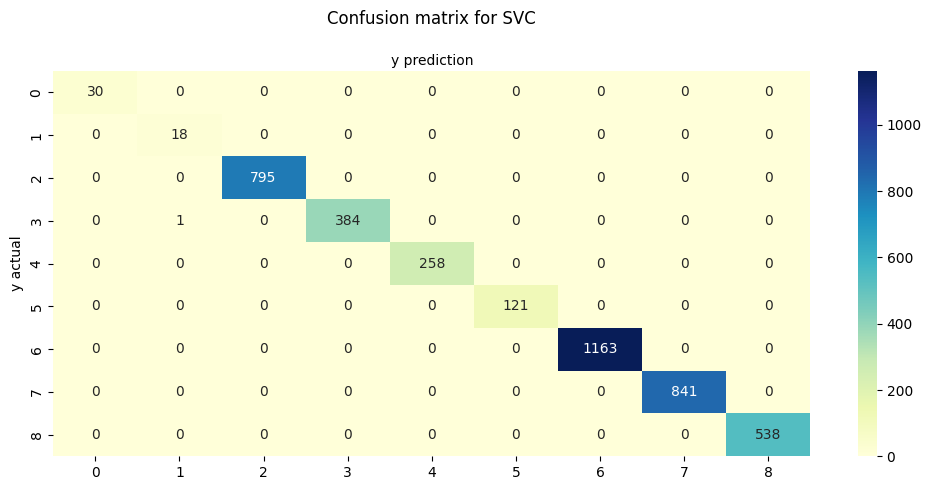

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       0.99      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


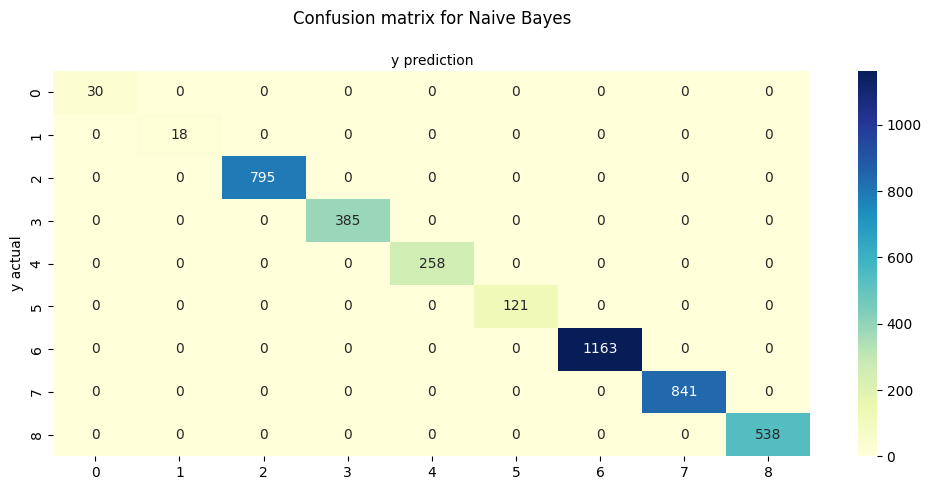

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.7044
Test Accuracy: 0.5447
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.7478
Test Accuracy: 0.6129
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.7544
Test Accuracy: 0.6057
----------------------------------------
Confusion Matrix for KNN using RobustScaler:


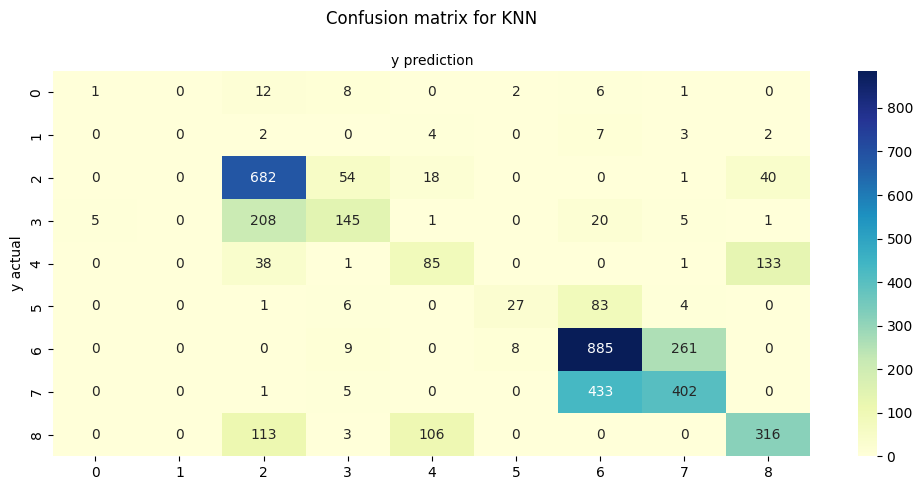

Classification Report for KNN using RobustScaler:
              precision    recall  f1-score   support

           0       0.17      0.03      0.06        30
           1       0.00      0.00      0.00        18
           2       0.65      0.86      0.74       795
           3       0.63      0.38      0.47       385
           4       0.40      0.33      0.36       258
           5       0.73      0.22      0.34       121
           6       0.62      0.76      0.68      1163
           7       0.59      0.48      0.53       841
           8       0.64      0.59      0.61       538

    accuracy                           0.61      4149
   macro avg       0.49      0.41      0.42      4149
weighted avg       0.61      0.61      0.60      4149

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


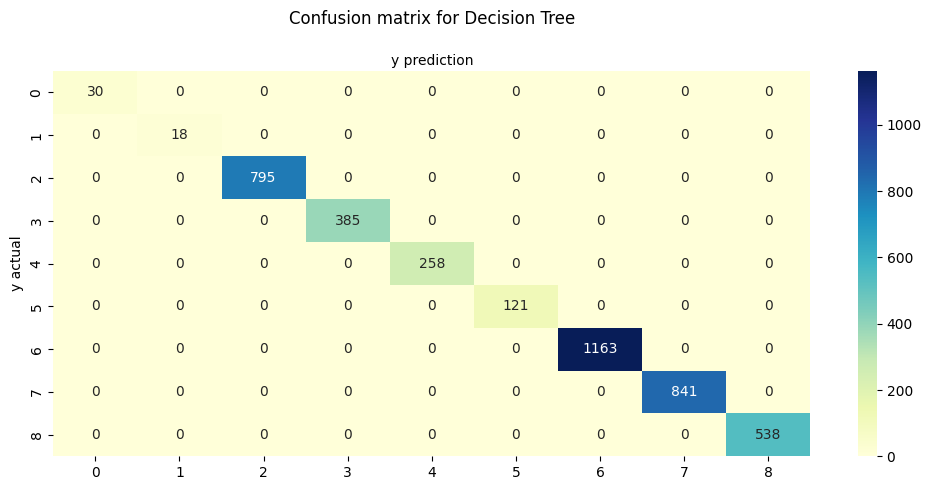

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/tmp/ipykernel_23/62408643.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9414
Test Accuracy: 0.9366
----------------------------------------


/tmp/ipykernel_23/62408643.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9057
Test Accuracy: 0.9002
----------------------------------------


/tmp/ipykernel_23/62408643.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train)


Using StandardScaler with Random Forest:
Train Accuracy: 0.9232
Test Accuracy: 0.9219
----------------------------------------
Confusion Matrix for Random Forest using MinMaxScaler:


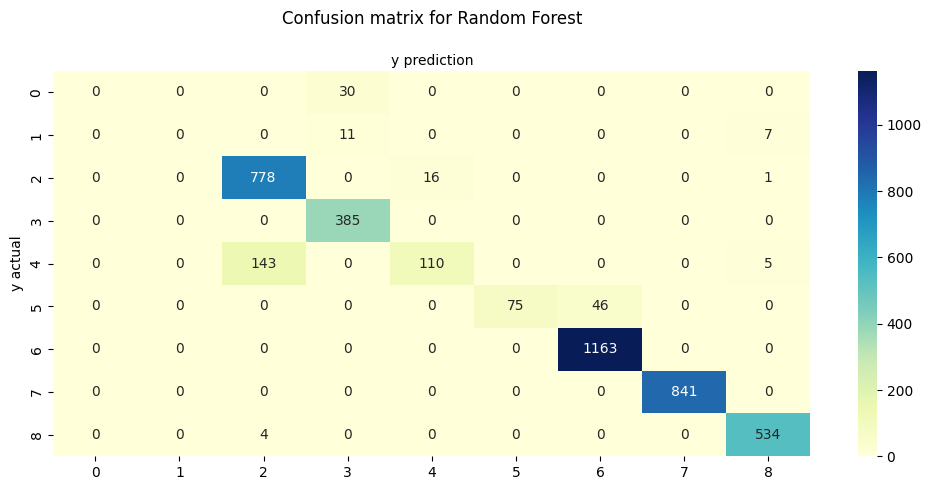

Classification Report for Random Forest using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        18
           2       0.84      0.98      0.90       795
           3       0.90      1.00      0.95       385
           4       0.87      0.43      0.57       258
           5       1.00      0.62      0.77       121
           6       0.96      1.00      0.98      1163
           7       1.00      1.00      1.00       841
           8       0.98      0.99      0.98       538

    accuracy                           0.94      4149
   macro avg       0.73      0.67      0.68      4149
weighted avg       0.93      0.94      0.92      4149



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation

Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.7039
Test Accuracy: 0.7040
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with AdaBoost:
Train Accuracy: 0.7039
Test Accuracy: 0.7040
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with AdaBoost:
Train Accuracy: 0.7039
Test Accuracy: 0.7040
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


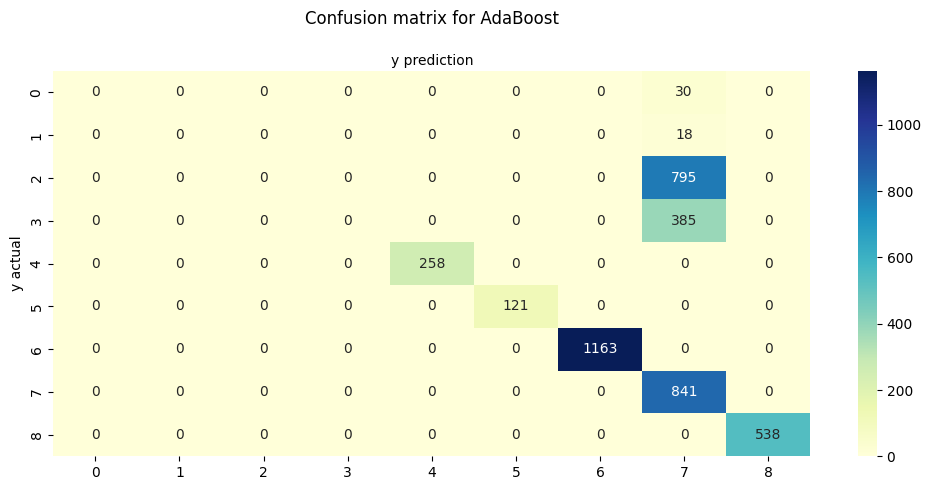

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       795
           3       0.00      0.00      0.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       0.41      1.00      0.58       841
           8       1.00      1.00      1.00       538

    accuracy                           0.70      4149
   macro avg       0.49      0.56      0.51      4149
weighted avg       0.58      0.70      0.62      4149



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


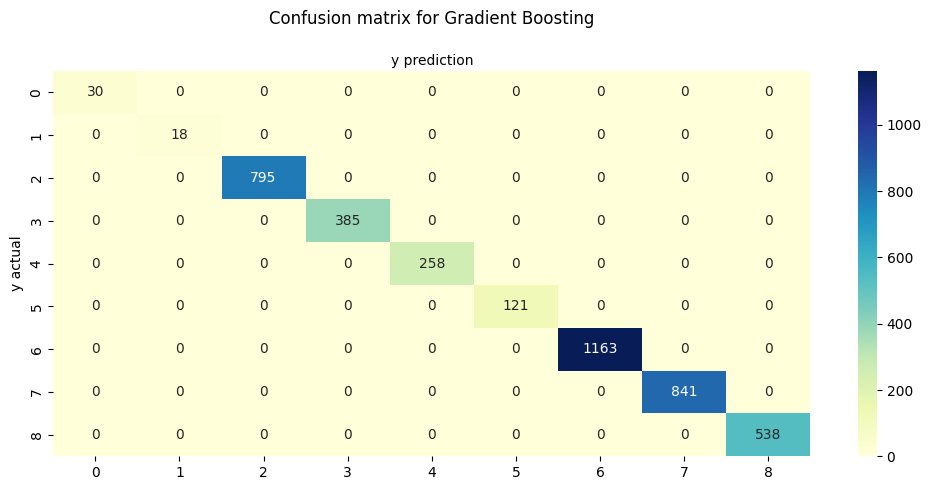

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

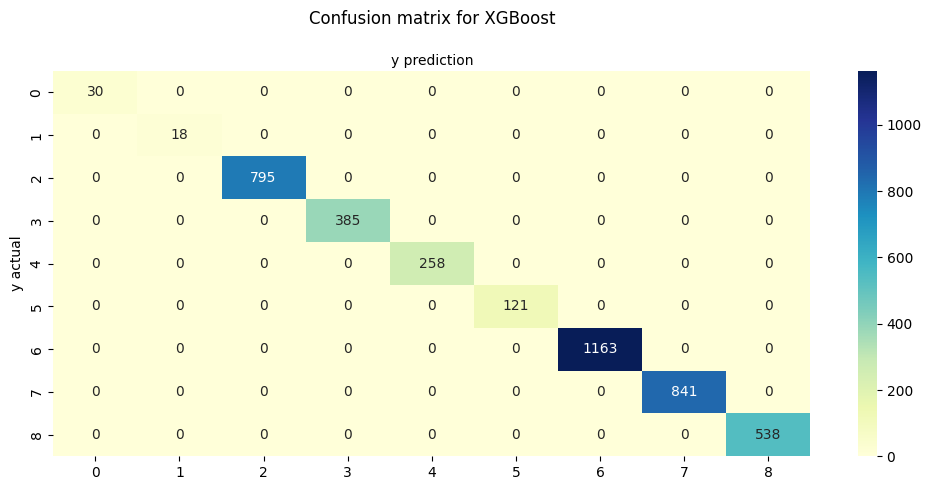

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  StandardScaler        0.999940       0.999759
1                  SVC    MinMaxScaler        1.000000       0.999759
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN    RobustScaler        0.754399       0.612919
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest    MinMaxScaler        0.923235       0.936611
6             AdaBoost    MinMaxScaler        0.703905       0.704025
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10,kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        
        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)
        
        
        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)

    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)


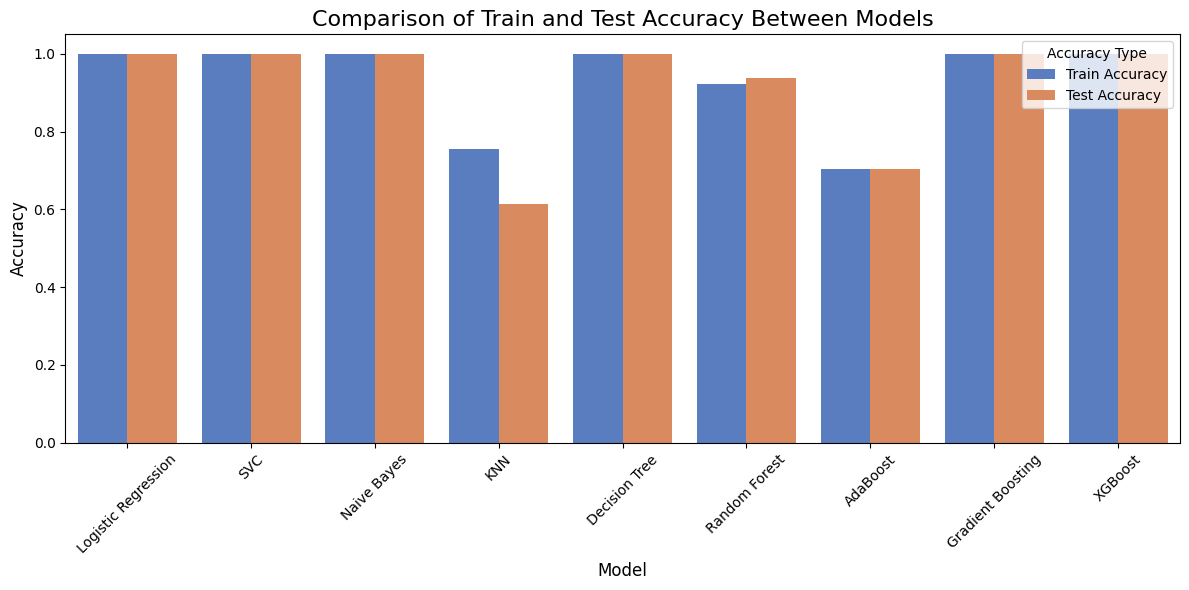

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


### Applying SOMTE

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: Use

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9987
Test Accuracy: 0.9945
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9999
Test Accuracy: 0.9998
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Logistic Regression using StandardScaler:


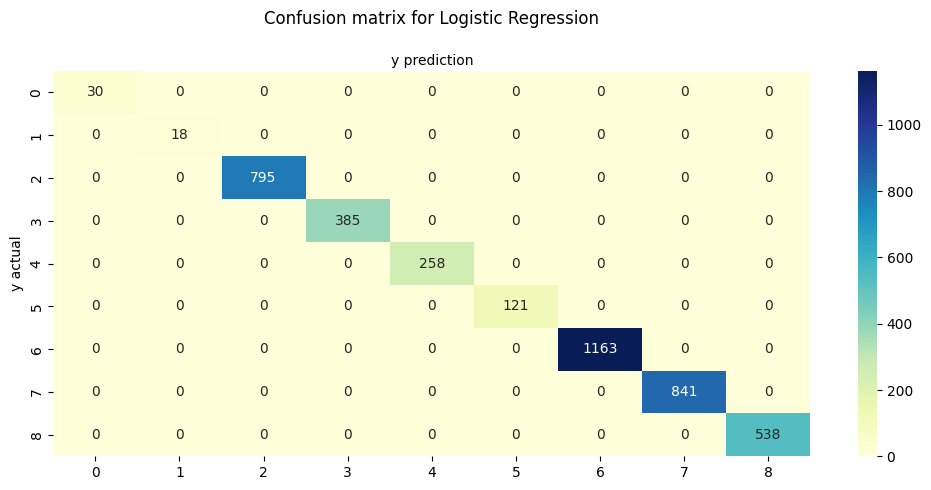

Classification Report for Logistic Regression using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 0.9998
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using RobustScaler:


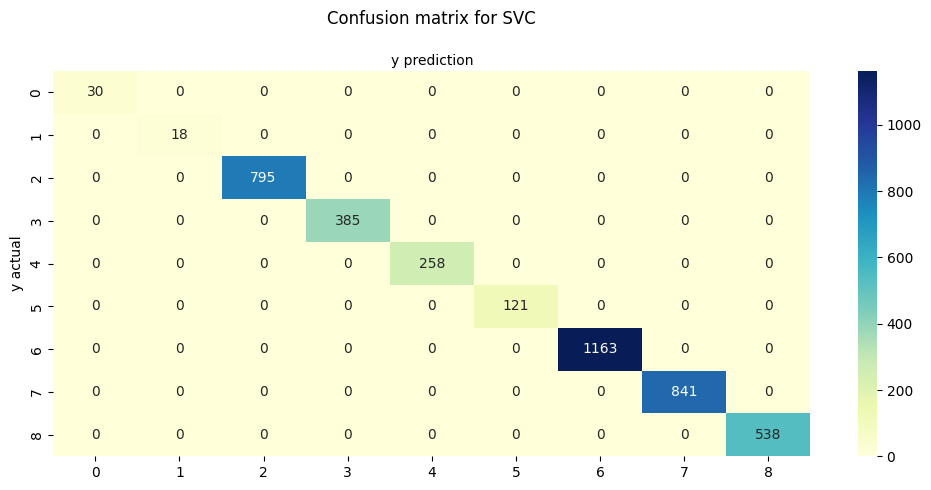

Classification Report for SVC using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  w

Using StandardScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


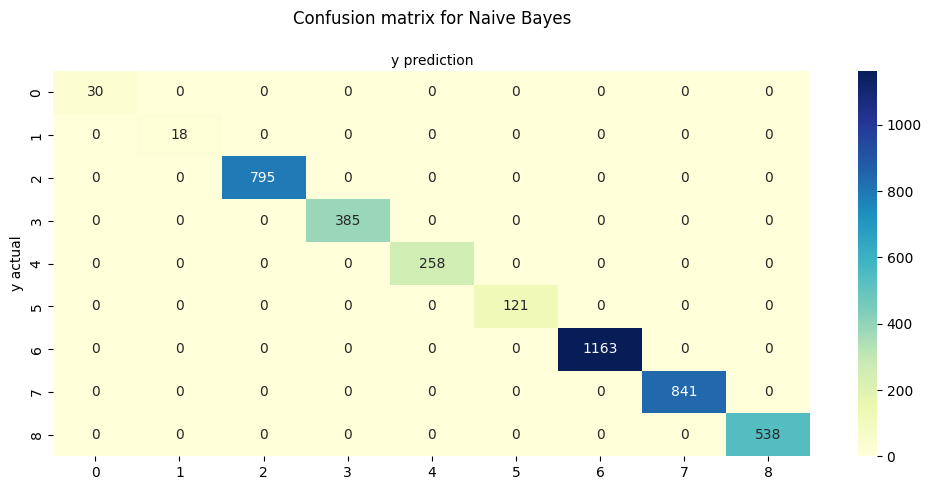

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.8469
Test Accuracy: 0.4825
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.9039
Test Accuracy: 0.5486
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.8953
Test Accuracy: 0.5476
----------------------------------------
Confusion Matrix for KNN using RobustScaler:


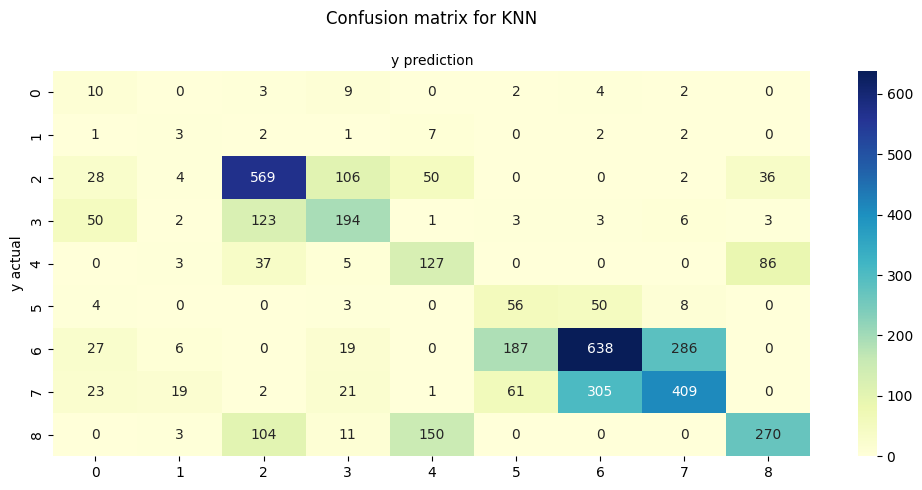

Classification Report for KNN using RobustScaler:
              precision    recall  f1-score   support

           0       0.07      0.33      0.12        30
           1       0.07      0.17      0.10        18
           2       0.68      0.72      0.70       795
           3       0.53      0.50      0.51       385
           4       0.38      0.49      0.43       258
           5       0.18      0.46      0.26       121
           6       0.64      0.55      0.59      1163
           7       0.57      0.49      0.53       841
           8       0.68      0.50      0.58       538

    accuracy                           0.55      4149
   macro avg       0.42      0.47      0.42      4149
weighted avg       0.59      0.55      0.56      4149

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


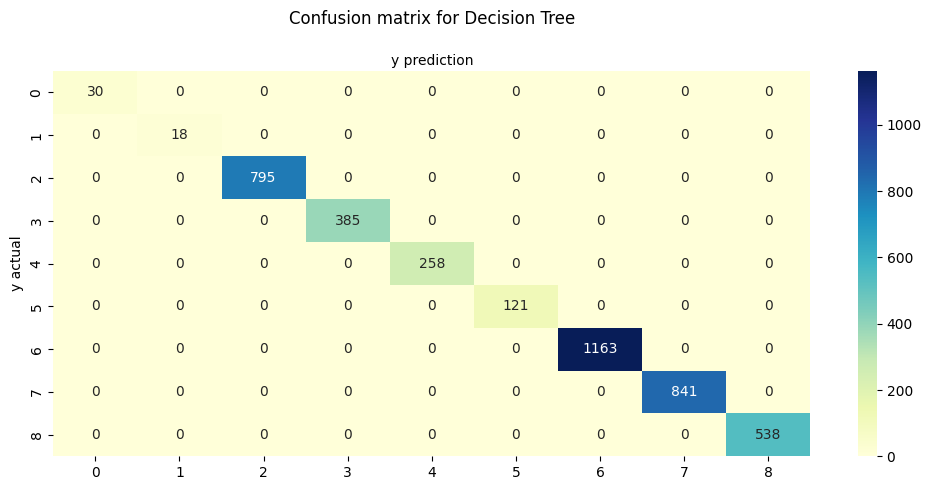

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/3602698846.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9861
Test Accuracy: 0.9807
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/3602698846.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9542
Test Accuracy: 0.9188
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/3602698846.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using StandardScaler with Random Forest:
Train Accuracy: 0.9843
Test Accuracy: 0.9836
----------------------------------------
Confusion Matrix for Random Forest using StandardScaler:


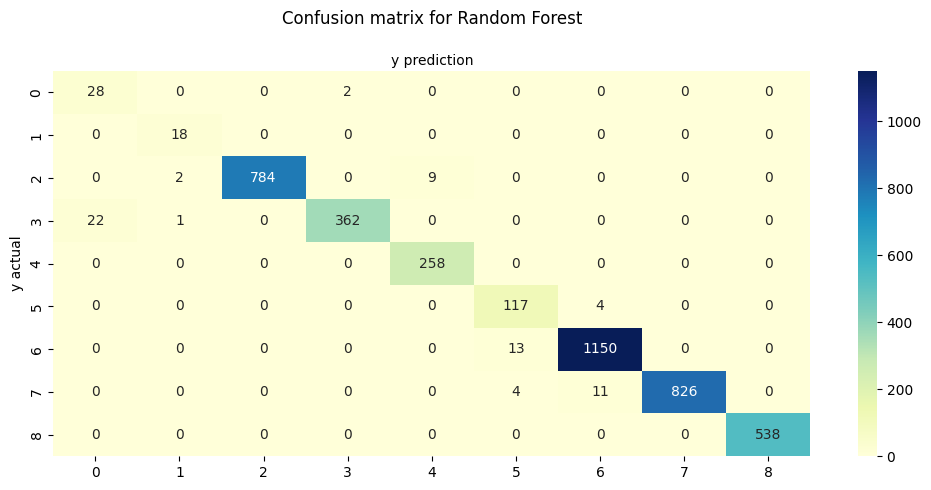

Classification Report for Random Forest using StandardScaler:
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        30
           1       0.86      1.00      0.92        18
           2       1.00      0.99      0.99       795
           3       0.99      0.94      0.97       385
           4       0.97      1.00      0.98       258
           5       0.87      0.97      0.92       121
           6       0.99      0.99      0.99      1163
           7       1.00      0.98      0.99       841
           8       1.00      1.00      1.00       538

    accuracy                           0.98      4149
   macro avg       0.92      0.98      0.94      4149
weighted avg       0.99      0.98      0.98      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1661
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1661
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1661
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


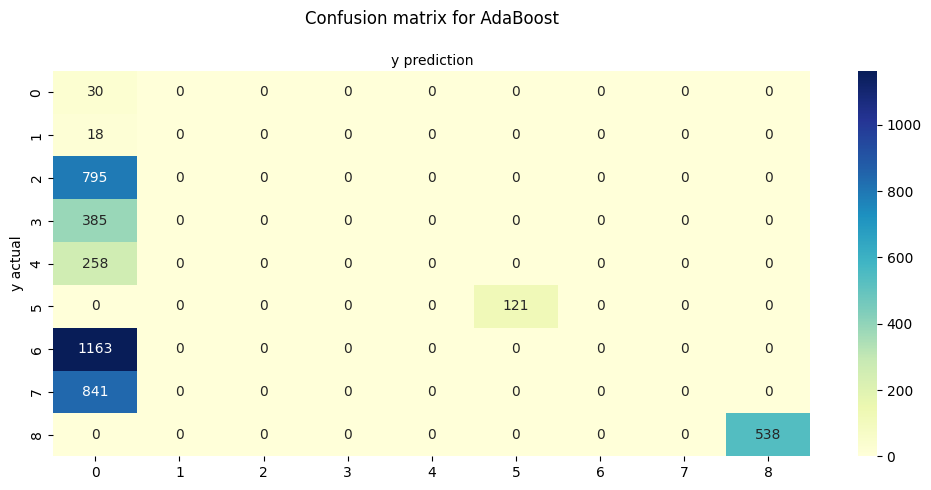

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.01      1.00      0.02        30
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       795
           3       0.00      0.00      0.00       385
           4       0.00      0.00      0.00       258
           5       1.00      1.00      1.00       121
           6       0.00      0.00      0.00      1163
           7       0.00      0.00      0.00       841
           8       1.00      1.00      1.00       538

    accuracy                           0.17      4149
   macro avg       0.22      0.33      0.22      4149
weighted avg       0.16      0.17      0.16      4149



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: Use

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


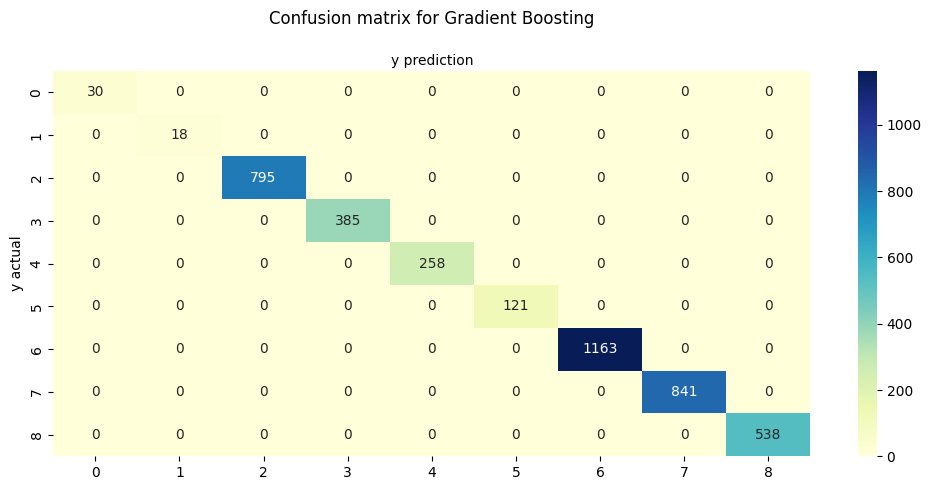

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Using StandardScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for XGBoost using MinMaxScaler:


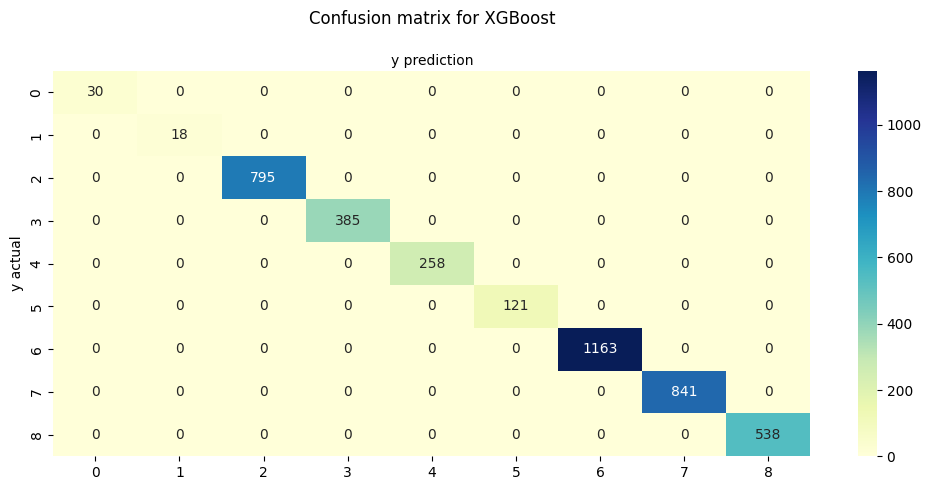

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       795
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       258
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00      1163
           7       1.00      1.00      1.00       841
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  StandardScaler        0.999976       1.000000
1                  SVC    RobustScaler        1.000000       1.000000
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN    RobustScaler        0.895341       0.548566
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest  StandardScaler        0.984301       0.983611
6             AdaBoost    MinMaxScaler        0.333333       0.166064
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10, kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),#
    'Random Forest': RandomForestClassifier(n_estimators=15, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
x_train_resampled = imputer.fit_transform(x_train_resampled)


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)
        
        classifier.fit(x_train_scaled, y_train_resampled)
        y_pred = classifier.predict(x_test_scaled)
        
        train_accuracy = accuracy_score(y_train_resampled, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)


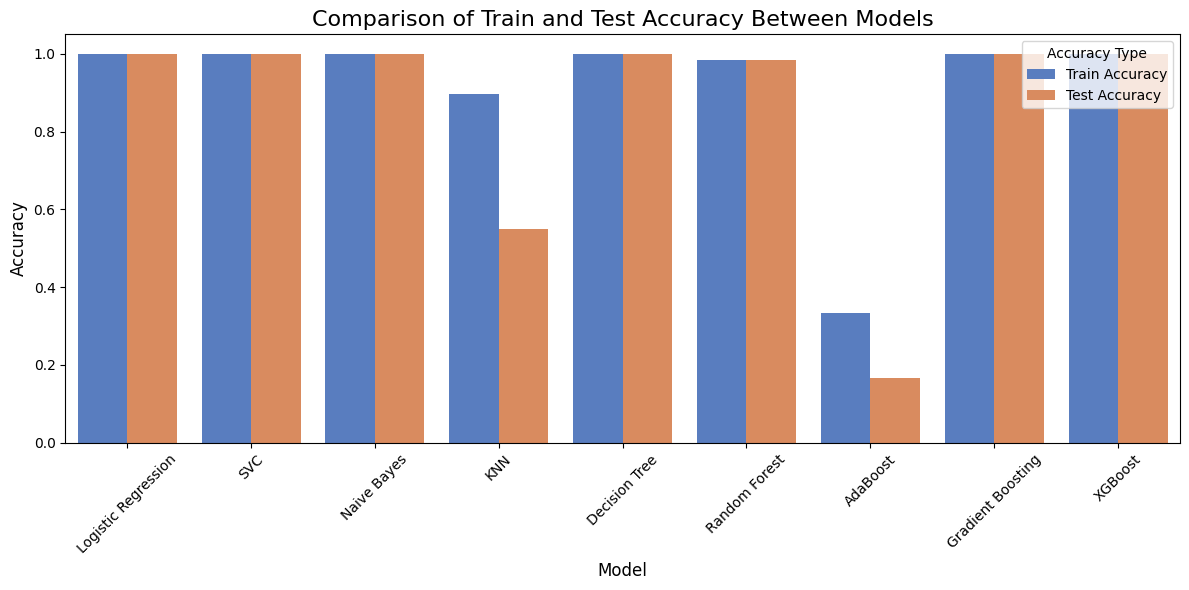

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


## With 'Combined_disorder' as a target column

In [50]:
X =df_train.drop(columns=["Combined_disorder"])
Y = df_train[["Combined_disorder"]]

In [51]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9960
Test Accuracy: 0.9945
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9998
Test Accuracy: 0.9988
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 0.9995
----------------------------------------
Confusion Matrix for Logistic Regression using StandardScaler:


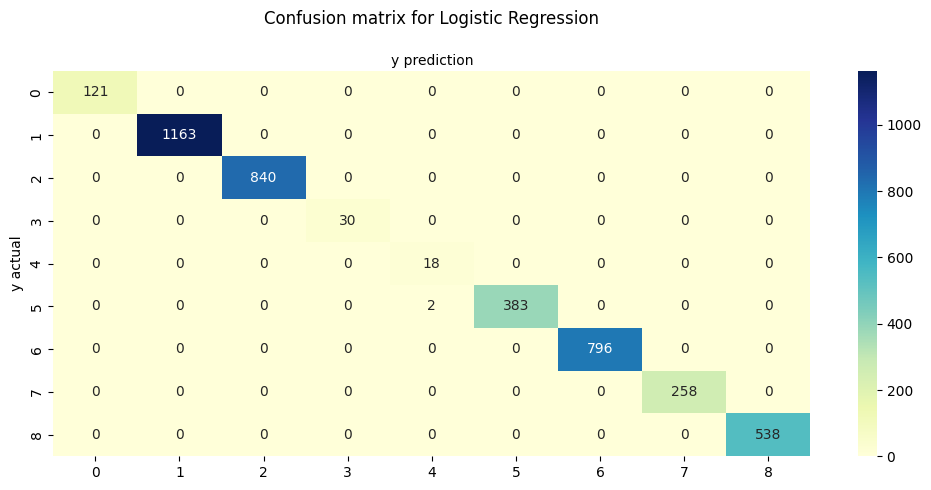

Classification Report for Logistic Regression using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       0.90      1.00      0.95        18
           5       1.00      0.99      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       0.99      1.00      0.99      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 0.9998
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 0.9998
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 0.9998
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


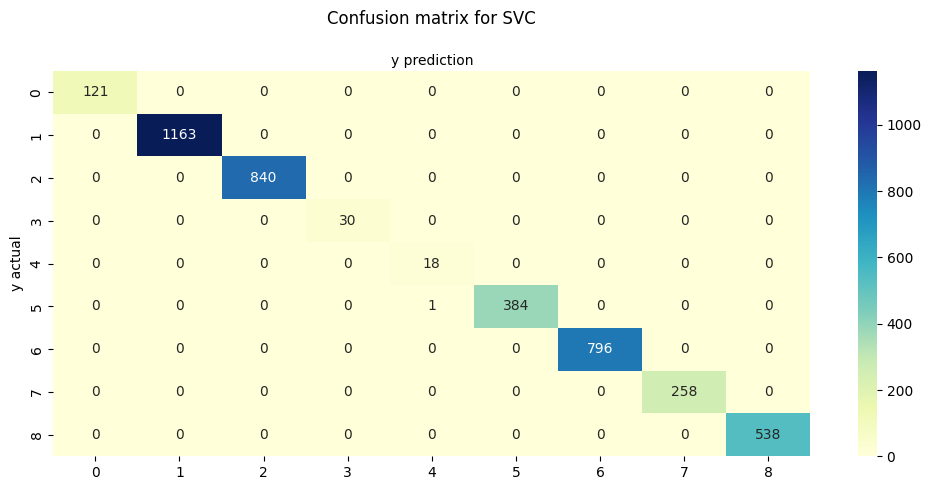

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       0.99      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


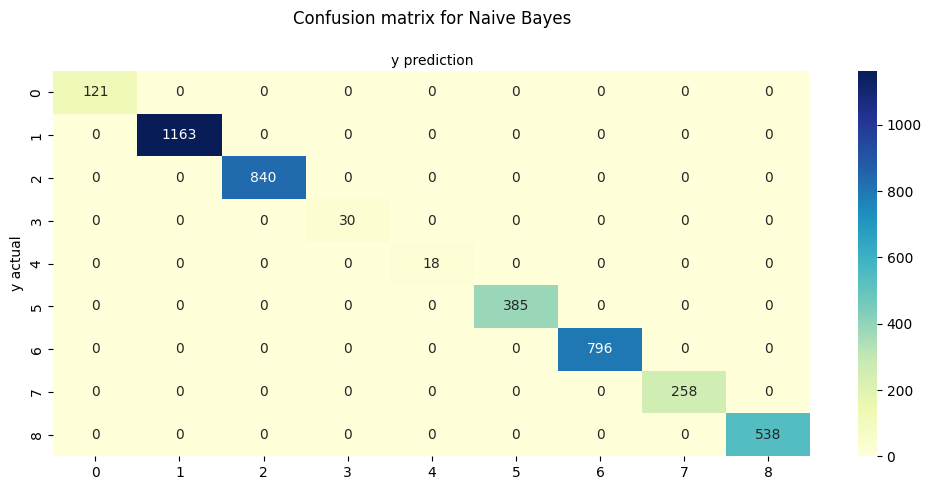

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.7289
Test Accuracy: 0.5640
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.7938
Test Accuracy: 0.6517
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.8063
Test Accuracy: 0.6739
----------------------------------------
Confusion Matrix for KNN using StandardScaler:


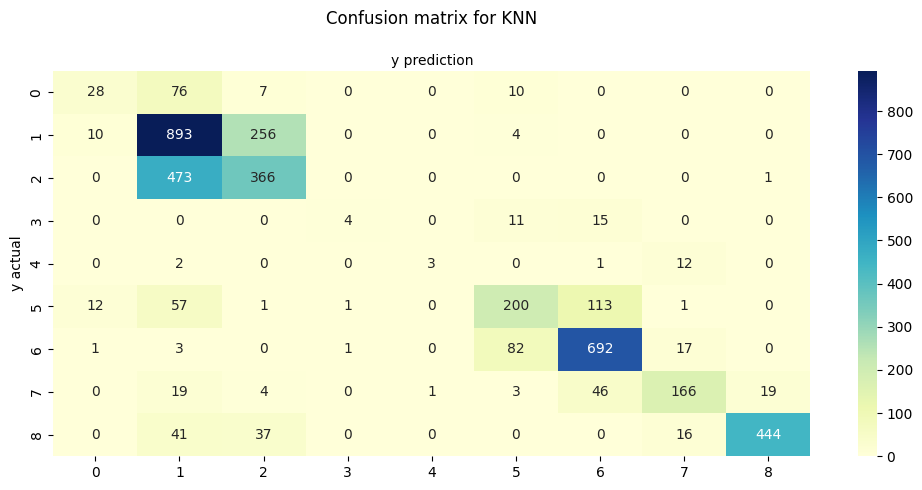

Classification Report for KNN using StandardScaler:
              precision    recall  f1-score   support

           0       0.55      0.23      0.33       121
           1       0.57      0.77      0.65      1163
           2       0.55      0.44      0.48       840
           3       0.67      0.13      0.22        30
           4       0.75      0.17      0.27        18
           5       0.65      0.52      0.58       385
           6       0.80      0.87      0.83       796
           7       0.78      0.64      0.71       258
           8       0.96      0.83      0.89       538

    accuracy                           0.67      4149
   macro avg       0.70      0.51      0.55      4149
weighted avg       0.68      0.67      0.67      4149

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

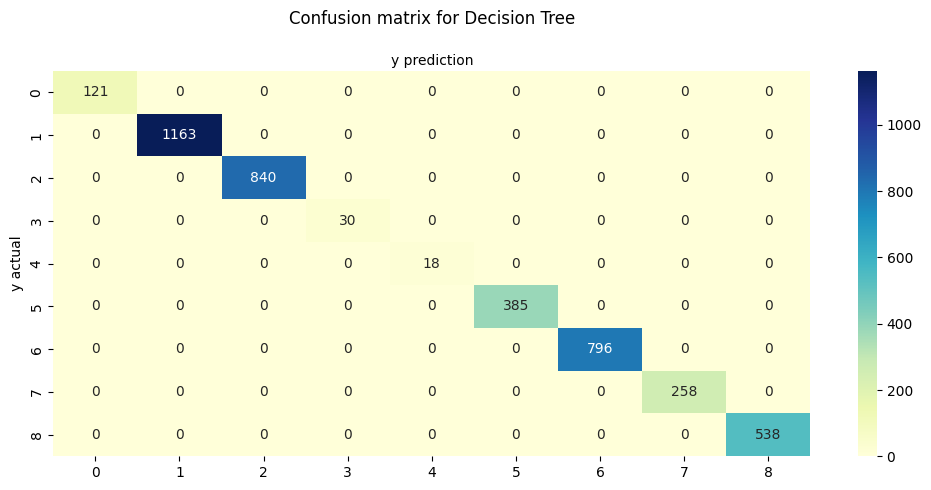

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/tmp/ipykernel_23/2859796923.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9591
Test Accuracy: 0.9588
----------------------------------------


/tmp/ipykernel_23/2859796923.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train)
/tmp/ipykernel_23/2859796923.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9712
Test Accuracy: 0.9704
----------------------------------------
Using StandardScaler with Random Forest:
Train Accuracy: 0.9667
Test Accuracy: 0.9638
----------------------------------------
Confusion Matrix for Random Forest using RobustScaler:


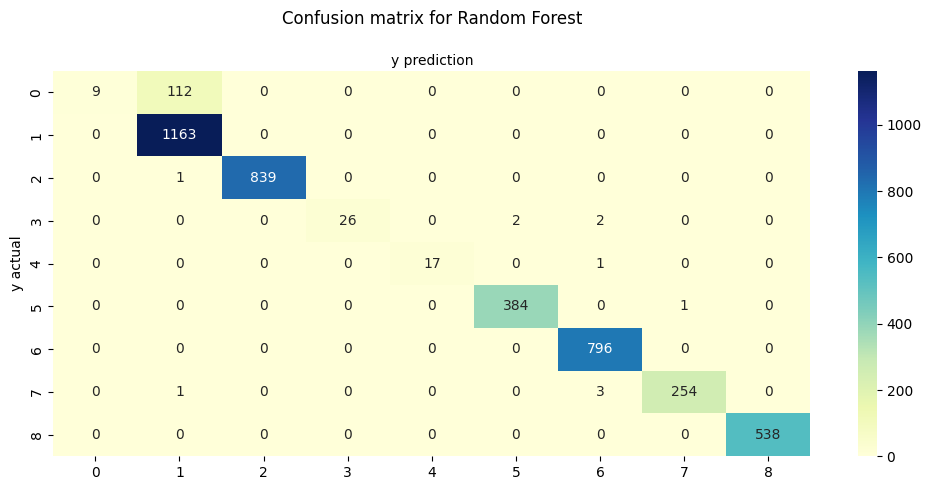

Classification Report for Random Forest using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      0.07      0.14       121
           1       0.91      1.00      0.95      1163
           2       1.00      1.00      1.00       840
           3       1.00      0.87      0.93        30
           4       1.00      0.94      0.97        18
           5       0.99      1.00      1.00       385
           6       0.99      1.00      1.00       796
           7       1.00      0.98      0.99       258
           8       1.00      1.00      1.00       538

    accuracy                           0.97      4149
   macro avg       0.99      0.87      0.89      4149
weighted avg       0.97      0.97      0.96      4149



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.8112
Test Accuracy: 0.8115
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with AdaBoost:
Train Accuracy: 0.8112
Test Accuracy: 0.8115
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with AdaBoost:
Train Accuracy: 0.8112
Test Accuracy: 0.8115
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


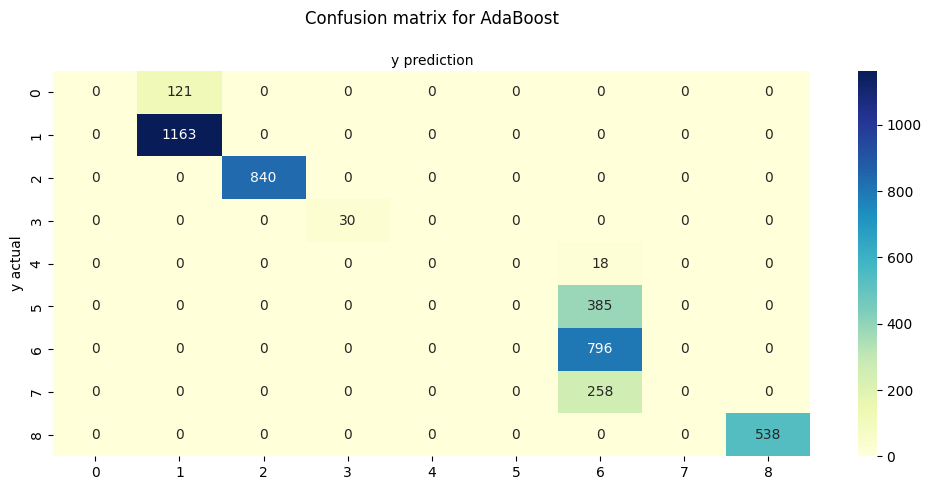

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00       385
           6       0.55      1.00      0.71       796
           7       0.00      0.00      0.00       258
           8       1.00      1.00      1.00       538

    accuracy                           0.81      4149
   macro avg       0.49      0.56      0.52      4149
weighted avg       0.70      0.81      0.74      4149



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


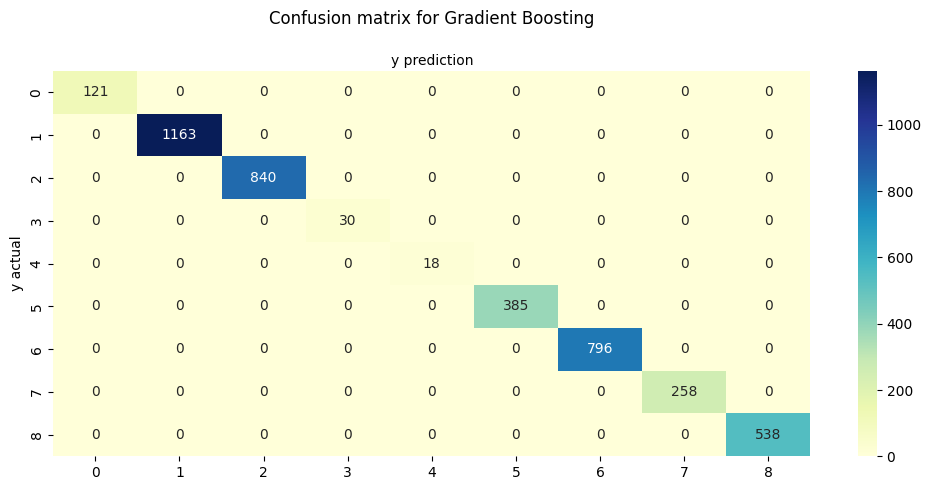

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

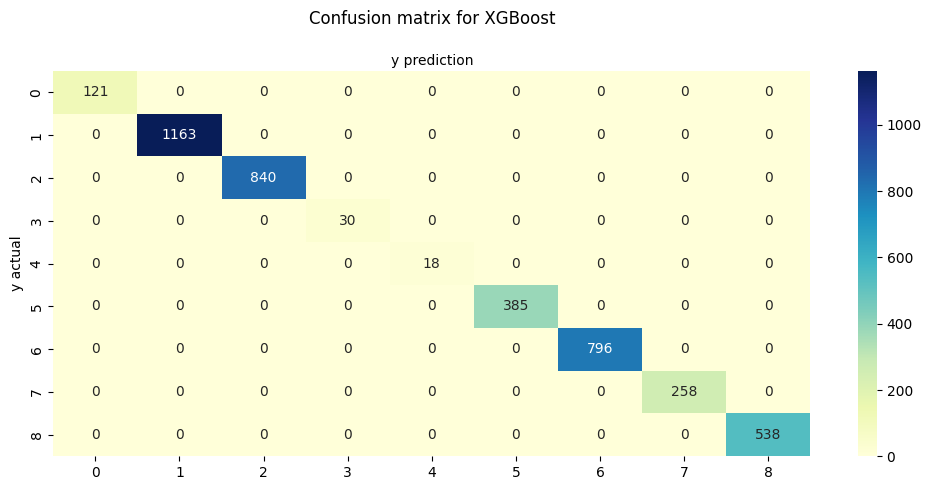

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  StandardScaler        1.000000       0.999518
1                  SVC    MinMaxScaler        1.000000       0.999759
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN  StandardScaler        0.806339       0.673897
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest    RobustScaler        0.966679       0.970354
6             AdaBoost    MinMaxScaler        0.811220       0.811521
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10,kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        
        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)
        
        
        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)


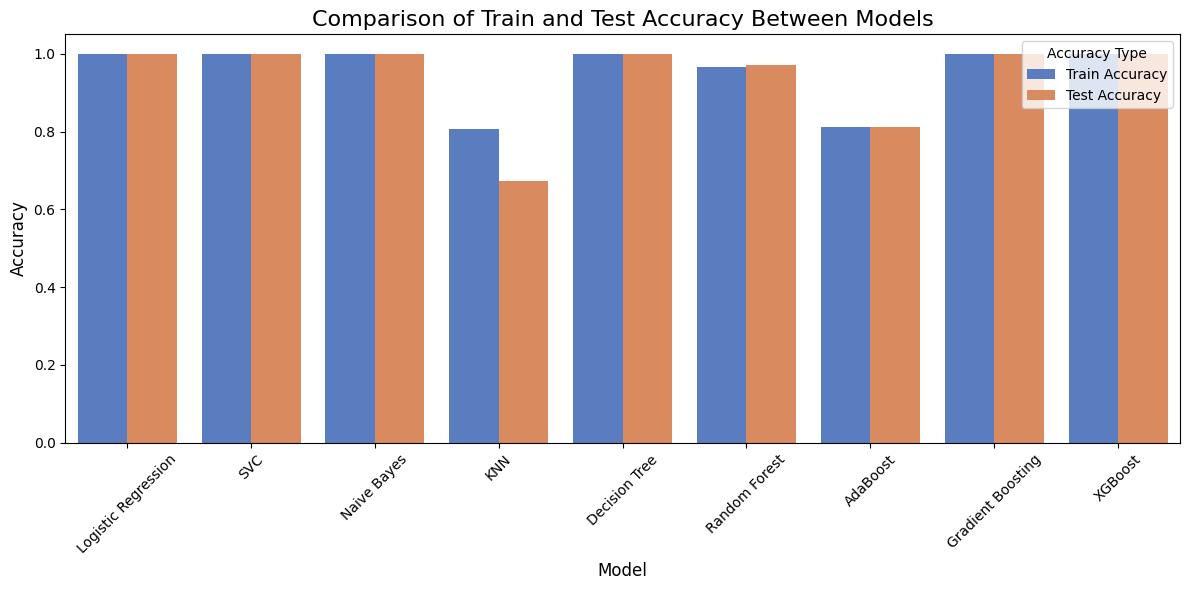

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


### APPLYING SMOTE

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: Use

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9993
Test Accuracy: 0.9971
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 0.9995
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 0.9995
----------------------------------------
Confusion Matrix for Logistic Regression using RobustScaler:


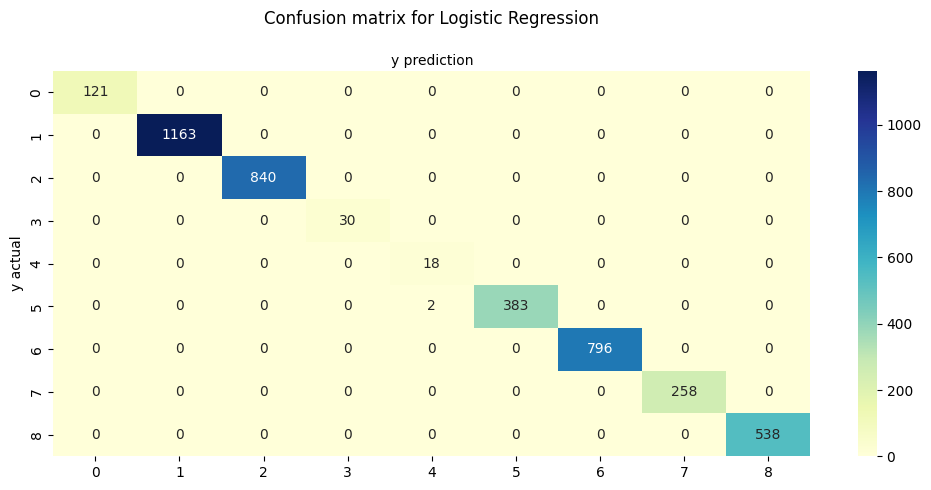

Classification Report for Logistic Regression using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       0.90      1.00      0.95        18
           5       1.00      0.99      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       0.99      1.00      0.99      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


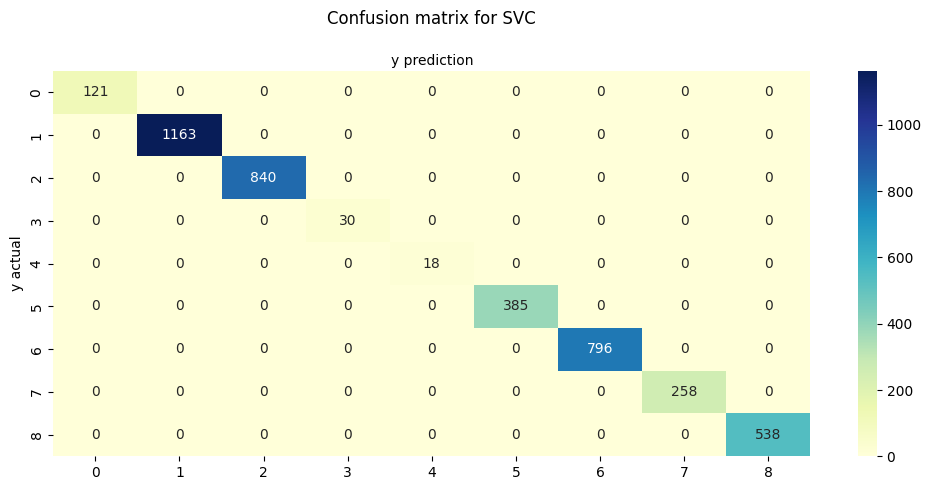

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  w

Using StandardScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


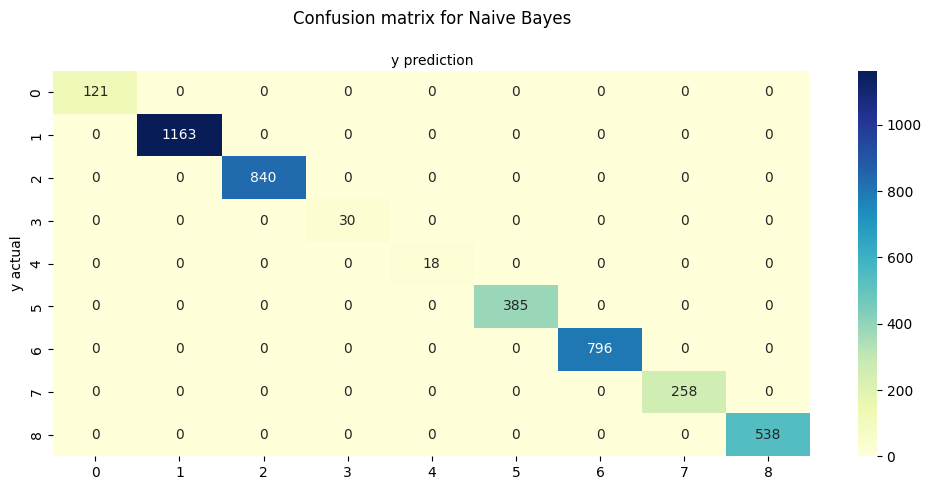

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.8637
Test Accuracy: 0.4996
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.9151
Test Accuracy: 0.5732
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.9114
Test Accuracy: 0.5888
----------------------------------------
Confusion Matrix for KNN using StandardScaler:


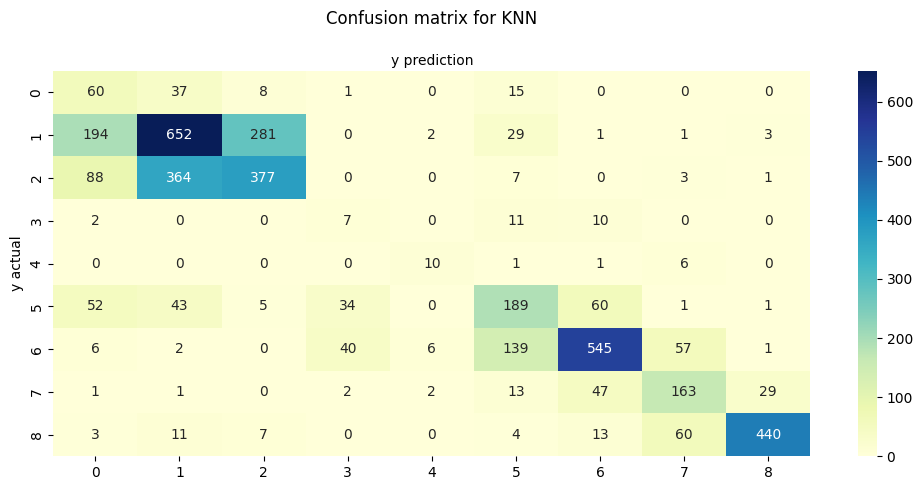

Classification Report for KNN using StandardScaler:
              precision    recall  f1-score   support

           0       0.15      0.50      0.23       121
           1       0.59      0.56      0.57      1163
           2       0.56      0.45      0.50       840
           3       0.08      0.23      0.12        30
           4       0.50      0.56      0.53        18
           5       0.46      0.49      0.48       385
           6       0.81      0.68      0.74       796
           7       0.56      0.63      0.59       258
           8       0.93      0.82      0.87       538

    accuracy                           0.59      4149
   macro avg       0.51      0.55      0.51      4149
weighted avg       0.64      0.59      0.61      4149

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


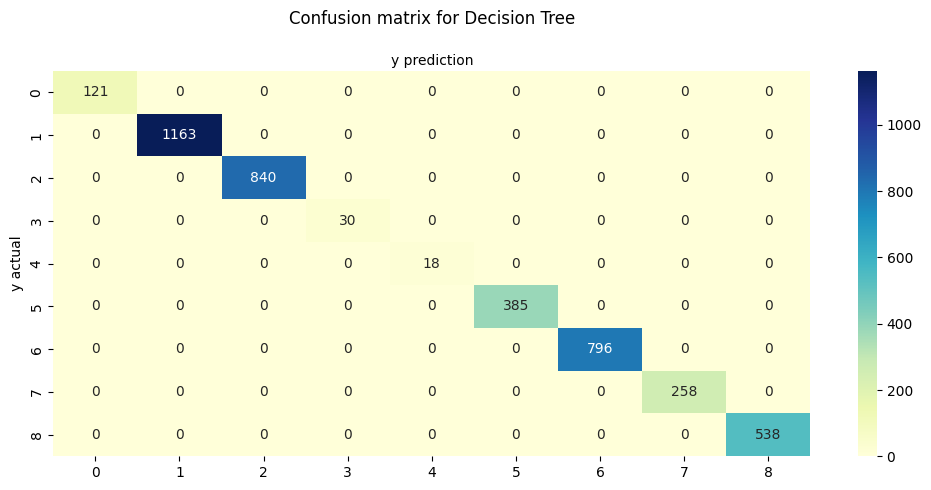

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/371644022.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9816
Test Accuracy: 0.9631
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/371644022.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9785
Test Accuracy: 0.9559
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23/371644022.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_scaled, y_train_resampled)


Using StandardScaler with Random Forest:
Train Accuracy: 0.9889
Test Accuracy: 0.9749
----------------------------------------
Confusion Matrix for Random Forest using StandardScaler:


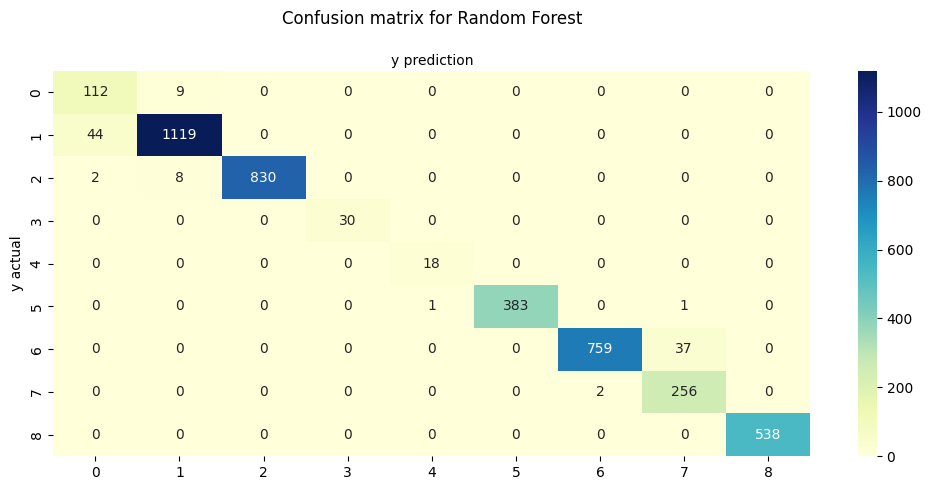

Classification Report for Random Forest using StandardScaler:
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       121
           1       0.99      0.96      0.97      1163
           2       1.00      0.99      0.99       840
           3       1.00      1.00      1.00        30
           4       0.95      1.00      0.97        18
           5       1.00      0.99      1.00       385
           6       1.00      0.95      0.97       796
           7       0.87      0.99      0.93       258
           8       1.00      1.00      1.00       538

    accuracy                           0.97      4149
   macro avg       0.95      0.98      0.96      4149
weighted avg       0.98      0.97      0.98      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1661
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1661
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1661
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


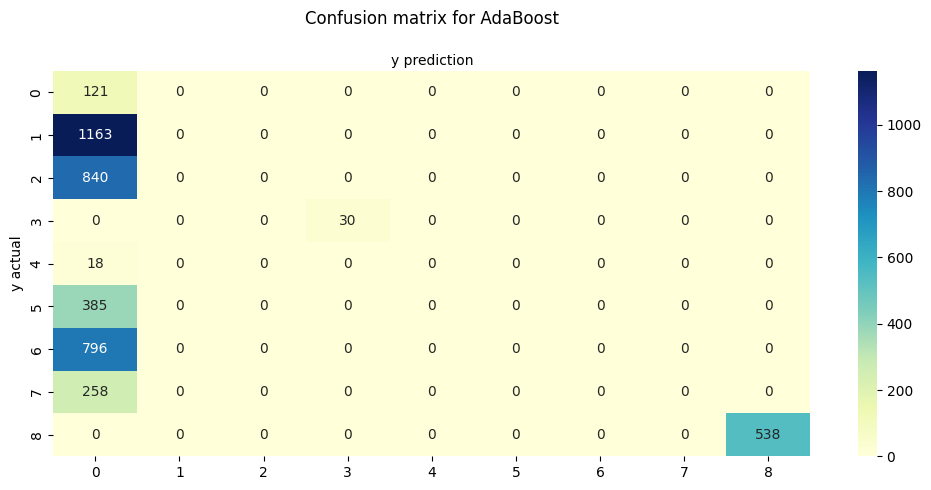

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.03      1.00      0.07       121
           1       0.00      0.00      0.00      1163
           2       0.00      0.00      0.00       840
           3       1.00      1.00      1.00        30
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00       385
           6       0.00      0.00      0.00       796
           7       0.00      0.00      0.00       258
           8       1.00      1.00      1.00       538

    accuracy                           0.17      4149
   macro avg       0.23      0.33      0.23      4149
weighted avg       0.14      0.17      0.14      4149



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: Use

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


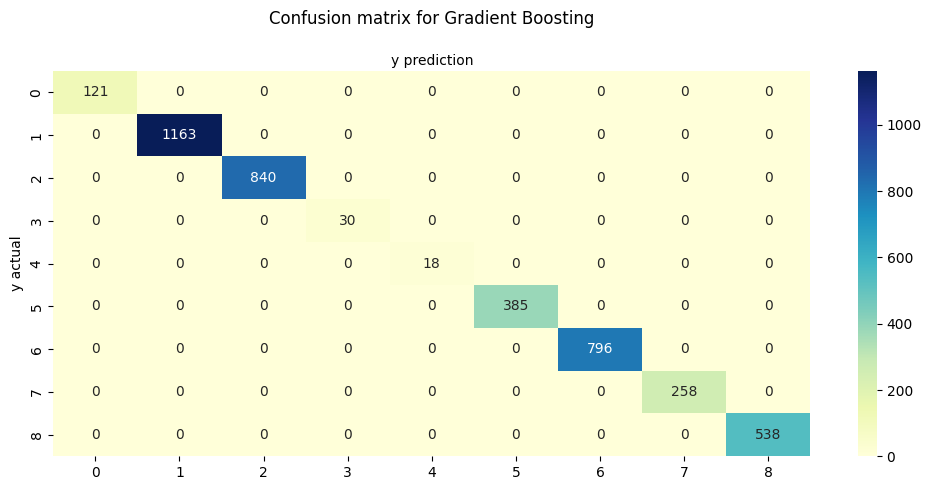

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Using StandardScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for XGBoost using MinMaxScaler:


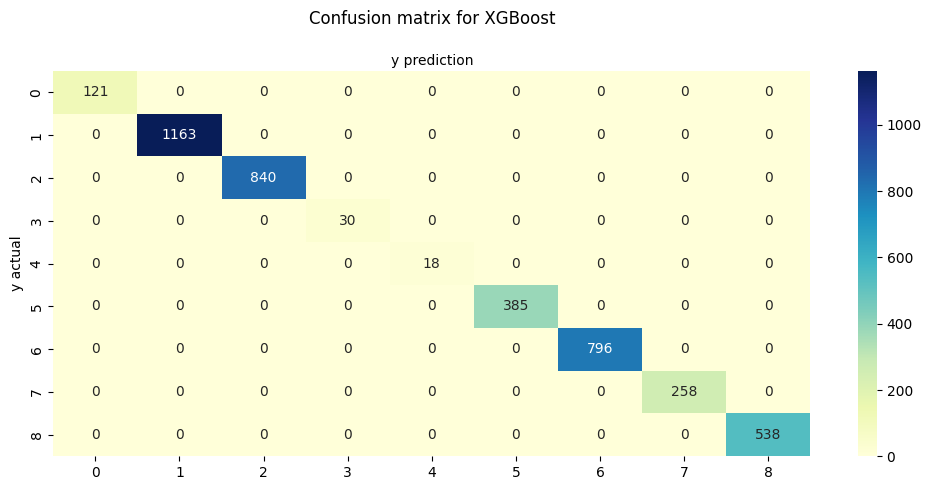

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00       840
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00       385
           6       1.00      1.00      1.00       796
           7       1.00      1.00      1.00       258
           8       1.00      1.00      1.00       538

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression    RobustScaler        0.999976       0.999518
1                  SVC    MinMaxScaler        1.000000       1.000000
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN  StandardScaler        0.911446       0.588817
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest  StandardScaler        0.988913       0.974934
6             AdaBoost    MinMaxScaler        0.333333       0.166064
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10, kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),#
    'Random Forest': RandomForestClassifier(n_estimators=15, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
x_train_resampled = imputer.fit_transform(x_train_resampled)


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)
        
        classifier.fit(x_train_scaled, y_train_resampled)
        y_pred = classifier.predict(x_test_scaled)
        
        train_accuracy = accuracy_score(y_train_resampled, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)



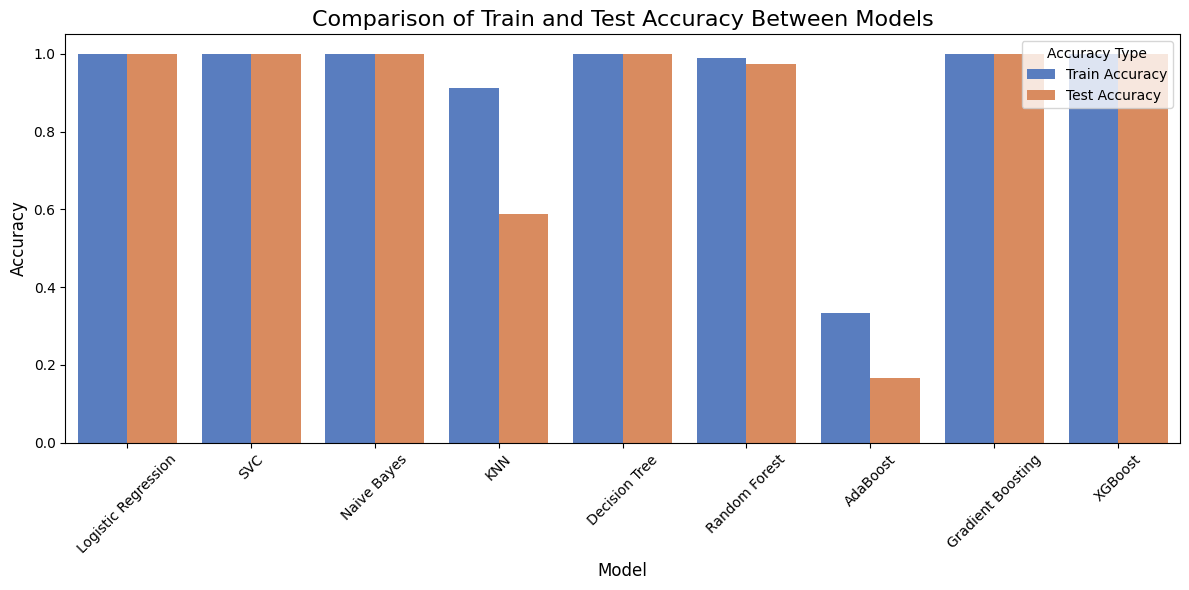

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


### applying grid search with cross-validation

In [56]:
X =df_train.drop(columns=['Genetic Disorder'])
Y = df_train[['Genetic Disorder']]
